In [23]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import models
from keras import layers
from keras import regularizers

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def decode_review(review):
    offsetChars = 3
    dictionary = imdb.get_word_index()
    decoded_dictionary = dict([(value, key) for (key, value) in dictionary.items()])
    return ''.join([decoded_dictionary.get(i - offsetChars, '?') for i in train_data[0]])

In [5]:
def one_hot_encode(review, dimension = 10000):
    encoded = np.zeros(dimension)
    for i, word in enumerate(review):
        encoded[word] = True
    return encoded
        

def vectorize_sequences(reviews, dimension = 10000):
    vectorized = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        vectorized[i] = one_hot_encode(review, dimension)        
    return vectorized

def vectorize_sequences2(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results



X_train         = vectorize_sequences2(train_data)
X_test          = vectorize_sequences2(test_data)

y_train         = np.asarray(train_labels).astype('float32')
y_test          = np.asarray(test_labels).astype('float32')

X_val           = X_train[:10000]
y_val           = y_train[:10000]

partial_X_train = X_train[10000:]
partial_Y_train = y_train[10000:]

In [6]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [7]:
original_history = original_model.fit(
    partial_X_train,
    partial_Y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
  512/15000 [>.............................] - ETA: 3s - loss: 0.6939 - acc: 0.5020

 1024/15000 [=>............................] - ETA: 2s - loss: 0.6918 - acc: 0.5322

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.6751 - acc: 0.5957

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.6536 - acc: 0.6426

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.6428 - acc: 0.6399

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6228 - acc: 0.6723

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6065 - acc: 0.6929

 7168/15000 [=============>................] - ETA: 0s - loss: 0.5914 - acc: 0.7101

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5757 - acc: 0.7258

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5655 - acc: 0.7359

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5556 - acc: 0.7447

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5450 - acc: 0.7540

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5344 - acc: 0.7624

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5236 - acc: 0.7698

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5147 - acc: 0.7762

15000/15000 [==============================] - 2s 130us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695


Epoch 2/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.3233 - acc: 0.9062

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.3319 - acc: 0.9108

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.3229 - acc: 0.9113

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3175 - acc: 0.9149

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3118 - acc: 0.9141

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3089 - acc: 0.9148

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3076 - acc: 0.9109

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3128 - acc: 0.9061

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3118 - acc: 0.9051

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3099 - acc: 0.9055

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3084 - acc: 0.9070

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3066 - acc: 0.9065

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3042 - acc: 0.9055

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3030 - acc: 0.9049

14848/15000 [============================>.] - ETA: 0s - loss: 0.3008 - acc: 0.9053

15000/15000 [==============================] - 2s 106us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900


Epoch 3/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.2118 - acc: 0.9375

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2227 - acc: 0.9336

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2192 - acc: 0.9371

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2249 - acc: 0.9305

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2215 - acc: 0.9332

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2231 - acc: 0.9320

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2207 - acc: 0.9318

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2227 - acc: 0.9299

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2232 - acc: 0.9275

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2221 - acc: 0.9280

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2206 - acc: 0.9281

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2203 - acc: 0.9278

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2200 - acc: 0.9274

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2182 - acc: 0.9281

14848/15000 [============================>.] - ETA: 0s - loss: 0.2181 - acc: 0.9285

15000/15000 [==============================] - 2s 105us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3082 - val_acc: 0.8715


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1949 - acc: 0.9375

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1895 - acc: 0.9382

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1853 - acc: 0.9422

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1764 - acc: 0.9475

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1756 - acc: 0.9488

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1770 - acc: 0.9473

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1751 - acc: 0.9477

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1740 - acc: 0.9487

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1726 - acc: 0.9483

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1718 - acc: 0.9485

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1737 - acc: 0.9467

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1749 - acc: 0.9448

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1770 - acc: 0.9433

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1763 - acc: 0.9435

14848/15000 [============================>.] - ETA: 0s - loss: 0.1753 - acc: 0.9436

15000/15000 [==============================] - 2s 105us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8839


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1316 - acc: 0.9688

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1435 - acc: 0.9616

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1376 - acc: 0.9633

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1356 - acc: 0.9654

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1353 - acc: 0.9642

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1372 - acc: 0.9629

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1416 - acc: 0.9593

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1413 - acc: 0.9586

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1395 - acc: 0.9586

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1393 - acc: 0.9586

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1405 - acc: 0.9570

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1410 - acc: 0.9565

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1411 - acc: 0.9556

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1427 - acc: 0.9545

14848/15000 [============================>.] - ETA: 0s - loss: 0.1423 - acc: 0.9543

15000/15000 [==============================] - 2s 105us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8863


Epoch 6/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.1232 - acc: 0.9668

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1154 - acc: 0.9688

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1052 - acc: 0.9723

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1068 - acc: 0.9713

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1124 - acc: 0.9698

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1154 - acc: 0.9675

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1152 - acc: 0.9674

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1162 - acc: 0.9663

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1160 - acc: 0.9654

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1153 - acc: 0.9653

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1151 - acc: 0.9653

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1144 - acc: 0.9652

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1147 - acc: 0.9652

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1153 - acc: 0.9650

14848/15000 [============================>.] - ETA: 0s - loss: 0.1147 - acc: 0.9654

15000/15000 [==============================] - 2s 106us/step - loss: 0.1148 - acc: 0.9655 - val_loss: 0.3143 - val_acc: 0.8775


Epoch 7/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.1010 - acc: 0.9707

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0996 - acc: 0.9701

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0952 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0936 - acc: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0911 - acc: 0.9753

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0900 - acc: 0.9760

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0917 - acc: 0.9746

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0941 - acc: 0.9734

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0955 - acc: 0.9723

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0970 - acc: 0.9718

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0972 - acc: 0.9715

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0971 - acc: 0.9711

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0970 - acc: 0.9711

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0977 - acc: 0.9706

14848/15000 [============================>.] - ETA: 0s - loss: 0.0978 - acc: 0.9706

15000/15000 [==============================] - 2s 105us/step - loss: 0.0977 - acc: 0.9707 - val_loss: 0.3130 - val_acc: 0.8846


Epoch 8/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0728 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0710 - acc: 0.9818

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0690 - acc: 0.9836

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0728 - acc: 0.9807

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0757 - acc: 0.9789

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0749 - acc: 0.9790

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0751 - acc: 0.9788

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0746 - acc: 0.9792

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0757 - acc: 0.9787

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0784 - acc: 0.9773

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0802 - acc: 0.9767

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0796 - acc: 0.9770

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0796 - acc: 0.9768

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0789 - acc: 0.9772

14848/15000 [============================>.] - ETA: 0s - loss: 0.0795 - acc: 0.9769

15000/15000 [==============================] - 2s 105us/step - loss: 0.0805 - acc: 0.9765 - val_loss: 0.3856 - val_acc: 0.8651


Epoch 9/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0829 - acc: 0.9746

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0651 - acc: 0.9831

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0591 - acc: 0.9871

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0586 - acc: 0.9877

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0593 - acc: 0.9874

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0624 - acc: 0.9854

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0612 - acc: 0.9857

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0613 - acc: 0.9855

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0619 - acc: 0.9849

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0636 - acc: 0.9840

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0667 - acc: 0.9822

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0669 - acc: 0.9823

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0668 - acc: 0.9823

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0660 - acc: 0.9822

14848/15000 [============================>.] - ETA: 0s - loss: 0.0657 - acc: 0.9822

15000/15000 [==============================] - 2s 105us/step - loss: 0.0659 - acc: 0.9819 - val_loss: 0.3636 - val_acc: 0.8778


Epoch 10/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0552 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0515 - acc: 0.9915

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0514 - acc: 0.9891

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0531 - acc: 0.9886

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0523 - acc: 0.9891

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0523 - acc: 0.9883

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0509 - acc: 0.9892

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0519 - acc: 0.9891

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0516 - acc: 0.9886

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0519 - acc: 0.9883

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9873

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0559 - acc: 0.9858

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0563 - acc: 0.9854

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0555 - acc: 0.9855

14848/15000 [============================>.] - ETA: 0s - loss: 0.0552 - acc: 0.9855

15000/15000 [==============================] - 2s 104us/step - loss: 0.0555 - acc: 0.9852 - val_loss: 0.3845 - val_acc: 0.8793


Epoch 11/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0406 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0323 - acc: 0.9967

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0362 - acc: 0.9945

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0352 - acc: 0.9950

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0339 - acc: 0.9948

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0356 - acc: 0.9940

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0354 - acc: 0.9941

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0360 - acc: 0.9939

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0407 - acc: 0.9913

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0437 - acc: 0.9895

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0435 - acc: 0.9896

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0438 - acc: 0.9892

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0441 - acc: 0.9891

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0439 - acc: 0.9894

14848/15000 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9889

15000/15000 [==============================] - 2s 105us/step - loss: 0.0446 - acc: 0.9889 - val_loss: 0.4163 - val_acc: 0.8769


Epoch 12/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0293 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0277 - acc: 0.9967

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0275 - acc: 0.9973

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0275 - acc: 0.9969

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0283 - acc: 0.9967

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0318 - acc: 0.9947

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0324 - acc: 0.9946

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0318 - acc: 0.9948

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0316 - acc: 0.9948

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0323 - acc: 0.9947

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0328 - acc: 0.9945

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0329 - acc: 0.9944

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0340 - acc: 0.9934

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0378 - acc: 0.9915

14848/15000 [============================>.] - ETA: 0s - loss: 0.0383 - acc: 0.9914

15000/15000 [==============================] - 2s 104us/step - loss: 0.0383 - acc: 0.9915 - val_loss: 0.4511 - val_acc: 0.8699


Epoch 13/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0250 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0245 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0272 - acc: 0.9957

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0255 - acc: 0.9961

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0245 - acc: 0.9967

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0235 - acc: 0.9968

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0240 - acc: 0.9965

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0251 - acc: 0.9957

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0247 - acc: 0.9962

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0248 - acc: 0.9961

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0252 - acc: 0.9960

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0268 - acc: 0.9948

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0293 - acc: 0.9934

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0300 - acc: 0.9927

14848/15000 [============================>.] - ETA: 0s - loss: 0.0298 - acc: 0.9927

15000/15000 [==============================] - 2s 104us/step - loss: 0.0297 - acc: 0.9928 - val_loss: 0.4705 - val_acc: 0.8733


Epoch 14/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0180 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0189 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0179 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0189 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0186 - acc: 0.9972

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0190 - acc: 0.9972

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0189 - acc: 0.9973

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0188 - acc: 0.9974

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0189 - acc: 0.9974

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0196 - acc: 0.9969

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0240 - acc: 0.9944

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0249 - acc: 0.9943

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0248 - acc: 0.9944

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0245 - acc: 0.9946

14848/15000 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9948

15000/15000 [==============================] - 2s 104us/step - loss: 0.0244 - acc: 0.9949 - val_loss: 0.5035 - val_acc: 0.8725


Epoch 15/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0102 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0144 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0140 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0145 - acc: 0.9983

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0144 - acc: 0.9985

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0146 - acc: 0.9988

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0147 - acc: 0.9986

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0154 - acc: 0.9983

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0163 - acc: 0.9982

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0177 - acc: 0.9979

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0177 - acc: 0.9980

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0176 - acc: 0.9980

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0176 - acc: 0.9980

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0173 - acc: 0.9980

14848/15000 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9980

15000/15000 [==============================] - 2s 105us/step - loss: 0.0174 - acc: 0.9980 - val_loss: 0.5435 - val_acc: 0.8690


Epoch 16/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0189 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0139 - acc: 0.9974

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0129 - acc: 0.9980

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0123 - acc: 0.9986

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0127 - acc: 0.9987

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0141 - acc: 0.9980

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0153 - acc: 0.9979

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0155 - acc: 0.9974

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0152 - acc: 0.9975

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0149 - acc: 0.9976

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0146 - acc: 0.9977

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0145 - acc: 0.9976

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0144 - acc: 0.9977

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0142 - acc: 0.9979

14848/15000 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9968

15000/15000 [==============================] - 2s 105us/step - loss: 0.0167 - acc: 0.9966 - val_loss: 0.5744 - val_acc: 0.8705


Epoch 17/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0084 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0080 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0079 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0080 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0082 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0080 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0081 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0085 - acc: 0.9997

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0085 - acc: 0.9996

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0088 - acc: 0.9994

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0089 - acc: 0.9995

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0090 - acc: 0.9995

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0090 - acc: 0.9996

14848/15000 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.9995

15000/15000 [==============================] - 2s 104us/step - loss: 0.0092 - acc: 0.9995 - val_loss: 0.6184 - val_acc: 0.8662


Epoch 18/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0078 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0063 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0063 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0064 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0069 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0086 - acc: 0.9994

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0153 - acc: 0.9957

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0142 - acc: 0.9962

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0133 - acc: 0.9966

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0127 - acc: 0.9969

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9970

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0121 - acc: 0.9972

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0118 - acc: 0.9974

14848/15000 [============================>.] - ETA: 0s - loss: 0.0115 - acc: 0.9975

15000/15000 [==============================] - 2s 104us/step - loss: 0.0115 - acc: 0.9975 - val_loss: 0.6403 - val_acc: 0.8669


Epoch 19/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0054 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0050 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0049 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0047 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0052 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0049 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0050 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0049 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.9998

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.9999

15000/15000 [==============================] - 2s 103us/step - loss: 0.0054 - acc: 0.9999 - val_loss: 0.6904 - val_acc: 0.8633


Epoch 20/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.0039 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.0038 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0040 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0040 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0039 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0037 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0037 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0040 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0106 - acc: 0.9971

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0113 - acc: 0.9970

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0107 - acc: 0.9973

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0100 - acc: 0.9975

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0096 - acc: 0.9977

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0092 - acc: 0.9978

14848/15000 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9980

15000/15000 [==============================] - 2s 106us/step - loss: 0.0087 - acc: 0.9980 - val_loss: 0.7154 - val_acc: 0.8660


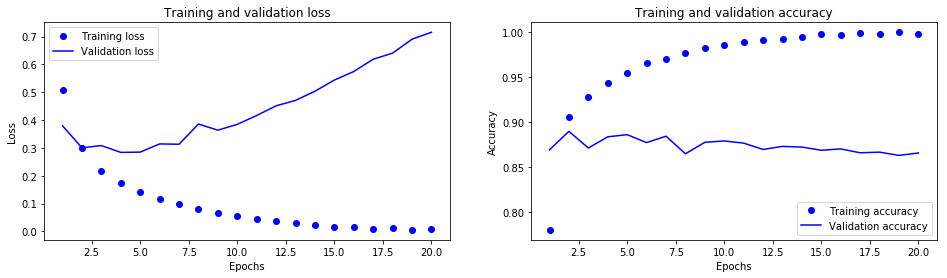

In [8]:
def plot_history(history):
    history_data        = history.history

    train_accuracy      = history_data['acc']
    train_loss          = history_data['loss']
    validation_accuracy = history_data['val_acc']
    validation_loss     = history_data['val_loss']

    epochs              = range(1, len(history_data['acc']) + 1)

    f, (left, right) = plt.subplots(1, 2)
    f.set_size_inches(16,4)

    left.plot(epochs, train_loss, 'bo', label='Training loss')
    left.plot(epochs, validation_loss, 'b', label='Validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Loss')
    left.legend()

    right.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
    right.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
    right.set_title('Training and validation accuracy')
    right.set_xlabel('Epochs')
    right.set_ylabel('Accuracy')
    right.legend()
    
    plt.show()

def plot_accuracy_history(originalModelHistory, otherModelHistory):

    original_validation_loss = originalModelHistory.history['val_loss']
    other_validation_loss    = otherModelHistory.history['val_loss']
    epochs                   = range(1, len(original_validation_loss) + 1)

    f, left = plt.subplots(1, 1)
    f.set_size_inches(12,4)

    left.plot(epochs, original_validation_loss, 'bo', label='Original model validation loss')
    left.plot(epochs, other_validation_loss, 'b', label='Other model validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Validation loss')
    left.legend()

    plt.show()

plot_history(original_history)


In [14]:
original_history = original_model.fit(X_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0313 - acc: 0.9980

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0106 - acc: 0.9993

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9996

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0047 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0031 - acc: 0.9998

 6144/25000 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.9997

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.9997

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9998

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

10240/25000 [===========>..................] - ETA: 1s - loss: 0.0034 - acc: 0.9998

11264/25000 [============>.................] - ETA: 1s - loss: 0.0032 - acc: 0.9998

12288/25000 [=============>................] - ETA: 0s - loss: 0.0030 - acc: 0.9998

13312/25000 [==============>...............] - ETA: 0s - loss: 0.0027 - acc: 0.9998

14336/25000 [================>.............] - ETA: 0s - loss: 0.0026 - acc: 0.9999

15360/25000 [=================>............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

16384/25000 [==================>...........] - ETA: 0s - loss: 0.0033 - acc: 0.9998

17408/25000 [===================>..........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

18432/25000 [=====================>........] - ETA: 0s - loss: 0.0069 - acc: 0.9992

19456/25000 [======================>.......] - ETA: 0s - loss: 0.0071 - acc: 0.9990

20480/25000 [=======================>......] - ETA: 0s - loss: 0.0068 - acc: 0.9990

21504/25000 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.9991

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.9991

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.9992

24576/25000 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9992

25000/25000 [==============================] - 3s 129us/step - loss: 0.0056 - acc: 0.9992 - val_loss: 1.2604 - val_acc: 0.8494


Epoch 2/20
  512/25000 [..............................] - ETA: 1s - loss: 1.6039e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.6104e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 1.6350e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 1.7619e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 1.8370e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.9892e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 2.0178e-04 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0023 - acc: 0.9999    

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0039 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0035 - acc: 0.9998

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0032 - acc: 0.9998

11776/25000 [=============>................] - ETA: 0s - loss: 0.0029 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0040 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0037 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0032 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0027 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0026 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0025 - acc: 0.9999

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0024 - acc: 0.9999

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0030 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0029 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0034 - acc: 0.9998 - val_loss: 1.2868 - val_acc: 0.8487


Epoch 3/20
  512/25000 [..............................] - ETA: 1s - loss: 2.9036e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.6283e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 1.3974e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 1.2562e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 1.3823e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.3455e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0026 - acc: 0.9998    

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0043 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.9997

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0046 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0042 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0039 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0036 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0034 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0032 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0030 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.9988

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0079 - acc: 0.9985

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0091 - acc: 0.9985

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0087 - acc: 0.9986

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0083 - acc: 0.9987

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0080 - acc: 0.9987

25000/25000 [==============================] - 3s 124us/step - loss: 0.0077 - acc: 0.9988 - val_loss: 1.3140 - val_acc: 0.8482


Epoch 4/20
  512/25000 [..............................] - ETA: 1s - loss: 6.0909e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.5869e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 1.2763e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 1.2502e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 1.3773e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.2898e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0026 - acc: 0.9998    

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0022 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0038 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0046 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0056 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0052 - acc: 0.9997

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0048 - acc: 0.9997

14848/25000 [================>.............] - ETA: 0s - loss: 0.0045 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0042 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0039 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0037 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0035 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0034 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0032 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0029 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0028 - acc: 0.9998

25000/25000 [==============================] - 3s 124us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 1.3321 - val_acc: 0.8477


Epoch 5/20
  512/25000 [..............................] - ETA: 1s - loss: 1.5623e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0105 - acc: 0.9993    

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0046 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0036 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0025 - acc: 0.9998

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0022 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0019 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0017 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0031 - acc: 0.9998

11776/25000 [=============>................] - ETA: 0s - loss: 0.0028 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0039 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0036 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0033 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0039 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0037 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0035 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0032 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0030 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0036 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9998

25000/25000 [==============================] - 3s 126us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 1.3681 - val_acc: 0.8479


Epoch 6/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0313 - acc: 0.9980

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0105 - acc: 0.9993

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0035 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

 6144/25000 [======>.......................] - ETA: 1s - loss: 0.0026 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0024 - acc: 0.9998

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0019 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0017 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0016 - acc: 0.9999

11776/25000 [=============>................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0131 - acc: 0.9981

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0133 - acc: 0.9982

14848/25000 [================>.............] - ETA: 0s - loss: 0.0124 - acc: 0.9983

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0116 - acc: 0.9984

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0109 - acc: 0.9985

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0103 - acc: 0.9986

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0097 - acc: 0.9987

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0092 - acc: 0.9987

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0088 - acc: 0.9988

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0084 - acc: 0.9989

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.9989

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.9989

25000/25000 [==============================] - 3s 131us/step - loss: 0.0080 - acc: 0.9990 - val_loss: 1.3904 - val_acc: 0.8475


Epoch 7/20
  512/25000 [..............................] - ETA: 1s - loss: 2.1154e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 9.0291e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 7.0187e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 6.7785e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 6.2604e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 5.6772e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0025 - acc: 0.9998    

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0022 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0019 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0017 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0030 - acc: 0.9998

11776/25000 [=============>................] - ETA: 0s - loss: 0.0028 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0026 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0033 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0027 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0034 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0041 - acc: 0.9997

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0039 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0037 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 1.4033 - val_acc: 0.8471


Epoch 8/20
  512/25000 [..............................] - ETA: 1s - loss: 2.9535e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 2.5643e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 2.4443e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 4.3993e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.9996    

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.9996

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.9997

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0038 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0033 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0027 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0026 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0025 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0039 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0037 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 1.4339 - val_acc: 0.8464


Epoch 9/20
  512/25000 [..............................] - ETA: 1s - loss: 1.3133e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.8951e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 1.6042e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 1.7989e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 1.8176e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.8784e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 1.7810e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 2.1634e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 1s - loss: 2.1172e-05 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 1s - loss: 2.0771e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 0s - loss: 2.0982e-05 - acc: 1.0000

11776/25000 [=============>................] - ETA: 0s - loss: 0.0014 - acc: 0.9999    

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0025 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0043 - acc: 0.9993

14848/25000 [================>.............] - ETA: 0s - loss: 0.0041 - acc: 0.9993

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0039 - acc: 0.9993

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0036 - acc: 0.9993

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0034 - acc: 0.9994

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0032 - acc: 0.9994

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0031 - acc: 0.9994

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0029 - acc: 0.9995

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0042 - acc: 0.9994

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.9994

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0046 - acc: 0.9994

25000/25000 [==============================] - 3s 123us/step - loss: 0.0044 - acc: 0.9994 - val_loss: 1.4437 - val_acc: 0.8457


Epoch 10/20
  512/25000 [..............................] - ETA: 1s - loss: 2.0191e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 2.3935e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 2.2751e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 2.4443e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 3.9245e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 3.4851e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 3.2089e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 3.0469e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 1s - loss: 2.9713e-05 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 1s - loss: 2.7710e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 0s - loss: 2.6622e-05 - acc: 1.0000

11776/25000 [=============>................] - ETA: 0s - loss: 2.5356e-05 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0013 - acc: 0.9999    

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0012 - acc: 0.9999

14848/25000 [================>.............] - ETA: 0s - loss: 0.0011 - acc: 0.9999

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0010 - acc: 0.9999

16896/25000 [===================>..........] - ETA: 0s - loss: 9.8063e-04 - acc: 0.9999

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0018 - acc: 0.9999    

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0017 - acc: 0.9999

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0024 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0031 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0028 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9998

25000/25000 [==============================] - 3s 122us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.4625 - val_acc: 0.8458


Epoch 11/20
  512/25000 [..............................] - ETA: 1s - loss: 1.5685e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 2.6662e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 2.7008e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 2.2427e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 2.0714e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.9398e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 1.8342e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9999    

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0019 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0017 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0015 - acc: 0.9999

11776/25000 [=============>................] - ETA: 0s - loss: 0.0014 - acc: 0.9999

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0013 - acc: 0.9999

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0012 - acc: 0.9999

14848/25000 [================>.............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0020 - acc: 0.9999

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0019 - acc: 0.9999

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0018 - acc: 0.9999

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0017 - acc: 0.9999

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0016 - acc: 0.9999

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0023 - acc: 0.9999

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0022 - acc: 0.9999

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0021 - acc: 0.9999

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0027 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.4924 - val_acc: 0.8466


Epoch 12/20
  512/25000 [..............................] - ETA: 1s - loss: 7.2182e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 7.6949e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996    

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.9996

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.9996

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0033 - acc: 0.9998

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0030 - acc: 0.9998

11776/25000 [=============>................] - ETA: 0s - loss: 0.0031 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0044 - acc: 0.9995

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0041 - acc: 0.9995

14848/25000 [================>.............] - ETA: 0s - loss: 0.0038 - acc: 0.9995

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0035 - acc: 0.9996

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9996

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9996

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0038 - acc: 0.9996

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0036 - acc: 0.9996

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0035 - acc: 0.9996

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0033 - acc: 0.9996

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9997

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0043 - acc: 0.9996

25000/25000 [==============================] - 3s 123us/step - loss: 0.0042 - acc: 0.9996 - val_loss: 1.5057 - val_acc: 0.8465


Epoch 13/20
  512/25000 [..............................] - ETA: 1s - loss: 2.0477e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0105 - acc: 0.9993    

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0035 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0038 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0043 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0040 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0038 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0036 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0042 - acc: 0.9997

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0040 - acc: 0.9997

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0038 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0037 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9998

25000/25000 [==============================] - 3s 124us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5163 - val_acc: 0.8462


Epoch 14/20
  512/25000 [..............................] - ETA: 1s - loss: 5.1366e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 3.0896e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 3.4922e-06 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997    

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.9996

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.9996

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0038 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0033 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0030 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0036 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0034 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0032 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0031 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0028 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0027 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5356 - val_acc: 0.8456


Epoch 15/20
  512/25000 [..............................] - ETA: 1s - loss: 3.4422e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0104 - acc: 0.9993    

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0125 - acc: 0.9992

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0089 - acc: 0.9994

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.9996

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.9996

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0033 - acc: 0.9998

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0038 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0032 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0031 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0096 - acc: 0.9987

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0099 - acc: 0.9987

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0094 - acc: 0.9988

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0089 - acc: 0.9988

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0085 - acc: 0.9989

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0081 - acc: 0.9990

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0077 - acc: 0.9990

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 0.9990

25000/25000 [==============================] - 3s 124us/step - loss: 0.0071 - acc: 0.9991 - val_loss: 1.5660 - val_acc: 0.8464


Epoch 16/20
  512/25000 [..............................] - ETA: 1s - loss: 1.8884e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.6041e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 4.0857e-06 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 3.9054e-06 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 3.5373e-06 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 3.5963e-06 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0024 - acc: 0.9998    

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0033 - acc: 0.9998

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0030 - acc: 0.9998

11776/25000 [=============>................] - ETA: 0s - loss: 0.0027 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0025 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0032 - acc: 0.9998

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0041 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0038 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0036 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0034 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0032 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0031 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0028 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9998

25000/25000 [==============================] - 3s 124us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5695 - val_acc: 0.8464


Epoch 17/20
  512/25000 [..............................] - ETA: 1s - loss: 1.8696e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.8119e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 1.9314e-06 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 1.9310e-06 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 1.8519e-06 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 1.9649e-06 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 1.9568e-06 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9999    

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0018 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0016 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0050 - acc: 0.9997

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0046 - acc: 0.9997

14848/25000 [================>.............] - ETA: 0s - loss: 0.0043 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0040 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0038 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0036 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0034 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0032 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0038 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5748 - val_acc: 0.8461


Epoch 18/20
  512/25000 [..............................] - ETA: 1s - loss: 1.9754e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 1.5899e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996    

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0035 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0024 - acc: 0.9998

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0019 - acc: 0.9999

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0060 - acc: 0.9996

11776/25000 [=============>................] - ETA: 0s - loss: 0.0055 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0050 - acc: 0.9997

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0047 - acc: 0.9997

14848/25000 [================>.............] - ETA: 0s - loss: 0.0043 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0041 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.9997

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0045 - acc: 0.9997

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0042 - acc: 0.9997

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0040 - acc: 0.9997

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0038 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9998

25000/25000 [==============================] - 3s 123us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5893 - val_acc: 0.8462


Epoch 19/20
  512/25000 [..............................] - ETA: 1s - loss: 6.3746e-07 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 8.1320e-07 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9996    

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0045 - acc: 0.9997

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0035 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0029 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0024 - acc: 0.9998

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0042 - acc: 0.9997

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0037 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0045 - acc: 0.9997

11776/25000 [=============>................] - ETA: 0s - loss: 0.0041 - acc: 0.9997

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0038 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0035 - acc: 0.9998

14848/25000 [================>.............] - ETA: 0s - loss: 0.0043 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0040 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0038 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0084 - acc: 0.9991

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.9991

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0075 - acc: 0.9991

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.9992

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.9992

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.9993

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.9993

25000/25000 [==============================] - 3s 123us/step - loss: 0.0067 - acc: 0.9993 - val_loss: 1.6055 - val_acc: 0.8464


Epoch 20/20
  512/25000 [..............................] - ETA: 1s - loss: 1.0150e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 1s - loss: 7.2088e-07 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 1s - loss: 6.9798e-07 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 1s - loss: 6.7414e-07 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 1s - loss: 7.4212e-07 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 1s - loss: 9.5122e-07 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 1s - loss: 9.0830e-07 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 1s - loss: 8.9795e-07 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0018 - acc: 0.9999    

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0016 - acc: 0.9999

10752/25000 [===========>..................] - ETA: 0s - loss: 0.0015 - acc: 0.9999

11776/25000 [=============>................] - ETA: 0s - loss: 0.0014 - acc: 0.9999

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0025 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 0s - loss: 0.0023 - acc: 0.9999

14848/25000 [================>.............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

15872/25000 [==================>...........] - ETA: 0s - loss: 0.0030 - acc: 0.9998

16896/25000 [===================>..........] - ETA: 0s - loss: 0.0038 - acc: 0.9998

17920/25000 [====================>.........] - ETA: 0s - loss: 0.0036 - acc: 0.9998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.0034 - acc: 0.9998

19968/25000 [======================>.......] - ETA: 0s - loss: 0.0032 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 0s - loss: 0.0031 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9998

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9998

25000/25000 [==============================] - 3s 122us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.6123 - val_acc: 0.8460


Train on 25000 samples, validate on 10000 samples
Epoch 1/20
  512/25000 [..............................] - ETA: 8s - loss: 0.6948 - acc: 0.5117

 1536/25000 [>.............................] - ETA: 3s - loss: 0.6883 - acc: 0.5254

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.6850 - acc: 0.5156

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.6810 - acc: 0.5511

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.6764 - acc: 0.5686

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.6723 - acc: 0.5783

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.6682 - acc: 0.5856

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.6640 - acc: 0.5957

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.6604 - acc: 0.6039

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.6571 - acc: 0.6071

10752/25000 [===========>..................] - ETA: 1s - loss: 0.6546 - acc: 0.6160

11776/25000 [=============>................] - ETA: 1s - loss: 0.6520 - acc: 0.6232

12800/25000 [==============>...............] - ETA: 0s - loss: 0.6497 - acc: 0.6280

13824/25000 [===============>..............] - ETA: 0s - loss: 0.6473 - acc: 0.6338

14848/25000 [================>.............] - ETA: 0s - loss: 0.6453 - acc: 0.6400

15872/25000 [==================>...........] - ETA: 0s - loss: 0.6428 - acc: 0.6435

16896/25000 [===================>..........] - ETA: 0s - loss: 0.6403 - acc: 0.6469

17920/25000 [====================>.........] - ETA: 0s - loss: 0.6376 - acc: 0.6521

18944/25000 [=====================>........] - ETA: 0s - loss: 0.6351 - acc: 0.6552

19968/25000 [======================>.......] - ETA: 0s - loss: 0.6332 - acc: 0.6585

20992/25000 [========================>.....] - ETA: 0s - loss: 0.6302 - acc: 0.6632

22016/25000 [=========================>....] - ETA: 0s - loss: 0.6283 - acc: 0.6655

23040/25000 [==========================>...] - ETA: 0s - loss: 0.6261 - acc: 0.6694

24064/25000 [===========================>..] - ETA: 0s - loss: 0.6235 - acc: 0.6718

25000/25000 [==============================] - 2s 97us/step - loss: 0.6215 - acc: 0.6753 - val_loss: 0.5595 - val_acc: 0.7673


Epoch 2/20
  512/25000 [..............................] - ETA: 1s - loss: 0.5488 - acc: 0.7773

 1536/25000 [>.............................] - ETA: 1s - loss: 0.5482 - acc: 0.7858

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.5488 - acc: 0.7852

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.5479 - acc: 0.7779

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.5478 - acc: 0.7758

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.5476 - acc: 0.7834

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.5465 - acc: 0.7837

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.5463 - acc: 0.7857

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.5446 - acc: 0.7885

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.5420 - acc: 0.7904

10752/25000 [===========>..................] - ETA: 0s - loss: 0.5409 - acc: 0.7931

11776/25000 [=============>................] - ETA: 0s - loss: 0.5393 - acc: 0.7974

12800/25000 [==============>...............] - ETA: 0s - loss: 0.5373 - acc: 0.7975

13824/25000 [===============>..............] - ETA: 0s - loss: 0.5355 - acc: 0.7992

14848/25000 [================>.............] - ETA: 0s - loss: 0.5350 - acc: 0.8005

15872/25000 [==================>...........] - ETA: 0s - loss: 0.5330 - acc: 0.8019

16896/25000 [===================>..........] - ETA: 0s - loss: 0.5316 - acc: 0.8038

17920/25000 [====================>.........] - ETA: 0s - loss: 0.5308 - acc: 0.8050

18944/25000 [=====================>........] - ETA: 0s - loss: 0.5306 - acc: 0.8047

19968/25000 [======================>.......] - ETA: 0s - loss: 0.5297 - acc: 0.8063

20992/25000 [========================>.....] - ETA: 0s - loss: 0.5283 - acc: 0.8075

22016/25000 [=========================>....] - ETA: 0s - loss: 0.5275 - acc: 0.8083

23040/25000 [==========================>...] - ETA: 0s - loss: 0.5261 - acc: 0.8102

24064/25000 [===========================>..] - ETA: 0s - loss: 0.5254 - acc: 0.8117

25000/25000 [==============================] - 2s 89us/step - loss: 0.5245 - acc: 0.8126 - val_loss: 0.4875 - val_acc: 0.8339


Epoch 3/20
  512/25000 [..............................] - ETA: 1s - loss: 0.5108 - acc: 0.8359

 1536/25000 [>.............................] - ETA: 1s - loss: 0.4977 - acc: 0.8555

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.4841 - acc: 0.8586

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.4870 - acc: 0.8504



 4608/25000 [====>.........................] - ETA: 1s - loss: 0.4886 - acc: 0.8522

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.4865 - acc: 0.8542

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.4849 - acc: 0.8552

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.4823 - acc: 0.8552



 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4833 - acc: 0.8542

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.4829 - acc: 0.8563

10752/25000 [===========>..................] - ETA: 0s - loss: 0.4803 - acc: 0.8563

11776/25000 [=============>................] - ETA: 0s - loss: 0.4794 - acc: 0.8588

12800/25000 [==============>...............] - ETA: 0s - loss: 0.4785 - acc: 0.8577



13824/25000 [===============>..............] - ETA: 0s - loss: 0.4770 - acc: 0.8589

14848/25000 [================>.............] - ETA: 0s - loss: 0.4760 - acc: 0.8603

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4751 - acc: 0.8611

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4734 - acc: 0.8626

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4726 - acc: 0.8633

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4720 - acc: 0.8634

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4710 - acc: 0.8643

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4706 - acc: 0.8645

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4705 - acc: 0.8634

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4707 - acc: 0.8644

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4694 - acc: 0.8652

25000/25000 [==============================] - 2s 89us/step - loss: 0.4691 - acc: 0.8656 - val_loss: 0.4447 - val_acc: 0.9056


Epoch 4/20
  512/25000 [..............................] - ETA: 1s - loss: 0.4433 - acc: 0.9121

 1536/25000 [>.............................] - ETA: 1s - loss: 0.4501 - acc: 0.8926

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.4437 - acc: 0.8957

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.4432 - acc: 0.8906

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.4407 - acc: 0.8932

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.4420 - acc: 0.8908

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.4399 - acc: 0.8914

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.4422 - acc: 0.8904



 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4411 - acc: 0.8919

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.4393 - acc: 0.8937

10752/25000 [===========>..................] - ETA: 0s - loss: 0.4376 - acc: 0.8937

11776/25000 [=============>................] - ETA: 0s - loss: 0.4362 - acc: 0.8935

12800/25000 [==============>...............] - ETA: 0s - loss: 0.4353 - acc: 0.8941

13824/25000 [===============>..............] - ETA: 0s - loss: 0.4350 - acc: 0.8946

14848/25000 [================>.............] - ETA: 0s - loss: 0.4351 - acc: 0.8951

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4349 - acc: 0.8955

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4356 - acc: 0.8948

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4359 - acc: 0.8944

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4357 - acc: 0.8941

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4349 - acc: 0.8944

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4344 - acc: 0.8948

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4335 - acc: 0.8950

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4339 - acc: 0.8950

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4332 - acc: 0.8954

25000/25000 [==============================] - 2s 93us/step - loss: 0.4333 - acc: 0.8954 - val_loss: 0.4168 - val_acc: 0.9304


Epoch 5/20
  512/25000 [..............................] - ETA: 1s - loss: 0.4135 - acc: 0.9375

 1536/25000 [>.............................] - ETA: 1s - loss: 0.4041 - acc: 0.9271

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.4115 - acc: 0.9172

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.4108 - acc: 0.9121

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.4095 - acc: 0.9132

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.4070 - acc: 0.9150

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.4047 - acc: 0.9144

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.4051 - acc: 0.9156

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4067 - acc: 0.9154

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.4068 - acc: 0.9152

10752/25000 [===========>..................] - ETA: 0s - loss: 0.4070 - acc: 0.9145

11776/25000 [=============>................] - ETA: 0s - loss: 0.4070 - acc: 0.9141

12800/25000 [==============>...............] - ETA: 0s - loss: 0.4069 - acc: 0.9120

13824/25000 [===============>..............] - ETA: 0s - loss: 0.4069 - acc: 0.9122

14848/25000 [================>.............] - ETA: 0s - loss: 0.4073 - acc: 0.9125

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4064 - acc: 0.9129

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4060 - acc: 0.9131

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4059 - acc: 0.9136

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4063 - acc: 0.9136



19968/25000 [======================>.......] - ETA: 0s - loss: 0.4057 - acc: 0.9137

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4056 - acc: 0.9142

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4061 - acc: 0.9146

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4064 - acc: 0.9146



24064/25000 [===========================>..] - ETA: 0s - loss: 0.4065 - acc: 0.9148

25000/25000 [==============================] - 2s 90us/step - loss: 0.4064 - acc: 0.9148 - val_loss: 0.3905 - val_acc: 0.9364


Epoch 6/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3833 - acc: 0.9531

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3889 - acc: 0.9368

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3830 - acc: 0.9332

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3803 - acc: 0.9316



 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3830 - acc: 0.9319



 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3861 - acc: 0.9304

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3835 - acc: 0.9295

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3873 - acc: 0.9271

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3867 - acc: 0.9270

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3869 - acc: 0.9265



10752/25000 [===========>..................] - ETA: 0s - loss: 0.3866 - acc: 0.9264

11776/25000 [=============>................] - ETA: 0s - loss: 0.3862 - acc: 0.9266



12800/25000 [==============>...............] - ETA: 0s - loss: 0.3862 - acc: 0.9265

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3863 - acc: 0.9261



14848/25000 [================>.............] - ETA: 0s - loss: 0.3866 - acc: 0.9265



15872/25000 [==================>...........] - ETA: 0s - loss: 0.3859 - acc: 0.9260

16896/25000 [===================>..........]

 - ETA: 0s - loss: 0.3858 - acc: 0.9257



17920/25000 [====================>.........] - ETA: 0s - loss: 0.3853 - acc: 0.9265



18944/25000 [=====================>........] - ETA: 0s - loss: 0.3852 - acc: 0.9268

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3844 - acc: 0.9273

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3843 - acc: 0.9270



22016/25000 [=========================>....] - ETA: 0s - loss: 0.3840 - acc: 0.9276



23040/25000 [==========================>...] - ETA: 0s - loss: 0.3842 - acc: 0.9271

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3838 - acc: 0.9274

25000/25000 [==============================] - 2s 87us/step - loss: 0.3837 - acc: 0.9270 - val_loss: 0.3690 - val_acc: 0.9464


Epoch 7/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3754 - acc: 0.9434

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3701 - acc: 0.9388

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3681 - acc: 0.9383

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3678 - acc: 0.9378



 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3673 - acc: 0.9366

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3688 - acc: 0.9368

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3675 - acc: 0.9372

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3679 - acc: 0.9367

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3673 - acc: 0.9366

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3665 - acc: 0.9368

10752/25000 [===========>..................] - ETA: 0s - loss: 0.3670 - acc: 0.9370

11776/25000 [=============>................] - ETA: 0s - loss: 0.3655 - acc: 0.9375

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3661 - acc: 0.9373

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3654 - acc: 0.9369

14848/25000 [================>.............] - ETA: 0s - loss: 0.3646 - acc: 0.9372

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3656 - acc: 0.9369

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3667 - acc: 0.9371

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3659 - acc: 0.9377

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3663 - acc: 0.9366

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3660 - acc: 0.9363

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3655 - acc: 0.9368

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3648 - acc: 0.9373

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3649 - acc: 0.9376

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3639 - acc: 0.9374

25000/25000 [==============================] - 2s 90us/step - loss: 0.3642 - acc: 0.9365 - val_loss: 0.3514 - val_acc: 0.9544


Epoch 8/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3350 - acc: 0.9629

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3412 - acc: 0.9499

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3468 - acc: 0.9461

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3469 - acc: 0.9459

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3510 - acc: 0.9447

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3477 - acc: 0.9457



 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3487 - acc: 0.9458



 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3509 - acc: 0.9457

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3486 - acc: 0.9460

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3490 - acc: 0.9447

10752/25000 [===========>..................] - ETA: 0s - loss: 0.3498 - acc: 0.9450



11776/25000 [=============>................] - ETA: 0s - loss: 0.3480 - acc: 0.9450

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3493 - acc: 0.9438

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3486 - acc: 0.9439

14848/25000 [================>.............] - ETA: 0s - loss: 0.3480 - acc: 0.9435

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3480 - acc: 0.9434

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3475 - acc: 0.9434

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3473 - acc: 0.9430

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3475 - acc: 0.9431

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3467 - acc: 0.9433

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3466 - acc: 0.9436

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3464 - acc: 0.9438

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3466 - acc: 0.9433

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3465 - acc: 0.9432

25000/25000 [==============================] - 2s 89us/step - loss: 0.3468 - acc: 0.9428 - val_loss: 0.3343 - val_acc: 0.9596


Epoch 9/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3404 - acc: 0.9453

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3268 - acc: 0.9603

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3307 - acc: 0.9559

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3296 - acc: 0.9570

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3280 - acc: 0.9555

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3304 - acc: 0.9545

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3322 - acc: 0.9536

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3324 - acc: 0.9529

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3306 - acc: 0.9535

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3308 - acc: 0.9534

10752/25000 [===========>..................] - ETA: 0s - loss: 0.3320 - acc: 0.9527

11776/25000 [=============>................] - ETA: 0s - loss: 0.3317 - acc: 0.9518

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3312 - acc: 0.9524

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3320 - acc: 0.9521



14848/25000 [================>.............] - ETA: 0s - loss: 0.3325 - acc: 0.9514

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3323 - acc: 0.9514

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3321 - acc: 0.9511

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3322 - acc: 0.9502

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3323 - acc: 0.9506

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3316 - acc: 0.9511

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3307 - acc: 0.9511

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3300 - acc: 0.9513



23040/25000 [==========================>...] - ETA: 0s - loss: 0.3299 - acc: 0.9506

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3298 - acc: 0.9506

25000/25000 [==============================] - 2s 89us/step - loss: 0.3301 - acc: 0.9500 - val_loss: 0.3209 - val_acc: 0.9629


Epoch 10/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3354 - acc: 0.9473

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3168 - acc: 0.9551

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3167 - acc: 0.9563

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3155 - acc: 0.9556

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3126 - acc: 0.9559

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3110 - acc: 0.9553

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3096 - acc: 0.9572

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3109 - acc: 0.9561

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3118 - acc: 0.9553

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3125 - acc: 0.9569

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3119 - acc: 0.9575

11776/25000 [=============>................] - ETA: 0s - loss: 0.3124 - acc: 0.9570

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3136 - acc: 0.9566

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3138 - acc: 0.9565

14848/25000 [================>.............] - ETA: 0s - loss: 0.3133 - acc: 0.9567

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3139 - acc: 0.9567

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3146 - acc: 0.9563

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3148 - acc: 0.9561

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3154 - acc: 0.9559

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3154 - acc: 0.9560

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3156 - acc: 0.9557

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3156 - acc: 0.9553

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3153 - acc: 0.9557

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3154 - acc: 0.9553

25000/25000 [==============================] - 2s 91us/step - loss: 0.3152 - acc: 0.9551 - val_loss: 0.3041 - val_acc: 0.9653


Epoch 11/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3108 - acc: 0.9551

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3076 - acc: 0.9616

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3043 - acc: 0.9633

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3003 - acc: 0.9643

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3000 - acc: 0.9640

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2998 - acc: 0.9627

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2996 - acc: 0.9608

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3023 - acc: 0.9595

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3019 - acc: 0.9599

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3013 - acc: 0.9601

10752/25000 [===========>..................] - ETA: 0s - loss: 0.3023 - acc: 0.9600

11776/25000 [=============>................] - ETA: 0s - loss: 0.3020 - acc: 0.9603

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3015 - acc: 0.9605

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3010 - acc: 0.9606



14848/25000 [================>.............] - ETA: 0s - loss: 0.3007 - acc: 0.9604



15872/25000 [==================>...........] - ETA: 0s - loss: 0.3010 - acc: 0.9599

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3002 - acc: 0.9602

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3002 - acc: 0.9598

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3000 - acc: 0.9600

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3003 - acc: 0.9600

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2997 - acc: 0.9600

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3001 - acc: 0.9598

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3010 - acc: 0.9593

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3011 - acc: 0.9589

25000/25000 [==============================] - 2s 88us/step - loss: 0.3008 - acc: 0.9592 - val_loss: 0.2898 - val_acc: 0.9681


Epoch 12/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2787 - acc: 0.9688

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2910 - acc: 0.9661

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2875 - acc: 0.9684

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2889 - acc: 0.9671



 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2897 - acc: 0.9655

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2854 - acc: 0.9661

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2868 - acc: 0.9651

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2865 - acc: 0.9652

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2867 - acc: 0.9652

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2868 - acc: 0.9650

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2867 - acc: 0.9654

11776/25000 [=============>................] - ETA: 0s - loss: 0.2864 - acc: 0.9653

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2861 - acc: 0.9654

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2853 - acc: 0.9656

14848/25000 [================>.............] - ETA: 0s - loss: 0.2858 - acc: 0.9656

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2872 - acc: 0.9647

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2879 - acc: 0.9637

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2881 - acc: 0.9628

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2885 - acc: 0.9627

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2875 - acc: 0.9630

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2865 - acc: 0.9635

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2867 - acc: 0.9635

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2866 - acc: 0.9635

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2862 - acc: 0.9632

25000/25000 [==============================] - 2s 90us/step - loss: 0.2868 - acc: 0.9629 - val_loss: 0.2838 - val_acc: 0.9698


Epoch 13/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2991 - acc: 0.9648

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2818 - acc: 0.9674

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2790 - acc: 0.9652

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2784 - acc: 0.9671

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2763 - acc: 0.9679

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2760 - acc: 0.9668

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2743 - acc: 0.9677

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2734 - acc: 0.9676

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2732 - acc: 0.9679

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2732 - acc: 0.9683

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2746 - acc: 0.9673

11776/25000 [=============>................] - ETA: 0s - loss: 0.2737 - acc: 0.9684

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2727 - acc: 0.9681

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2728 - acc: 0.9679

14848/25000 [================>.............] - ETA: 0s - loss: 0.2734 - acc: 0.9673

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2733 - acc: 0.9679

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2734 - acc: 0.9678

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2723 - acc: 0.9683

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2722 - acc: 0.9682

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2727 - acc: 0.9680

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2734 - acc: 0.9673

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2739 - acc: 0.9669

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2734 - acc: 0.9666

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2741 - acc: 0.9662

25000/25000 [==============================] - 2s 90us/step - loss: 0.2740 - acc: 0.9660 - val_loss: 0.2639 - val_acc: 0.9725


Epoch 14/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2656 - acc: 0.9746

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2690 - acc: 0.9681

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2643 - acc: 0.9691

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2642 - acc: 0.9707

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2629 - acc: 0.9703

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2616 - acc: 0.9705

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2626 - acc: 0.9709

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2612 - acc: 0.9716

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2594 - acc: 0.9720

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2597 - acc: 0.9714

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2605 - acc: 0.9703

11776/25000 [=============>................] - ETA: 0s - loss: 0.2606 - acc: 0.9700

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2601 - acc: 0.9702

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2600 - acc: 0.9704

14848/25000 [================>.............] - ETA: 0s - loss: 0.2611 - acc: 0.9697

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2621 - acc: 0.9701

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2618 - acc: 0.9698



17920/25000 [====================>.........] - ETA: 0s - loss: 0.2616 - acc: 0.9698

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2619 - acc: 0.9695

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2614 - acc: 0.9692

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2620 - acc: 0.9688

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2622 - acc: 0.9684

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2620 - acc: 0.9686

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2622 - acc: 0.9683

25000/25000 [==============================] - 2s 88us/step - loss: 0.2620 - acc: 0.9677 - val_loss: 0.2531 - val_acc: 0.9730


Epoch 15/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2569 - acc: 0.9727

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2622 - acc: 0.9714

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2634 - acc: 0.9711

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2579 - acc: 0.9724

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2533 - acc: 0.9737

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2516 - acc: 0.9739

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2515 - acc: 0.9739

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2496 - acc: 0.9729

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2513 - acc: 0.9722

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2518 - acc: 0.9709

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2519 - acc: 0.9705

11776/25000 [=============>................] - ETA: 0s - loss: 0.2506 - acc: 0.9705

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2512 - acc: 0.9704

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2508 - acc: 0.9706

14848/25000 [================>.............] - ETA: 0s - loss: 0.2525 - acc: 0.9702

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2514 - acc: 0.9707

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2512 - acc: 0.9707

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2508 - acc: 0.9707

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2512 - acc: 0.9710

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2508 - acc: 0.9709



20992/25000 [========================>.....] - ETA: 0s - loss: 0.2506 - acc: 0.9708

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2503 - acc: 0.9705

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2502 - acc: 0.9705

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2497 - acc: 0.9706

25000/25000 [==============================] - 2s 90us/step - loss: 0.2506 - acc: 0.9704 - val_loss: 0.2415 - val_acc: 0.9757


Epoch 16/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2327 - acc: 0.9805

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2401 - acc: 0.9733

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2412 - acc: 0.9750

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2409 - acc: 0.9746

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2435 - acc: 0.9729

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2404 - acc: 0.9743

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2390 - acc: 0.9746



 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2395 - acc: 0.9741

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2396 - acc: 0.9738

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2391 - acc: 0.9743

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2403 - acc: 0.9734

11776/25000 [=============>................] - ETA: 0s - loss: 0.2402 - acc: 0.9734

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2393 - acc: 0.9734

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2386 - acc: 0.9735

14848/25000 [================>.............] - ETA: 0s - loss: 0.2378 - acc: 0.9737

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2383 - acc: 0.9732

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2388 - acc: 0.9730

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2386 - acc: 0.9733

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2386 - acc: 0.9733

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2384 - acc: 0.9731

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2385 - acc: 0.9732

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2390 - acc: 0.9729

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2395 - acc: 0.9727

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2396 - acc: 0.9727

25000/25000 [==============================] - 2s 89us/step - loss: 0.2400 - acc: 0.9725 - val_loss: 0.2317 - val_acc: 0.9779


Epoch 17/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2163 - acc: 0.9844

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2272 - acc: 0.9792

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2278 - acc: 0.9805

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2292 - acc: 0.9774

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2265 - acc: 0.9779

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2298 - acc: 0.9759

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2311 - acc: 0.9754

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2305 - acc: 0.9757

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2313 - acc: 0.9751

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2299 - acc: 0.9763



10752/25000 [===========>..................] - ETA: 0s - loss: 0.2304 - acc: 0.9757



11776/25000 [=============>................] - ETA: 0s - loss: 0.2309 - acc: 0.9752



12800/25000 [==============>...............] - ETA: 0s - loss: 0.2304 - acc: 0.9751

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2293 - acc: 0.9757

14848/25000 [================>.............] - ETA: 0s - loss: 0.2298 - acc: 0.9754

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2298 - acc: 0.9750

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2299 - acc: 0.9750



17920/25000 [====================>.........] - ETA: 0s - loss: 0.2296 - acc: 0.9748

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2300 - acc: 0.9745

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2311 - acc: 0.9740

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2313 - acc: 0.9738

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2311 - acc: 0.9742

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2302 - acc: 0.9744

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2304 - acc: 0.9741

25000/25000 [==============================] - 2s 88us/step - loss: 0.2302 - acc: 0.9740 - val_loss: 0.2232 - val_acc: 0.9785


Epoch 18/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2258 - acc: 0.9707

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2187 - acc: 0.9798

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2205 - acc: 0.9766

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2180 - acc: 0.9796

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2186 - acc: 0.9794

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2223 - acc: 0.9771

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2216 - acc: 0.9764

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2218 - acc: 0.9760

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2208 - acc: 0.9763

 9728/25000 [==========>...................] - ETA: 0s - loss: 0.2198 - acc: 0.9769

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2198 - acc: 0.9770

11776/25000 [=============>................] - ETA: 0s - loss: 0.2193 - acc: 0.9772

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2188 - acc: 0.9773

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2196 - acc: 0.9771



14848/25000 [================>.............] - ETA: 0s - loss: 0.2199 - acc: 0.9766



15872/25000 [==================>...........] - ETA: 0s - loss: 0.2206 - acc: 0.9764



16896/25000 [===================>..........] - ETA: 0s - loss: 0.2207 - acc: 0.9762

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2203 - acc: 0.9762

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2208 - acc: 0.9756

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2210 - acc: 0.9753



20992/25000 [========================>.....] - ETA: 0s - loss: 0.2207 - acc: 0.9750



22016/25000 [=========================>....] - ETA: 0s - loss: 0.2207 - acc: 0.9752

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2210 - acc: 0.9748

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2210 - acc: 0.9745

25000/25000 [==============================] - 2s 87us/step - loss: 0.2207 - acc: 0.9746 - val_loss: 0.2132 - val_acc: 0.9797


Epoch 19/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2032 - acc: 0.9844

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2103 - acc: 0.9818

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2136 - acc: 0.9754

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2118 - acc: 0.9757

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2112 - acc: 0.9757

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2118 - acc: 0.9766



 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2124 - acc: 0.9760

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2125 - acc: 0.9750

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2121 - acc: 0.9758

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2119 - acc: 0.9768

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2111 - acc: 0.9772

11776/25000 [=============>................] - ETA: 0s - loss: 0.2114 - acc: 0.9770

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2111 - acc: 0.9773

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2106 - acc: 0.9777

14848/25000 [================>.............] - ETA: 0s - loss: 0.2111 - acc: 0.9774

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2108 - acc: 0.9778

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2106 - acc: 0.9776

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2107 - acc: 0.9775

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2112 - acc: 0.9774

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2115 - acc: 0.9770

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2118 - acc: 0.9768

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2113 - acc: 0.9768



23040/25000 [==========================>...] - ETA: 0s - loss: 0.2112 - acc: 0.9770



24064/25000 [===========================>..] - ETA: 0s - loss: 0.2113 - acc: 0.9769

25000/25000 [==============================] - 2s 89us/step - loss: 0.2111 - acc: 0.9769 - val_loss: 0.2053 - val_acc: 0.9787


Epoch 20/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2082 - acc: 0.9785

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2098 - acc: 0.9785

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2084 - acc: 0.9805

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2053 - acc: 0.9802

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2036 - acc: 0.9805

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2046 - acc: 0.9790

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2022 - acc: 0.9796

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2016 - acc: 0.9802

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2017 - acc: 0.9799

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2006 - acc: 0.9803

10752/25000 [===========>..................] - ETA: 0s - loss: 0.2002 - acc: 0.9803



11776/25000 [=============>................] - ETA: 0s - loss: 0.2011 - acc: 0.9793

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2008 - acc: 0.9794

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2010 - acc: 0.9791

14848/25000 [================>.............] - ETA: 0s - loss: 0.2014 - acc: 0.9787

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2017 - acc: 0.9786

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2019 - acc: 0.9785

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2028 - acc: 0.9779

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2031 - acc: 0.9777

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2029 - acc: 0.9775

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2025 - acc: 0.9778

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2025 - acc: 0.9776

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2024 - acc: 0.9775

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2024 - acc: 0.9777

25000/25000 [==============================] - 2s 88us/step - loss: 0.2029 - acc: 0.9774 - val_loss: 0.1965 - val_acc: 0.9812


   32/25000 [..............................] - ETA: 2s

 1024/25000 [>.............................] - ETA: 1s

 2016/25000 [=>............................] - ETA: 1s

 3040/25000 [==>...........................] - ETA: 1s

 4064/25000 [===>..........................] - ETA: 1s

 5088/25000 [=====>........................] - ETA: 0s



 6112/25000 [======>.......................] - ETA: 0s

 7104/25000 [=======>......................] - ETA: 0s

 8096/25000 [========>.....................] - ETA: 0s

 9120/25000 [=========>....................] - ETA: 0s

10144/25000 [===========>..................] - ETA: 0s

11136/25000 [============>.................] - ETA: 0s

12128/25000 [=============>................] - ETA: 0s

13120/25000 [==============>...............] - ETA: 0s

14080/25000 [===============>..............] - ETA: 0s

15072/25000 [=================>............] - ETA: 0s



16032/25000 [==================>...........] - ETA: 0s

16992/25000 [===================>..........] - ETA: 0s

17952/25000 [====================>.........] - ETA: 0s

18944/25000 [=====================>........] - ETA: 0s

19936/25000 [======================>.......] - ETA: 0s

20896/25000 [========================>.....] - ETA: 0s



21888/25000 [=========================>....] - ETA: 0s

22848/25000 [==========================>...] - ETA: 0s



23808/25000 [===========================>..] - ETA: 0s

24704/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 1s 52us/step


[0.5216200150489807, 0.85748000000000002]

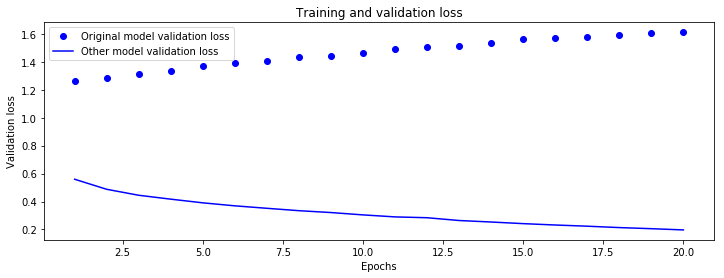

In [16]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

smaller_history = smaller_model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))
results = smaller_model.evaluate(X_test, y_test)
print(results)
plot_accuracy_history(original_history, smaller_history)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


  512/25000 [..............................] - ETA: 21s - loss: 0.6942 - acc: 0.4863

 1024/25000 [>.............................] - ETA: 15s - loss: 0.9493 - acc: 0.4941

 1536/25000 [>.............................] - ETA: 13s - loss: 0.9302 - acc: 0.4870

 2048/25000 [=>............................] - ETA: 12s - loss: 0.8679 - acc: 0.4932

 2560/25000 [==>...........................] - ETA: 11s - loss: 0.8263 - acc: 0.5473

 3072/25000 [==>...........................] - ETA: 10s - loss: 0.7943 - acc: 0.5824

 3584/25000 [===>..........................] - ETA: 10s - loss: 0.7663 - acc: 0.6088

 4096/25000 [===>..........................] - ETA: 9s - loss: 0.7450 - acc: 0.6187 

 4608/25000 [====>.........................] - ETA: 9s - loss: 0.7329 - acc: 0.6131

 5120/25000 [=====>........................] - ETA: 9s - loss: 0.7185 - acc: 0.6154

 5632/25000 [=====>........................] - ETA: 8s - loss: 0.7039 - acc: 0.6254

 6144/25000 [======>.......................] - ETA: 8s - loss: 0.6851 - acc: 0.6423

 6656/25000 [======>.......................] - ETA: 8s - loss: 0.6705 - acc: 0.6529

 7168/25000 [=======>......................] - ETA: 7s - loss: 0.6596 - acc: 0.6595

 7680/25000 [========>.....................] - ETA: 7s - loss: 0.6551 - acc: 0.6579

 8192/25000 [========>.....................] - ETA: 7s - loss: 0.6437 - acc: 0.6652

 8704/25000 [=========>....................] - ETA: 7s - loss: 0.6308 - acc: 0.6754

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.6183 - acc: 0.6848

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.6053 - acc: 0.6937

10240/25000 [===========>..................] - ETA: 6s - loss: 0.5980 - acc: 0.6979

10752/25000 [===========>..................] - ETA: 6s - loss: 0.6038 - acc: 0.6948

11264/25000 [============>.................] - ETA: 5s - loss: 0.5987 - acc: 0.6980

11776/25000 [=============>................] - ETA: 5s - loss: 0.5903 - acc: 0.7046

12288/25000 [=============>................] - ETA: 5s - loss: 0.5803 - acc: 0.7120

12800/25000 [==============>...............] - ETA: 5s - loss: 0.5706 - acc: 0.7184

13312/25000 [==============>...............] - ETA: 4s - loss: 0.5612 - acc: 0.7247

13824/25000 [===============>..............] - ETA: 4s - loss: 0.5522 - acc: 0.7300

14336/25000 [================>.............] - ETA: 4s - loss: 0.5464 - acc: 0.7336

14848/25000 [================>.............] - ETA: 4s - loss: 0.5440 - acc: 0.7353

15360/25000 [=================>............] - ETA: 3s - loss: 0.5439 - acc: 0.7348

15872/25000 [==================>...........] - ETA: 3s - loss: 0.5385 - acc: 0.7383

16384/25000 [==================>...........] - ETA: 3s - loss: 0.5319 - acc: 0.7426

16896/25000 [===================>..........] - ETA: 3s - loss: 0.5261 - acc: 0.7465

17408/25000 [===================>..........] - ETA: 3s - loss: 0.5194 - acc: 0.7506

17920/25000 [====================>.........] - ETA: 2s - loss: 0.5132 - acc: 0.7541

18432/25000 [=====================>........] - ETA: 2s - loss: 0.5071 - acc: 0.7576

18944/25000 [=====================>........] - ETA: 2s - loss: 0.5010 - acc: 0.7612

19456/25000 [======================>.......] - ETA: 2s - loss: 0.4944 - acc: 0.7649

19968/25000 [======================>.......] - ETA: 2s - loss: 0.4894 - acc: 0.7680



20480/25000 [=======================>......] - ETA: 1s - loss: 0.4842 - acc: 0.7708



20992/25000 [========================>.....] - ETA: 1s - loss: 0.4827 - acc: 0.7720

21504/25000 [========================>.....] - ETA: 1s - loss: 0.4872 - acc: 0.7707

22016/25000 [=========================>....] - ETA: 1s - loss: 0.4872 - acc: 0.7702

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4828 - acc: 0.7730

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4781 - acc: 0.7757

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4740 - acc: 0.7781

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4698 - acc: 0.7807

24576/25000 [============================>.] - ETA: 0s - loss: 0.4655 - acc: 0.7829

25000/25000 [==============================] - 14s 572us/step - loss: 0.4622 - acc: 0.7844 - val_loss: 0.2765 - val_acc: 0.8882


Epoch 2/20


  512/25000 [..............................] - ETA: 9s - loss: 0.1702 - acc: 0.9551



 1024/25000 [>.............................] - ETA: 9s - loss: 0.1590 - acc: 0.9541



 1536/25000 [>.............................] - ETA: 9s - loss: 0.1687 - acc: 0.9486

 2048/25000 [=>............................] - ETA: 9s - loss: 0.1804 - acc: 0.9385

 2560/25000 [==>...........................] - ETA: 8s - loss: 0.2178 - acc: 0.9211



 3072/25000 [==>...........................] - ETA: 8s - loss: 0.2552 - acc: 0.8991

 3584/25000 [===>..........................] - ETA: 8s - loss: 0.2652 - acc: 0.8906



 4096/25000 [===>..........................] - ETA: 8s - loss: 0.2622 - acc: 0.8916



 4608/25000 [====>.........................] - ETA: 8s - loss: 0.2540 - acc: 0.8947

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.2462 - acc: 0.8979

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.2401 - acc: 0.9016



 6144/25000 [======>.......................] - ETA: 7s - loss: 0.2339 - acc: 0.9045



 6656/25000 [======>.......................] - ETA: 7s - loss: 0.2313 - acc: 0.9066



 7168/25000 [=======>......................] - ETA: 7s - loss: 0.2272 - acc: 0.9082

 7680/25000 [========>.....................] - ETA: 6s - loss: 0.2253 - acc: 0.9094

 8192/25000 [========>.....................] - ETA: 6s - loss: 0.2254 - acc: 0.9099

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.2313 - acc: 0.9066

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.2370 - acc: 0.9036

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.2382 - acc: 0.9024

10240/25000 [===========>..................] - ETA: 5s - loss: 0.2353 - acc: 0.9042

10752/25000 [===========>..................] - ETA: 5s - loss: 0.2319 - acc: 0.9063

11264/25000 [============>.................] - ETA: 5s - loss: 0.2302 - acc: 0.9070

11776/25000 [=============>................] - ETA: 5s - loss: 0.2295 - acc: 0.9074



12288/25000 [=============>................] - ETA: 5s - loss: 0.2266 - acc: 0.9089



12800/25000 [==============>...............] - ETA: 4s - loss: 0.2247 - acc: 0.9101

13312/25000 [==============>...............] - ETA: 4s - loss: 0.2253 - acc: 0.9102

13824/25000 [===============>..............] - ETA: 4s - loss: 0.2230 - acc: 0.9111



14336/25000 [================>.............] - ETA: 4s - loss: 0.2200 - acc: 0.9125



14848/25000 [================>.............] - ETA: 3s - loss: 0.2173 - acc: 0.9133

15360/25000 [=================>............] - ETA: 3s - loss: 0.2166 - acc: 0.9136

15872/25000 [==================>...........] - ETA: 3s - loss: 0.2168 - acc: 0.9135



16384/25000 [==================>...........] - ETA: 3s - loss: 0.2230 - acc: 0.9106

16896/25000 [===================>..........] - ETA: 3s - loss: 0.2301 - acc: 0.9077

17408/25000 [===================>..........] - ETA: 2s - loss: 0.2309 - acc: 0.9072

17920/25000 [====================>.........] - ETA: 2s - loss: 0.2303 - acc: 0.9080

18432/25000 [=====================>........] - ETA: 2s - loss: 0.2291 - acc: 0.9087

18944/25000 [=====================>........] - ETA: 2s - loss: 0.2283 - acc: 0.9089

19456/25000 [======================>.......] - ETA: 2s - loss: 0.2264 - acc: 0.9095

19968/25000 [======================>.......] - ETA: 1s - loss: 0.2258 - acc: 0.9100

20480/25000 [=======================>......] - ETA: 1s - loss: 0.2255 - acc: 0.9100



20992/25000 [========================>.....] - ETA: 1s - loss: 0.2261 - acc: 0.9096



21504/25000 [========================>.....] - ETA: 1s - loss: 0.2259 - acc: 0.9098



22016/25000 [=========================>....] - ETA: 1s - loss: 0.2248 - acc: 0.9102

22528/25000 [==========================>...] - ETA: 0s - loss: 0.2235 - acc: 0.9109

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2232 - acc: 0.9109

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2223 - acc: 0.9113

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2213 - acc: 0.9117

24576/25000 [============================>.] - ETA: 0s - loss: 0.2202 - acc: 0.9122

25000/25000 [==============================] - 14s 572us/step - loss: 0.2195 - acc: 0.9126 - val_loss: 0.2779 - val_acc: 0.8890


Epoch 3/20


  512/25000 [..............................] - ETA: 9s - loss: 0.0838 - acc: 0.9727

 1024/25000 [>.............................] - ETA: 9s - loss: 0.0906 - acc: 0.9697

 1536/25000 [>.............................] - ETA: 9s - loss: 0.0963 - acc: 0.9674

 2048/25000 [=>............................] - ETA: 9s - loss: 0.1010 - acc: 0.9639

 2560/25000 [==>...........................] - ETA: 9s - loss: 0.1157 - acc: 0.9547

 3072/25000 [==>...........................] - ETA: 8s - loss: 0.1364 - acc: 0.9463



 3584/25000 [===>..........................] - ETA: 8s - loss: 0.1448 - acc: 0.9422

 4096/25000 [===>..........................] - ETA: 8s - loss: 0.1439 - acc: 0.9438

 4608/25000 [====>.........................] - ETA: 8s - loss: 0.1389 - acc: 0.9466

 5120/25000 [=====>........................] - ETA: 8s - loss: 0.1339 - acc: 0.9482

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.1286 - acc: 0.9508

 6144/25000 [======>.......................] - ETA: 7s - loss: 0.1252 - acc: 0.9526

 6656/25000 [======>.......................] - ETA: 7s - loss: 0.1231 - acc: 0.9537

 7168/25000 [=======>......................] - ETA: 7s - loss: 0.1197 - acc: 0.9559

 7680/25000 [========>.....................] - ETA: 7s - loss: 0.1158 - acc: 0.9576

 8192/25000 [========>.....................] - ETA: 7s - loss: 0.1160 - acc: 0.9572

 8704/25000 [=========>....................] - ETA: 7s - loss: 0.1163 - acc: 0.9573

 9216/25000 [==========>...................] - ETA: 7s - loss: 0.1201 - acc: 0.9548

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.1304 - acc: 0.9508

10240/25000 [===========>..................] - ETA: 6s - loss: 0.1361 - acc: 0.9470

10752/25000 [===========>..................] - ETA: 6s - loss: 0.1365 - acc: 0.9471

11264/25000 [============>.................] - ETA: 6s - loss: 0.1348 - acc: 0.9480

11776/25000 [=============>................] - ETA: 6s - loss: 0.1326 - acc: 0.9490

12288/25000 [=============>................] - ETA: 5s - loss: 0.1309 - acc: 0.9498

12800/25000 [==============>...............] - ETA: 5s - loss: 0.1297 - acc: 0.9502

13312/25000 [==============>...............] - ETA: 5s - loss: 0.1279 - acc: 0.9511

13824/25000 [===============>..............] - ETA: 5s - loss: 0.1272 - acc: 0.9513

14336/25000 [================>.............] - ETA: 4s - loss: 0.1252 - acc: 0.9523

14848/25000 [================>.............] - ETA: 4s - loss: 0.1226 - acc: 0.9535

15360/25000 [=================>............] - ETA: 4s - loss: 0.1208 - acc: 0.9543

15872/25000 [==================>...........] - ETA: 4s - loss: 0.1198 - acc: 0.9545

16384/25000 [==================>...........] - ETA: 3s - loss: 0.1187 - acc: 0.9548

16896/25000 [===================>..........] - ETA: 3s - loss: 0.1187 - acc: 0.9550

17408/25000 [===================>..........] - ETA: 3s - loss: 0.1228 - acc: 0.9530

17920/25000 [====================>.........] - ETA: 3s - loss: 0.1292 - acc: 0.9501

18432/25000 [=====================>........] - ETA: 2s - loss: 0.1302 - acc: 0.9497

18944/25000 [=====================>........] - ETA: 2s - loss: 0.1293 - acc: 0.9504

19456/25000 [======================>.......] - ETA: 2s - loss: 0.1280 - acc: 0.9511

19968/25000 [======================>.......] - ETA: 2s - loss: 0.1269 - acc: 0.9513

20480/25000 [=======================>......] - ETA: 2s - loss: 0.1268 - acc: 0.9515

20992/25000 [========================>.....] - ETA: 1s - loss: 0.1258 - acc: 0.9519

21504/25000 [========================>.....] - ETA: 1s - loss: 0.1256 - acc: 0.9521

22016/25000 [=========================>....] - ETA: 1s - loss: 0.1249 - acc: 0.9524

22528/25000 [==========================>...] - ETA: 1s - loss: 0.1241 - acc: 0.9529

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1229 - acc: 0.9537

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1218 - acc: 0.9541

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1212 - acc: 0.9543

24576/25000 [============================>.] - ETA: 0s - loss: 0.1199 - acc: 0.9548

25000/25000 [==============================] - 17s 682us/step - loss: 0.1196 - acc: 0.9549 - val_loss: 0.4515 - val_acc: 0.8544


Epoch 4/20


  512/25000 [..............................] - ETA: 11s - loss: 0.0683 - acc: 0.9785

 1024/25000 [>.............................] - ETA: 11s - loss: 0.0625 - acc: 0.9814

 1536/25000 [>.............................] - ETA: 11s - loss: 0.0539 - acc: 0.9831

 2048/25000 [=>............................] - ETA: 10s - loss: 0.0474 - acc: 0.9854

 2560/25000 [==>...........................] - ETA: 10s - loss: 0.0435 - acc: 0.9875

 3072/25000 [==>...........................] - ETA: 10s - loss: 0.0400 - acc: 0.9889

 3584/25000 [===>..........................] - ETA: 10s - loss: 0.0363 - acc: 0.9900

 4096/25000 [===>..........................] - ETA: 9s - loss: 0.0351 - acc: 0.9900 

 4608/25000 [====>.........................] - ETA: 9s - loss: 0.0330 - acc: 0.9909

 5120/25000 [=====>........................] - ETA: 9s - loss: 0.0312 - acc: 0.9912

 5632/25000 [=====>........................] - ETA: 9s - loss: 0.0294 - acc: 0.9920

 6144/25000 [======>.......................] - ETA: 8s - loss: 0.0293 - acc: 0.9920

 6656/25000 [======>.......................] - ETA: 8s - loss: 0.0283 - acc: 0.9923

 7168/25000 [=======>......................] - ETA: 8s - loss: 0.0279 - acc: 0.9925

 7680/25000 [========>.....................] - ETA: 8s - loss: 0.0270 - acc: 0.9927

 8192/25000 [========>.....................] - ETA: 8s - loss: 0.0269 - acc: 0.9927

 8704/25000 [=========>....................] - ETA: 7s - loss: 0.0330 - acc: 0.9901

 9216/25000 [==========>...................] - ETA: 7s - loss: 0.0923 - acc: 0.9753

 9728/25000 [==========>...................] - ETA: 7s - loss: 0.1175 - acc: 0.9665

10240/25000 [===========>..................] - ETA: 7s - loss: 0.1153 - acc: 0.9678

10752/25000 [===========>..................] - ETA: 6s - loss: 0.1126 - acc: 0.9688

11264/25000 [============>.................] - ETA: 6s - loss: 0.1096 - acc: 0.9699

11776/25000 [=============>................] - ETA: 6s - loss: 0.1068 - acc: 0.9710

12288/25000 [=============>................] - ETA: 6s - loss: 0.1039 - acc: 0.9718

12800/25000 [==============>...............] - ETA: 5s - loss: 0.1009 - acc: 0.9728

13312/25000 [==============>...............] - ETA: 5s - loss: 0.0984 - acc: 0.9736

13824/25000 [===============>..............] - ETA: 5s - loss: 0.0955 - acc: 0.9745

14336/25000 [================>.............] - ETA: 5s - loss: 0.0940 - acc: 0.9748

14848/25000 [================>.............] - ETA: 4s - loss: 0.0918 - acc: 0.9755

15360/25000 [=================>............] - ETA: 4s - loss: 0.0897 - acc: 0.9761

15872/25000 [==================>...........] - ETA: 4s - loss: 0.0881 - acc: 0.9766

16384/25000 [==================>...........] - ETA: 4s - loss: 0.0860 - acc: 0.9772

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0842 - acc: 0.9776

17408/25000 [===================>..........] - ETA: 3s - loss: 0.0825 - acc: 0.9781

17920/25000 [====================>.........] - ETA: 3s - loss: 0.0809 - acc: 0.9785

18432/25000 [=====================>........] - ETA: 3s - loss: 0.0791 - acc: 0.9791

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0776 - acc: 0.9794

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0767 - acc: 0.9796

19968/25000 [======================>.......] - ETA: 2s - loss: 0.0752 - acc: 0.9801

20480/25000 [=======================>......] - ETA: 2s - loss: 0.0739 - acc: 0.9804

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0727 - acc: 0.9807

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0716 - acc: 0.9807

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0702 - acc: 0.9812

22528/25000 [==========================>...] - ETA: 1s - loss: 0.0690 - acc: 0.9815

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0684 - acc: 0.9817

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0680 - acc: 0.9817

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0683 - acc: 0.9814

24576/25000 [============================>.] - ETA: 0s - loss: 0.0682 - acc: 0.9812

25000/25000 [==============================] - 16s 639us/step - loss: 0.0682 - acc: 0.9814 - val_loss: 0.4295 - val_acc: 0.8763


Epoch 5/20


  512/25000 [..............................] - ETA: 10s - loss: 0.0130 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 0.0101 - acc: 1.0000 

 1536/25000 [>.............................] - ETA: 9s - loss: 0.0087 - acc: 1.0000



 2048/25000 [=>............................] - ETA: 9s - loss: 0.0084 - acc: 1.0000



 2560/25000 [==>...........................] - ETA: 9s - loss: 0.0087 - acc: 0.9996



 3072/25000 [==>...........................] - ETA: 8s - loss: 0.0082 - acc: 0.9997

 3584/25000 [===>..........................] - ETA: 8s - loss: 0.0075 - acc: 0.9997



 4096/25000 [===>..........................] - ETA: 8s - loss: 0.0071 - acc: 0.9998

 4608/25000 [====>.........................] - ETA: 8s - loss: 0.0068 - acc: 0.9998

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.0070 - acc: 0.9996

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.0070 - acc: 0.9995

 6144/25000 [======>.......................] - ETA: 7s - loss: 0.0067 - acc: 0.9995

 6656/25000 [======>.......................] - ETA: 7s - loss: 0.0069 - acc: 0.9994

 7168/25000 [=======>......................] - ETA: 7s - loss: 0.0068 - acc: 0.9994

 7680/25000 [========>.....................] - ETA: 7s - loss: 0.0065 - acc: 0.9995

 8192/25000 [========>.....................] - ETA: 6s - loss: 0.0070 - acc: 0.9994

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.0069 - acc: 0.9993

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.0070 - acc: 0.9991

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.0068 - acc: 0.9992

10240/25000 [===========>..................] - ETA: 6s - loss: 0.0066 - acc: 0.9992

10752/25000 [===========>..................] - ETA: 5s - loss: 0.0064 - acc: 0.9993

11264/25000 [============>.................] - ETA: 5s - loss: 0.0066 - acc: 0.9992

11776/25000 [=============>................] - ETA: 5s - loss: 0.0065 - acc: 0.9992

12288/25000 [=============>................] - ETA: 5s - loss: 0.0065 - acc: 0.9991

12800/25000 [==============>...............] - ETA: 5s - loss: 0.0064 - acc: 0.9991

13312/25000 [==============>...............] - ETA: 4s - loss: 0.0063 - acc: 0.9992

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0061 - acc: 0.9992

14336/25000 [================>.............] - ETA: 4s - loss: 0.0061 - acc: 0.9992



14848/25000 [================>.............] - ETA: 4s - loss: 0.0060 - acc: 0.9992

15360/25000 [=================>............] - ETA: 3s - loss: 0.0059 - acc: 0.9992



15872/25000 [==================>...........] - ETA: 3s - loss: 0.0059 - acc: 0.9992



16384/25000 [==================>...........] - ETA: 3s - loss: 0.0059 - acc: 0.9991

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0063 - acc: 0.9990

17408/25000 [===================>..........] - ETA: 3s - loss: 0.0185 - acc: 0.9953

17920/25000 [====================>.........] - ETA: 2s - loss: 0.1252 - acc: 0.9832

18432/25000 [=====================>........] - ETA: 2s - loss: 0.1232 - acc: 0.9832

18944/25000 [=====================>........] - ETA: 2s - loss: 0.1201 - acc: 0.9837

19456/25000 [======================>.......] - ETA: 2s - loss: 0.1176 - acc: 0.9840

19968/25000 [======================>.......] - ETA: 2s - loss: 0.1150 - acc: 0.9844

20480/25000 [=======================>......] - ETA: 1s - loss: 0.1123 - acc: 0.9848

20992/25000 [========================>.....] - ETA: 1s - loss: 0.1098 - acc: 0.9851

21504/25000 [========================>.....] - ETA: 1s - loss: 0.1074 - acc: 0.9854



22016/25000 [=========================>....] - ETA: 1s - loss: 0.1051 - acc: 0.9857

22528/25000 [==========================>...] - ETA: 1s - loss: 0.1029 - acc: 0.9861



23040/25000 [==========================>...] - ETA: 0s - loss: 0.1007 - acc: 0.9864

23552/25000 [===========================>..]

 - ETA: 0s - loss: 0.0987 - acc: 0.9867

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0967 - acc: 0.9870

24576/25000 [============================>.] - ETA: 0s - loss: 0.0950 - acc: 0.9871

25000/25000 [==============================] - 15s 589us/step - loss: 0.0936 - acc: 0.9873 - val_loss: 0.4768 - val_acc: 0.8802


Epoch 6/20


  512/25000 [..............................] - ETA: 9s - loss: 0.0024 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 0.0030 - acc: 1.0000



 1536/25000 [>.............................] - ETA: 9s - loss: 0.0028 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 9s - loss: 0.0028 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 9s - loss: 0.0032 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 0.0035 - acc: 0.9997



 3584/25000 [===>..........................] - ETA: 8s - loss: 0.0033 - acc: 0.9997

 4096/25000 [===>..........................] - ETA: 8s - loss: 0.0033 - acc: 0.9995

 4608/25000 [====>.........................] - ETA: 8s - loss: 0.0037 - acc: 0.9993

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.0035 - acc: 0.9994

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.0033 - acc: 0.9995



 6144/25000 [======>.......................] - ETA: 7s - loss: 0.0032 - acc: 0.9995



 6656/25000 [======>.......................] - ETA: 7s - loss: 0.0031 - acc: 0.9995

 7168/25000 [=======>......................] - ETA: 7s - loss: 0.0030 - acc: 0.9996

 7680/25000 [========>.....................] - ETA: 6s - loss: 0.0029 - acc: 0.9996

 8192/25000 [========>.....................] - ETA: 6s - loss: 0.0028 - acc: 0.9996

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.0026 - acc: 0.9997

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.0026 - acc: 0.9997

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.0025 - acc: 0.9997

10240/25000 [===========>..................] - ETA: 5s - loss: 0.0025 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 5s - loss: 0.0025 - acc: 0.9996

11264/25000 [============>.................] - ETA: 5s - loss: 0.0025 - acc: 0.9996

11776/25000 [=============>................] - ETA: 5s - loss: 0.0025 - acc: 0.9997



12288/25000 [=============>................] - ETA: 5s - loss: 0.0024 - acc: 0.9997



12800/25000 [==============>...............] - ETA: 4s - loss: 0.0024 - acc: 0.9997

13312/25000 [==============>...............] - ETA: 4s - loss: 0.0023 - acc: 0.9997

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0023 - acc: 0.9997

14336/25000 [================>.............] - ETA: 4s - loss: 0.0022 - acc: 0.9997

14848/25000 [================>.............] - ETA: 4s - loss: 0.0022 - acc: 0.9997

15360/25000 [=================>............] - ETA: 3s - loss: 0.0022 - acc: 0.9997

15872/25000 [==================>...........] - ETA: 3s - loss: 0.0021 - acc: 0.9997

16384/25000 [==================>...........] - ETA: 3s - loss: 0.0021 - acc: 0.9997

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0020 - acc: 0.9997

17408/25000 [===================>..........] - ETA: 3s - loss: 0.0020 - acc: 0.9997

17920/25000 [====================>.........] - ETA: 2s - loss: 0.0020 - acc: 0.9997

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0019 - acc: 0.9997



18944/25000 [=====================>........] - ETA: 2s - loss: 0.0019 - acc: 0.9997

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0019 - acc: 0.9997

19968/25000 [======================>.......] - ETA: 2s - loss: 0.0019 - acc: 0.9997

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0018 - acc: 0.9998

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0018 - acc: 0.9998



21504/25000 [========================>.....] - ETA: 1s - loss: 0.0018 - acc: 0.9998

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0018 - acc: 0.9998

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0017 - acc: 0.9998



23040/25000 [==========================>...] - ETA: 0s - loss: 0.0017 - acc: 0.9998

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0017 - acc: 0.9998

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0017 - acc: 0.9998

24576/25000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9998

25000/25000 [==============================] - 14s 580us/step - loss: 0.0017 - acc: 0.9998 - val_loss: 1.4731 - val_acc: 0.7874


Epoch 7/20
  512/25000 [..............................] - ETA: 9s - loss: 0.1891 - acc: 0.9375

 1024/25000 [>.............................] - ETA: 9s - loss: 2.0168 - acc: 0.7617

 1536/25000 [>.............................] - ETA: 9s - loss: 1.4033 - acc: 0.8216

 2048/25000 [=>............................] - ETA: 9s - loss: 1.0529 - acc: 0.8662

 2560/25000 [==>...........................] - ETA: 8s - loss: 0.8427 - acc: 0.8930

 3072/25000 [==>...........................] - ETA: 8s - loss: 0.7025 - acc: 0.9108

 3584/25000 [===>..........................] - ETA: 8s - loss: 0.6024 - acc: 0.9235

 4096/25000 [===>..........................] - ETA: 8s - loss: 0.5273 - acc: 0.9331

 4608/25000 [====>.........................] - ETA: 7s - loss: 0.4689 - acc: 0.9405

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.4221 - acc: 0.9465



 5632/25000 [=====>........................] - ETA: 7s - loss: 0.3839 - acc: 0.9513

 6144/25000 [======>.......................] - ETA: 7s - loss: 0.3520 - acc: 0.9554

 6656/25000 [======>.......................] - ETA: 7s - loss: 0.3250 - acc: 0.9588

 7168/25000 [=======>......................] - ETA: 6s - loss: 0.3019 - acc: 0.9618

 7680/25000 [========>.....................] - ETA: 6s - loss: 0.2819 - acc: 0.9643

 8192/25000 [========>.....................] - ETA: 7s - loss: 0.2643 - acc: 0.9666

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.2489 - acc: 0.9685

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.2351 - acc: 0.9703

 9728/25000 [==========>...................] - ETA: 6s - loss: 0.2228 - acc: 0.9718



10240/25000 [===========>..................] - ETA: 6s - loss: 0.2117 - acc: 0.9732

10752/25000 [===========>..................] - ETA: 6s - loss: 0.2017 - acc: 0.9745

11264/25000 [============>.................] - ETA: 5s - loss: 0.1925 - acc: 0.9757



11776/25000 [=============>................] - ETA: 5s - loss: 0.1842 - acc: 0.9767



12288/25000 [=============>................] - ETA: 5s - loss: 0.1766 - acc: 0.9777



12800/25000 [==============>...............] - ETA: 5s - loss: 0.1695 - acc: 0.9786

13312/25000 [==============>...............] - ETA: 4s - loss: 0.1631 - acc: 0.9794

13824/25000 [===============>..............] - ETA: 4s - loss: 0.1571 - acc: 0.9802

14336/25000 [================>.............] - ETA: 4s - loss: 0.1515 - acc: 0.9809

14848/25000 [================>.............]

 - ETA: 4s - loss: 0.1463 - acc: 0.9815

15360/25000 [=================>............] - ETA: 4s - loss: 0.1414 - acc: 0.9822

15872/25000 [==================>...........] - ETA: 3s - loss: 0.1369 - acc: 0.9827

16384/25000 [==================>...........] - ETA: 3s - loss: 0.1326 - acc: 0.9833

16896/25000 [===================>..........] - ETA: 3s - loss: 0.1287 - acc: 0.9838

17408/25000 [===================>..........] - ETA: 3s - loss: 0.1249 - acc: 0.9843

17920/25000 [====================>.........] - ETA: 2s - loss: 0.1214 - acc: 0.9847

18432/25000 [=====================>........] - ETA: 2s - loss: 0.1180 - acc: 0.9851

18944/25000 [=====================>........] - ETA: 2s - loss: 0.1148 - acc: 0.9855

19456/25000 [======================>.......] - ETA: 2s - loss: 0.1118 - acc: 0.9859



19968/25000 [======================>.......] - ETA: 2s - loss: 0.1090 - acc: 0.9863

20480/25000 [=======================>......] - ETA: 1s - loss: 0.1063 - acc: 0.9866

20992/25000 [========================>.....] - ETA: 1s - loss: 0.1037 - acc: 0.9869

21504/25000 [========================>.....] - ETA: 1s - loss: 0.1012 - acc: 0.9873

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0989 - acc: 0.9876



22528/25000 [==========================>...] - ETA: 1s - loss: 0.0967 - acc: 0.9878

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0945 - acc: 0.9881

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0925 - acc: 0.9884

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0905 - acc: 0.9886

24576/25000 [============================>.] - ETA: 0s - loss: 0.0887 - acc: 0.9889

25000/25000 [==============================] - 15s 596us/step - loss: 0.0872 - acc: 0.9890 - val_loss: 0.6812 - val_acc: 0.8783


Epoch 8/20


  512/25000 [..............................] - ETA: 10s - loss: 2.1715e-04 - acc: 1.0000



 1024/25000 [>.............................] - ETA: 10s - loss: 2.2513e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 2.3034e-04 - acc: 1.0000 



 2048/25000 [=>............................] - ETA: 9s - loss: 2.2115e-04 - acc: 1.0000



 2560/25000 [==>...........................] - ETA: 9s - loss: 2.1383e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 2.0811e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 1.9585e-04 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 1.9751e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 8s - loss: 1.9148e-04 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 8s - loss: 1.9615e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 1.9167e-04 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 2.0121e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 1.9724e-04 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 7s - loss: 1.9533e-04 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 1.9184e-04 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 2.0269e-04 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 1.9745e-04 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 1.9905e-04 - acc: 1.0000



 9728/25000 [==========>...................] - ETA: 6s - loss: 1.9957e-04 - acc: 1.0000



10240/25000 [===========>..................] - ETA: 5s - loss: 2.0645e-04 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 2.0679e-04 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 2.0549e-04 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 2.1025e-04 - acc: 1.0000

12288/25000 [=============>................] - ETA: 5s - loss: 2.0675e-04 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 2.0191e-04 - acc: 1.0000



13312/25000 [==============>...............] - ETA: 4s - loss: 2.0167e-04 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 2.0164e-04 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 1.9893e-04 - acc: 1.0000

14848/25000 [================>.............] - ETA: 4s - loss: 1.9443e-04 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 1.9051e-04 - acc: 1.0000



15872/25000 [==================>...........] - ETA: 3s - loss: 1.8789e-04 - acc: 1.0000

16384/25000 [==================>...........] - ETA: 3s - loss: 1.8530e-04 - acc: 1.0000

16896/25000 [===================>..........] - ETA: 3s - loss: 1.8153e-04 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 3s - loss: 1.8479e-04 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 2.7648e-04 - acc: 0.9999

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0034 - acc: 0.9990    

18944/25000 [=====================>........] - ETA: 2s - loss: 0.1053 - acc: 0.9881

19456/25000 [======================>.......] - ETA: 2s - loss: 0.1181 - acc: 0.9855

19968/25000 [======================>.......] - ETA: 2s - loss: 0.1154 - acc: 0.9858



20480/25000 [=======================>......] - ETA: 1s - loss: 0.1125 - acc: 0.9862

20992/25000 [========================>.....] - ETA: 1s - loss: 0.1098 - acc: 0.9865

21504/25000 [========================>.....] - ETA: 1s - loss: 0.1072 - acc: 0.9868

22016/25000 [=========================>....] - ETA: 1s - loss: 0.1048 - acc: 0.9871

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1024 - acc: 0.9874

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1002 - acc: 0.9877

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0980 - acc: 0.9880

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0960 - acc: 0.9882

24576/25000 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.9885

25000/25000 [==============================] - 15s 584us/step - loss: 0.0924 - acc: 0.9887 - val_loss: 0.5878 - val_acc: 0.8778


Epoch 9/20


  512/25000 [..............................] - ETA: 9s - loss: 5.9954e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 6.4301e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 6.8608e-04 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 9s - loss: 6.5779e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 6.2054e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 6.1463e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 6.0345e-04 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 5.7022e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 5.5363e-04 - acc: 1.0000

 5120/25000 [=====>........................] - ETA: 7s - loss: 5.6352e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 5.5170e-04 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 5.3832e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 5.3532e-04 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 5.2562e-04 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 5.2269e-04 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 5.0770e-04 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 5.0430e-04 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 5.0935e-04 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 4.9798e-04 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 4.9298e-04 - acc: 1.0000



10752/25000 [===========>..................] - ETA: 5s - loss: 4.9355e-04 - acc: 1.0000



11264/25000 [============>.................] - ETA: 5s - loss: 4.8765e-04 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 4.7614e-04 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 4.6879e-04 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 4.6313e-04 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 4.5873e-04 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 4.5241e-04 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 4.4786e-04 - acc: 1.0000



14848/25000 [================>.............] - ETA: 3s - loss: 4.4394e-04 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 4.4226e-04 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 4.3565e-04 - acc: 1.0000

16384/25000 [==================>...........] - ETA: 3s - loss: 4.2796e-04 - acc: 1.0000

16896/25000 [===================>..........] - ETA: 3s - loss: 4.2252e-04 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 2s - loss: 4.1529e-04 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 4.1402e-04 - acc: 1.0000

18432/25000 [=====================>........] - ETA: 2s - loss: 4.1591e-04 - acc: 1.0000

18944/25000 [=====================>........] - ETA: 2s - loss: 4.0819e-04 - acc: 1.0000



19456/25000 [======================>.......] - ETA: 2s - loss: 3.9987e-04 - acc: 1.0000



19968/25000 [======================>.......] - ETA: 1s - loss: 3.9668e-04 - acc: 1.0000



20480/25000 [=======================>......] - ETA: 1s - loss: 4.5243e-04 - acc: 1.0000

20992/25000 [========================>.....] - ETA: 1s - loss: 4.6976e-04 - acc: 1.0000

21504/25000 [========================>.....] - ETA: 1s - loss: 4.7774e-04 - acc: 1.0000

22016/25000 [=========================>....] - ETA: 1s - loss: 6.0029e-04 - acc: 0.9999



22528/25000 [==========================>...] - ETA: 0s - loss: 6.1148e-04 - acc: 0.9999

23040/25000 [==========================>...] - ETA: 0s - loss: 6.0972e-04 - acc: 0.9999

23552/25000 [===========================>..] - ETA: 0s - loss: 6.0141e-04 - acc: 0.9999

24064/25000 [===========================>..] - ETA: 0s - loss: 5.9849e-04 - acc: 0.9999

24576/25000 [============================>.] - ETA: 0s - loss: 5.9209e-04 - acc: 0.9999

25000/25000 [==============================] - 14s 553us/step - loss: 5.8892e-04 - acc: 0.9999 - val_loss: 0.7287 - val_acc: 0.8787


Epoch 10/20
  512/25000 [..............................] - ETA: 9s - loss: 1.6548e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 1.6617e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 1.4204e-04 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 1.3210e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 1.3402e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 1.3007e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 1.2294e-04 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 7s - loss: 1.2103e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 1.2076e-04 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 7s - loss: 1.2036e-04 - acc: 1.0000



 5632/25000 [=====>........................] - ETA: 7s - loss: 1.1964e-04 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 1.1357e-04 - acc: 1.0000



 6656/25000 [======>.......................] - ETA: 7s - loss: 1.1360e-04 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 1.1467e-04 - acc: 1.0000



 7680/25000 [========>.....................] - ETA: 6s - loss: 1.1395e-04 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 1.1140e-04 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 1.1012e-04 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 1.0784e-04 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 1.0515e-04 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 1.0365e-04 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 1.0136e-04 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 1.0875e-04 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 1.1818e-04 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 1.1960e-04 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 1.1702e-04 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 1.1835e-04 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 1.1600e-04 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 1.1438e-04 - acc: 1.0000

14848/25000 [================>.............] - ETA: 3s - loss: 1.1566e-04 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 1.3798e-04 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 2.8868e-04 - acc: 0.9999

16384/25000 [==================>...........] - ETA: 3s - loss: 0.0017 - acc: 0.9996    

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0750 - acc: 0.9899

17408/25000 [===================>..........] - ETA: 2s - loss: 0.1048 - acc: 0.9847

17920/25000 [====================>.........] - ETA: 2s - loss: 0.1018 - acc: 0.9852

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0991 - acc: 0.9855

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0965 - acc: 0.9859

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0939 - acc: 0.9863

19968/25000 [======================>.......] - ETA: 1s - loss: 0.0916 - acc: 0.9866

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0893 - acc: 0.9870

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0871 - acc: 0.9873



21504/25000 [========================>.....] - ETA: 1s - loss: 0.0851 - acc: 0.9876



22016/25000 [=========================>....] - ETA: 1s - loss: 0.0831 - acc: 0.9879

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0812 - acc: 0.9881



23040/25000 [==========================>...] - ETA: 0s - loss: 0.0794 - acc: 0.9884

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0777 - acc: 0.9887

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0761 - acc: 0.9889

24576/25000 [============================>.] - ETA: 0s - loss: 0.0745 - acc: 0.9891

25000/25000 [==============================] - 14s 569us/step - loss: 0.0733 - acc: 0.9893 - val_loss: 0.6802 - val_acc: 0.8793


Epoch 11/20
  512/25000 [..............................] - ETA: 9s - loss: 2.4866e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 2.1802e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 2.6295e-04 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 2.8225e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 2.5903e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 2.6588e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 2.6616e-04 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 7s - loss: 2.6073e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 2.5609e-04 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 7s - loss: 2.4835e-04 - acc: 1.0000



 5632/25000 [=====>........................] - ETA: 7s - loss: 2.4598e-04 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 2.4028e-04 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 2.4382e-04 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 2.3641e-04 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 2.3539e-04 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 2.3368e-04 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 2.3007e-04 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 2.2917e-04 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 2.2346e-04 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 2.2054e-04 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 2.2046e-04 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 2.1607e-04 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 2.1586e-04 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 2.1909e-04 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 2.1400e-04 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 2.1168e-04 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 3.0828e-04 - acc: 0.9999

14336/25000 [================>.............] - ETA: 4s - loss: 3.0822e-04 - acc: 0.9999

14848/25000 [================>.............] - ETA: 3s - loss: 3.0394e-04 - acc: 0.9999

15360/25000 [=================>............] - ETA: 3s - loss: 3.0737e-04 - acc: 0.9999

15872/25000 [==================>...........] - ETA: 3s - loss: 3.0872e-04 - acc: 0.9999

16384/25000 [==================>...........] - ETA: 3s - loss: 3.0414e-04 - acc: 0.9999

16896/25000 [===================>..........] - ETA: 3s - loss: 3.1586e-04 - acc: 0.9999

17408/25000 [===================>..........] - ETA: 2s - loss: 3.1190e-04 - acc: 0.9999

17920/25000 [====================>.........] - ETA: 2s - loss: 3.0752e-04 - acc: 0.9999

18432/25000 [=====================>........] - ETA: 2s - loss: 3.0353e-04 - acc: 0.9999

18944/25000 [=====================>........] - ETA: 2s - loss: 2.9801e-04 - acc: 0.9999

19456/25000 [======================>.......] - ETA: 2s - loss: 2.9430e-04 - acc: 0.9999

19968/25000 [======================>.......] - ETA: 1s - loss: 2.9126e-04 - acc: 0.9999

20480/25000 [=======================>......] - ETA: 1s - loss: 2.8707e-04 - acc: 1.0000

20992/25000 [========================>.....] - ETA: 1s - loss: 2.8351e-04 - acc: 1.0000

21504/25000 [========================>.....] - ETA: 1s - loss: 2.9778e-04 - acc: 1.0000

22016/25000 [=========================>....] - ETA: 1s - loss: 2.9485e-04 - acc: 1.0000

22528/25000 [==========================>...] - ETA: 0s - loss: 2.9480e-04 - acc: 1.0000

23040/25000 [==========================>...] - ETA: 0s - loss: 2.9472e-04 - acc: 1.0000

23552/25000 [===========================>..] - ETA: 0s - loss: 2.9192e-04 - acc: 1.0000

24064/25000 [===========================>..] - ETA: 0s - loss: 2.9012e-04 - acc: 1.0000

24576/25000 [============================>.] - ETA: 0s - loss: 2.8803e-04 - acc: 1.0000

25000/25000 [==============================] - 14s 548us/step - loss: 2.8561e-04 - acc: 1.0000 - val_loss: 0.7747 - val_acc: 0.8758


Epoch 12/20
  512/25000 [..............................] - ETA: 9s - loss: 1.0350e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 8.4337e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 6.9805e-05 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 7.3115e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 6.6598e-05 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 6.3257e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 6.2491e-05 - acc: 1.0000



 4096/25000 [===>..........................] - ETA: 8s - loss: 6.6862e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 6.7706e-05 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 7s - loss: 6.8445e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 7.6546e-05 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 7.5219e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 7.5429e-05 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 7.2362e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 7.2067e-05 - acc: 1.0000



 8192/25000 [========>.....................] - ETA: 6s - loss: 6.9946e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 7.1268e-05 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 7.0592e-05 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 6.9340e-05 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 7.0288e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 6.8410e-05 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 6.7392e-05 - acc: 1.0000



11776/25000 [=============>................] - ETA: 5s - loss: 6.5688e-05 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 6.5267e-05 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 7.5876e-05 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 2.7467e-04 - acc: 0.9999

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0244 - acc: 0.9950    

14336/25000 [================>.............] - ETA: 4s - loss: 0.1059 - acc: 0.9851

14848/25000 [================>.............] - ETA: 3s - loss: 0.1038 - acc: 0.9854

15360/25000 [=================>............] - ETA: 3s - loss: 0.1004 - acc: 0.9859

15872/25000 [==================>...........] - ETA: 3s - loss: 0.0975 - acc: 0.9863

16384/25000 [==================>...........]

 - ETA: 3s - loss: 0.0945 - acc: 0.9867



16896/25000 [===================>..........] - ETA: 3s - loss: 0.0917 - acc: 0.9871

17408/25000 [===================>..........] - ETA: 2s - loss: 0.0890 - acc: 0.9875

17920/25000 [====================>.........] - ETA: 2s - loss: 0.0865 - acc: 0.9878

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0841 - acc: 0.9882

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0818 - acc: 0.9885

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0797 - acc: 0.9888

19968/25000 [======================>.......]

 - ETA: 1s - loss: 0.0777 - acc: 0.9891

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0757 - acc: 0.9894

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0739 - acc: 0.9896

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0722 - acc: 0.9899

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0705 - acc: 0.9901

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0689 - acc: 0.9903

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0674 - acc: 0.9905

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0659 - acc: 0.9907

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0645 - acc: 0.9909

24576/25000 [============================>.] - ETA: 0s - loss: 0.0632 - acc: 0.9911

25000/25000 [==============================] - 14s 549us/step - loss: 0.0621 - acc: 0.9913 - val_loss: 0.7742 - val_acc: 0.8706


Epoch 13/20


  512/25000 [..............................] - ETA: 9s - loss: 3.2300e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 2.6383e-04 - acc: 1.0000



 1536/25000 [>.............................] - ETA: 9s - loss: 2.5635e-04 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 9s - loss: 2.3101e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 2.2352e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 2.0167e-04 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 1.9995e-04 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 1.9803e-04 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 8s - loss: 1.9446e-04 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 7s - loss: 1.9341e-04 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 6.9194e-04 - acc: 0.9998

 6144/25000 [======>.......................] - ETA: 7s - loss: 0.0011 - acc: 0.9997    

 6656/25000 [======>.......................] - ETA: 7s - loss: 0.0010 - acc: 0.9997



 7168/25000 [=======>......................] - ETA: 7s - loss: 9.8642e-04 - acc: 0.9997

 7680/25000 [========>.....................] - ETA: 6s - loss: 9.4078e-04 - acc: 0.9997

 8192/25000 [========>.....................] - ETA: 6s - loss: 8.9537e-04 - acc: 0.9998

 8704/25000 [=========>....................] - ETA: 6s - loss: 8.6242e-04 - acc: 0.9998

 9216/25000 [==========>...................] - ETA: 6s - loss: 8.3096e-04 - acc: 0.9998

 9728/25000 [==========>...................] - ETA: 5s - loss: 7.9562e-04 - acc: 0.9998

10240/25000 [===========>..................] - ETA: 5s - loss: 7.7275e-04 - acc: 0.9998

10752/25000 [===========>..................] - ETA: 5s - loss: 7.4407e-04 - acc: 0.9998

11264/25000 [============>.................] - ETA: 5s - loss: 7.3690e-04 - acc: 0.9998

11776/25000 [=============>................] - ETA: 5s - loss: 7.3148e-04 - acc: 0.9998

12288/25000 [=============>................] - ETA: 4s - loss: 7.0757e-04 - acc: 0.9998

12800/25000 [==============>...............] - ETA: 4s - loss: 6.9168e-04 - acc: 0.9998

13312/25000 [==============>...............] - ETA: 4s - loss: 6.7795e-04 - acc: 0.9998

13824/25000 [===============>..............] - ETA: 4s - loss: 6.5805e-04 - acc: 0.9999

14336/25000 [================>.............] - ETA: 4s - loss: 6.3939e-04 - acc: 0.9999

14848/25000 [================>.............] - ETA: 3s - loss: 6.2271e-04 - acc: 0.9999



15360/25000 [=================>............] - ETA: 3s - loss: 6.0973e-04 - acc: 0.9999

15872/25000 [==================>...........] - ETA: 3s - loss: 5.9345e-04 - acc: 0.9999



16384/25000 [==================>...........] - ETA: 3s - loss: 5.7869e-04 - acc: 0.9999

16896/25000 [===================>..........] - ETA: 3s - loss: 5.6380e-04 - acc: 0.9999

17408/25000 [===================>..........] - ETA: 2s - loss: 5.5176e-04 - acc: 0.9999

17920/25000 [====================>.........] - ETA: 2s - loss: 5.4131e-04 - acc: 0.9999

18432/25000 [=====================>........] - ETA: 2s - loss: 5.2907e-04 - acc: 0.9999

18944/25000 [=====================>........] - ETA: 2s - loss: 5.1643e-04 - acc: 0.9999

19456/25000 [======================>.......] - ETA: 2s - loss: 5.1443e-04 - acc: 0.9999

19968/25000 [======================>.......] - ETA: 1s - loss: 5.2488e-04 - acc: 0.9999

20480/25000 [=======================>......] - ETA: 1s - loss: 5.1857e-04 - acc: 0.9999

20992/25000 [========================>.....] - ETA: 1s - loss: 5.1113e-04 - acc: 0.9999

21504/25000 [========================>.....] - ETA: 1s - loss: 5.0518e-04 - acc: 0.9999

22016/25000 [=========================>....] - ETA: 1s - loss: 4.9485e-04 - acc: 0.9999

22528/25000 [==========================>...] - ETA: 0s - loss: 4.8492e-04 - acc: 0.9999

23040/25000 [==========================>...] - ETA: 0s - loss: 4.7643e-04 - acc: 0.9999

23552/25000 [===========================>..] - ETA: 0s - loss: 4.7163e-04 - acc: 0.9999

24064/25000 [===========================>..] - ETA: 0s - loss: 4.6342e-04 - acc: 0.9999

24576/25000 [============================>.] - ETA: 0s - loss: 4.5701e-04 - acc: 0.9999

25000/25000 [==============================] - 14s 548us/step - loss: 4.5077e-04 - acc: 0.9999 - val_loss: 0.8585 - val_acc: 0.8754


Epoch 14/20
  512/25000 [..............................] - ETA: 9s - loss: 1.4625e-05 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 8s - loss: 7.6066e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 7.4063e-05 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 6.5984e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 5.7754e-05 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 6.4858e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 6.3164e-05 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 7s - loss: 6.1312e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 5.8429e-05 - acc: 1.0000

 5120/25000 [=====>........................] - ETA: 7s - loss: 5.7569e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 5.4508e-05 - acc: 1.0000

 6144/25000 [======>.......................]

 - ETA: 7s - loss: 5.5218e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 6s - loss: 5.4292e-05 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 5.2787e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 5.0956e-05 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 4.9045e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 4.7514e-05 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 5s - loss: 4.5760e-05 - acc: 1.0000



 9728/25000 [==========>...................] - ETA: 5s - loss: 4.4231e-05 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 4.4571e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 4.3196e-05 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 4.2284e-05 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 4.1121e-05 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 4.0079e-05 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 4.0014e-05 - acc: 1.0000



13312/25000 [==============>...............] - ETA: 4s - loss: 3.9489e-05 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 3.8878e-05 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 3.8778e-05 - acc: 1.0000



14848/25000 [================>.............] - ETA: 3s - loss: 3.8230e-05 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 3.7355e-05 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 3.6793e-05 - acc: 1.0000

16384/25000 [==================>...........] - ETA: 3s - loss: 3.6384e-05 - acc: 1.0000

16896/25000 [===================>..........] - ETA: 3s - loss: 3.6321e-05 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 2s - loss: 3.5967e-05 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 3.5767e-05 - acc: 1.0000

18432/25000 [=====================>........] - ETA: 2s - loss: 3.5491e-05 - acc: 1.0000

18944/25000 [=====================>........] - ETA: 2s - loss: 3.5846e-05 - acc: 1.0000

19456/25000 [======================>.......] - ETA: 2s - loss: 3.6401e-05 - acc: 1.0000

19968/25000 [======================>.......] - ETA: 1s - loss: 3.5771e-05 - acc: 1.0000

20480/25000 [=======================>......] - ETA: 1s - loss: 3.5160e-05 - acc: 1.0000

20992/25000 [========================>.....] - ETA: 1s - loss: 3.4643e-05 - acc: 1.0000

21504/25000 [========================>.....] - ETA: 1s - loss: 3.4104e-05 - acc: 1.0000

22016/25000 [=========================>....] - ETA: 1s - loss: 3.3483e-05 - acc: 1.0000



22528/25000 [==========================>...] - ETA: 0s - loss: 3.2977e-05 - acc: 1.0000



23040/25000 [==========================>...] - ETA: 0s - loss: 3.2637e-05 - acc: 1.0000



23552/25000 [===========================>..] - ETA: 0s - loss: 3.2137e-05 - acc: 1.0000

24064/25000 [===========================>..] - ETA: 0s - loss: 3.1891e-05 - acc: 1.0000

24576/25000 [============================>.] - ETA: 0s - loss: 3.1691e-05 - acc: 1.0000

25000/25000 [==============================] - 14s 575us/step - loss: 3.1804e-05 - acc: 1.0000 - val_loss: 0.9558 - val_acc: 0.8757


Epoch 15/20


  512/25000 [..............................] - ETA: 10s - loss: 7.2892e-06 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 10s - loss: 5.5244e-06 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 5.9708e-06 - acc: 1.0000 

 2048/25000 [=>............................] - ETA: 9s - loss: 5.2849e-06 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 4.6727e-06 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 4.2274e-06 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 4.0951e-06 - acc: 1.0000



 4096/25000 [===>..........................] - ETA: 8s - loss: 5.2320e-06 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 8s - loss: 4.9127e-06 - acc: 1.0000

 5120/25000 [=====>........................] - ETA: 7s - loss: 4.7777e-06 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 4.7259e-06 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 4.9086e-06 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 5.5136e-06 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 7s - loss: 5.3552e-06 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 7s - loss: 5.2767e-06 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 5.1509e-06 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 5.0155e-06 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 5.0931e-06 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 6s - loss: 5.0039e-06 - acc: 1.0000



10240/25000 [===========>..................] - ETA: 6s - loss: 5.2821e-06 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 5.0883e-06 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 4.9924e-06 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 4.8989e-06 - acc: 1.0000

12288/25000 [=============>................] - ETA: 5s - loss: 4.7924e-06 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 4.7187e-06 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 4.6126e-06 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 4.6000e-06 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 4.4810e-06 - acc: 1.0000

14848/25000 [================>.............] - ETA: 4s - loss: 4.3532e-06 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 4.2976e-06 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 4.2416e-06 - acc: 1.0000

16384/25000 [==================>...........] - ETA: 3s - loss: 4.1831e-06 - acc: 1.0000

16896/25000 [===================>..........] - ETA: 3s - loss: 4.0772e-06 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 3s - loss: 3.9838e-06 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 3.9072e-06 - acc: 1.0000

18432/25000 [=====================>........] - ETA: 2s - loss: 3.8293e-06 - acc: 1.0000

18944/25000 [=====================>........] - ETA: 2s - loss: 3.7694e-06 - acc: 1.0000

19456/25000 [======================>.......] - ETA: 2s - loss: 3.6981e-06 - acc: 1.0000

19968/25000 [======================>.......] - ETA: 2s - loss: 3.6597e-06 - acc: 1.0000

20480/25000 [=======================>......] - ETA: 1s - loss: 3.6438e-06 - acc: 1.0000

20992/25000 [========================>.....] - ETA: 1s - loss: 3.5903e-06 - acc: 1.0000

21504/25000 [========================>.....] - ETA: 1s - loss: 3.5277e-06 - acc: 1.0000

22016/25000 [=========================>....] - ETA: 1s - loss: 3.4724e-06 - acc: 1.0000

22528/25000 [==========================>...] - ETA: 0s - loss: 3.4330e-06 - acc: 1.0000



23040/25000 [==========================>...] - ETA: 0s - loss: 3.4005e-06 - acc: 1.0000

23552/25000 [===========================>..] - ETA: 0s - loss: 3.3570e-06 - acc: 1.0000

24064/25000 [===========================>..] - ETA: 0s - loss: 3.3272e-06 - acc: 1.0000

24576/25000 [============================>.] - ETA: 0s - loss: 3.2845e-06 - acc: 1.0000

25000/25000 [==============================] - 14s 557us/step - loss: 3.2437e-06 - acc: 1.0000 - val_loss: 1.0473 - val_acc: 0.8764


Epoch 16/20


  512/25000 [..............................] - ETA: 9s - loss: 3.9385e-07 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 3.9587e-07 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 4.6680e-07 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 7.3785e-07 - acc: 1.0000



 2560/25000 [==>...........................] - ETA: 8s - loss: 7.4085e-07 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 6.6986e-07 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 6.1940e-07 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 6.0335e-07 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 6.1479e-07 - acc: 1.0000

 5120/25000 [=====>........................] - ETA: 7s - loss: 6.1646e-07 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 6.0578e-07 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 5.8710e-07 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 5.7525e-07 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 5.9894e-07 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 5.9946e-07 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 5.8111e-07 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 5.9341e-07 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 5.8418e-07 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 5.6756e-07 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 5.5611e-07 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 5.6219e-07 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 5.6206e-07 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 5.7820e-07 - acc: 1.0000



12288/25000 [=============>................] - ETA: 4s - loss: 5.7114e-07 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 5.8290e-07 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 5.7091e-07 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 5.6149e-07 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 5.5681e-07 - acc: 1.0000



14848/25000 [================>.............] - ETA: 3s - loss: 5.4741e-07 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 5.3869e-07 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 5.3070e-07 - acc: 1.0000



16384/25000 [==================>...........] - ETA: 3s - loss: 5.2281e-07 - acc: 1.0000

16896/25000 [===================>..........] - ETA: 3s - loss: 5.1784e-07 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 2s - loss: 5.0946e-07 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 5.0724e-07 - acc: 1.0000

18432/25000 [=====================>........] - ETA: 2s - loss: 7.9851e-07 - acc: 1.0000

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0226 - acc: 0.9967    

19456/25000 [======================>.......] - ETA: 2s - loss: 0.1063 - acc: 0.9894



19968/25000 [======================>.......] - ETA: 1s - loss: 0.1035 - acc: 0.9896

20480/25000 [=======================>......] - ETA: 1s - loss: 0.1010 - acc: 0.9899

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0985 - acc: 0.9901

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0962 - acc: 0.9904

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0939 - acc: 0.9906

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0918 - acc: 0.9908



23040/25000 [==========================>...] - ETA: 0s - loss: 0.0898 - acc: 0.9910

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0878 - acc: 0.9912



24064/25000 [===========================>..] - ETA: 0s - loss: 0.0863 - acc: 0.9913

24576/25000 [============================>.] - ETA: 0s - loss: 0.0847 - acc: 0.9914

25000/25000 [==============================] - 14s 551us/step - loss: 0.0832 - acc: 0.9916 - val_loss: 1.1824 - val_acc: 0.8499


Epoch 17/20
  512/25000 [..............................] - ETA: 8s - loss: 3.2312e-05 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 5.2405e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 8.2533e-05 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 8.2968e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 0.0081 - acc: 0.9992    

 3072/25000 [==>...........................] - ETA: 8s - loss: 0.0068 - acc: 0.9993



 3584/25000 [===>..........................] - ETA: 8s - loss: 0.0058 - acc: 0.9994

 4096/25000 [===>..........................] - ETA: 8s - loss: 0.0051 - acc: 0.9995

 4608/25000 [====>.........................] - ETA: 7s - loss: 0.0046 - acc: 0.9996

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.0042 - acc: 0.9996

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.0038 - acc: 0.9996

 6144/25000 [======>.......................] - ETA: 7s - loss: 0.0035 - acc: 0.9997

 6656/25000 [======>.......................] - ETA: 7s - loss: 0.0034 - acc: 0.9995

 7168/25000 [=======>......................] - ETA: 6s - loss: 0.0032 - acc: 0.9996

 7680/25000 [========>.....................] - ETA: 6s - loss: 0.0031 - acc: 0.9996

 8192/25000 [========>.....................] - ETA: 6s - loss: 0.0030 - acc: 0.9996

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.0028 - acc: 0.9997

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.0027 - acc: 0.9997

 9728/25000 [==========>...................] - ETA: 5s - loss: 0.0026 - acc: 0.9997

10240/25000 [===========>..................] - ETA: 5s - loss: 0.0025 - acc: 0.9997

10752/25000 [===========>..................] - ETA: 5s - loss: 0.0024 - acc: 0.9997

11264/25000 [============>.................] - ETA: 5s - loss: 0.0025 - acc: 0.9996

11776/25000 [=============>................] - ETA: 5s - loss: 0.0058 - acc: 0.9989

12288/25000 [=============>................]

 - ETA: 4s - loss: 0.0195 - acc: 0.9972

12800/25000 [==============>...............] - ETA: 4s - loss: 0.0278 - acc: 0.9948

13312/25000 [==============>...............] - ETA: 4s - loss: 0.0343 - acc: 0.9943

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0330 - acc: 0.9945

14336/25000 [================>.............] - ETA: 4s - loss: 0.0318 - acc: 0.9947



14848/25000 [================>.............] - ETA: 3s - loss: 0.0308 - acc: 0.9949

15360/25000 [=================>............] - ETA: 3s - loss: 0.0297 - acc: 0.9951

15872/25000 [==================>...........] - ETA: 3s - loss: 0.0288 - acc: 0.9952

16384/25000 [==================>...........] - ETA: 3s - loss: 0.0279 - acc: 0.9954

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0271 - acc: 0.9955

17408/25000 [===================>..........] - ETA: 2s - loss: 0.0263 - acc: 0.9956

17920/25000 [====================>.........] - ETA: 2s - loss: 0.0255 - acc: 0.9958

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0248 - acc: 0.9959



18944/25000 [=====================>........] - ETA: 2s - loss: 0.0242 - acc: 0.9960

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0235 - acc: 0.9961

19968/25000 [======================>.......] - ETA: 1s - loss: 0.0229 - acc: 0.9962

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0224 - acc: 0.9963

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0218 - acc: 0.9964

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0213 - acc: 0.9965

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0208 - acc: 0.9965

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0204 - acc: 0.9966

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0199 - acc: 0.9967

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0195 - acc: 0.9968

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0191 - acc: 0.9968

24576/25000 [============================>.] - ETA: 0s - loss: 0.0187 - acc: 0.9969

25000/25000 [==============================] - 14s 547us/step - loss: 0.0184 - acc: 0.9970 - val_loss: 0.9709 - val_acc: 0.8564


Epoch 18/20


  512/25000 [..............................] - ETA: 9s - loss: 1.6380e-04 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 1.2723e-04 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 1.2009e-04 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 1.0793e-04 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 1.0237e-04 - acc: 1.0000

 3072/25000 [==>...........................] - ETA: 8s - loss: 9.7587e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 9.0475e-05 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 9.0334e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 8.3235e-05 - acc: 1.0000

 5120/25000 [=====>........................]

 - ETA: 7s - loss: 8.4255e-05 - acc: 1.0000



 5632/25000 [=====>........................] - ETA: 7s - loss: 8.4733e-05 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 8.1283e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 8.2990e-05 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 8.1386e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 8.1355e-05 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 8.0338e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 7.9100e-05 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 7.8361e-05 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 7.7411e-05 - acc: 1.0000

10240/25000 [===========>..................] - ETA: 5s - loss: 7.9703e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 7.9135e-05 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 7.6370e-05 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 7.7311e-05 - acc: 1.0000



12288/25000 [=============>................] - ETA: 4s - loss: 0.0014 - acc: 0.9999    

12800/25000 [==============>...............] - ETA: 4s - loss: 0.0013 - acc: 0.9999

13312/25000 [==============>...............] - ETA: 4s - loss: 0.0013 - acc: 0.9999

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0012 - acc: 0.9999

14336/25000 [================>.............] - ETA: 4s - loss: 0.0012 - acc: 0.9999

14848/25000 [================>.............] - ETA: 3s - loss: 0.0013 - acc: 0.9999

15360/25000 [=================>............] - ETA: 3s - loss: 0.0031 - acc: 0.9993

15872/25000 [==================>...........] - ETA: 3s - loss: 0.0325 - acc: 0.9951

16384/25000 [==================>...........] - ETA: 3s - loss: 0.0513 - acc: 0.9911

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0588 - acc: 0.9905

17408/25000 [===================>..........] - ETA: 2s - loss: 0.0572 - acc: 0.9907

17920/25000 [====================>.........] - ETA: 2s - loss: 0.0556 - acc: 0.9910

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0540 - acc: 0.9912

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0526 - acc: 0.9914

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0512 - acc: 0.9917

19968/25000 [======================>.......] - ETA: 1s - loss: 0.0499 - acc: 0.9919

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0486 - acc: 0.9921



20992/25000 [========================>.....] - ETA: 1s - loss: 0.0474 - acc: 0.9923

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0463 - acc: 0.9925

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0452 - acc: 0.9926

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0442 - acc: 0.9928

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0432 - acc: 0.9930



23552/25000 [===========================>..] - ETA: 0s - loss: 0.0423 - acc: 0.9931

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0414 - acc: 0.9933

24576/25000 [============================>.] - ETA: 0s - loss: 0.0405 - acc: 0.9934

25000/25000 [==============================] - 14s 552us/step - loss: 0.0399 - acc: 0.9935 - val_loss: 0.8105 - val_acc: 0.8720


Epoch 19/20
  512/25000 [..............................] - ETA: 9s - loss: 2.5897e-05 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 3.3005e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 9s - loss: 3.1110e-05 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 0.0026 - acc: 0.9995    

 2560/25000 [==>...........................] - ETA: 8s - loss: 0.0021 - acc: 0.9996

 3072/25000 [==>...........................] - ETA: 8s - loss: 0.0018 - acc: 0.9997



 3584/25000 [===>..........................] - ETA: 8s - loss: 0.0016 - acc: 0.9997

 4096/25000 [===>..........................] - ETA: 8s - loss: 0.0014 - acc: 0.9998

 4608/25000 [====>.........................] - ETA: 7s - loss: 0.0013 - acc: 0.9998

 5120/25000 [=====>........................] - ETA: 7s - loss: 0.0012 - acc: 0.9998

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.0011 - acc: 0.9998

 6144/25000 [======>.......................] - ETA: 7s - loss: 9.8074e-04 - acc: 0.9998

 6656/25000 [======>.......................] - ETA: 7s - loss: 9.1839e-04 - acc: 0.9998

 7168/25000 [=======>......................] - ETA: 6s - loss: 8.6216e-04 - acc: 0.9999



 7680/25000 [========>.....................] - ETA: 6s - loss: 8.2201e-04 - acc: 0.9999

 8192/25000 [========>.....................] - ETA: 6s - loss: 7.7819e-04 - acc: 0.9999

 8704/25000 [=========>....................] - ETA: 6s - loss: 0.0026 - acc: 0.9998    

 9216/25000 [==========>...................] - ETA: 6s - loss: 0.0047 - acc: 0.9993

 9728/25000 [==========>...................] - ETA: 5s - loss: 0.0046 - acc: 0.9993

10240/25000 [===========>..................] - ETA: 5s - loss: 0.0044 - acc: 0.9993

10752/25000 [===========>..................] - ETA: 5s - loss: 0.0042 - acc: 0.9993

11264/25000 [============>.................] - ETA: 5s - loss: 0.0040 - acc: 0.9994

11776/25000 [=============>................] - ETA: 5s - loss: 0.0038 - acc: 0.9994

12288/25000 [=============>................] - ETA: 4s - loss: 0.0037 - acc: 0.9994

12800/25000 [==============>...............] - ETA: 4s - loss: 0.0035 - acc: 0.9995

13312/25000 [==============>...............] - ETA: 4s - loss: 0.0034 - acc: 0.9995

13824/25000 [===============>..............] - ETA: 4s - loss: 0.0033 - acc: 0.9995

14336/25000 [================>.............] - ETA: 4s - loss: 0.0032 - acc: 0.9995

14848/25000 [================>.............] - ETA: 3s - loss: 0.0031 - acc: 0.9995



15360/25000 [=================>............] - ETA: 3s - loss: 0.0030 - acc: 0.9995

15872/25000 [==================>...........] - ETA: 3s - loss: 0.0029 - acc: 0.9996



16384/25000 [==================>...........] - ETA: 3s - loss: 0.0028 - acc: 0.9996

16896/25000 [===================>..........] - ETA: 3s - loss: 0.0027 - acc: 0.9996

17408/25000 [===================>..........] - ETA: 2s - loss: 0.0026 - acc: 0.9996

17920/25000 [====================>.........] - ETA: 2s - loss: 0.0026 - acc: 0.9996

18432/25000 [=====================>........] - ETA: 2s - loss: 0.0025 - acc: 0.9996

18944/25000 [=====================>........] - ETA: 2s - loss: 0.0024 - acc: 0.9996

19456/25000 [======================>.......] - ETA: 2s - loss: 0.0024 - acc: 0.9996

19968/25000 [======================>.......] - ETA: 1s - loss: 0.0023 - acc: 0.9996

20480/25000 [=======================>......] - ETA: 1s - loss: 0.0022 - acc: 0.9997

20992/25000 [========================>.....] - ETA: 1s - loss: 0.0022 - acc: 0.9997

21504/25000 [========================>.....] - ETA: 1s - loss: 0.0021 - acc: 0.9997

22016/25000 [=========================>....] - ETA: 1s - loss: 0.0021 - acc: 0.9997

22528/25000 [==========================>...] - ETA: 0s - loss: 0.0020 - acc: 0.9997

23040/25000 [==========================>...] - ETA: 0s - loss: 0.0020 - acc: 0.9997

23552/25000 [===========================>..] - ETA: 0s - loss: 0.0020 - acc: 0.9997

24064/25000 [===========================>..] - ETA: 0s - loss: 0.0019 - acc: 0.9997

24576/25000 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 0.9997

25000/25000 [==============================] - 14s 552us/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.8379 - val_acc: 0.8741


Epoch 20/20
  512/25000 [..............................] - ETA: 9s - loss: 4.2866e-05 - acc: 1.0000

 1024/25000 [>.............................] - ETA: 9s - loss: 4.2900e-05 - acc: 1.0000

 1536/25000 [>.............................] - ETA: 8s - loss: 3.7783e-05 - acc: 1.0000

 2048/25000 [=>............................] - ETA: 8s - loss: 3.4644e-05 - acc: 1.0000

 2560/25000 [==>...........................] - ETA: 8s - loss: 3.4504e-05 - acc: 1.0000



 3072/25000 [==>...........................] - ETA: 8s - loss: 3.2217e-05 - acc: 1.0000

 3584/25000 [===>..........................] - ETA: 8s - loss: 3.1206e-05 - acc: 1.0000

 4096/25000 [===>..........................] - ETA: 8s - loss: 3.0736e-05 - acc: 1.0000

 4608/25000 [====>.........................] - ETA: 7s - loss: 2.9770e-05 - acc: 1.0000



 5120/25000 [=====>........................] - ETA: 7s - loss: 2.8618e-05 - acc: 1.0000

 5632/25000 [=====>........................] - ETA: 7s - loss: 2.7599e-05 - acc: 1.0000

 6144/25000 [======>.......................] - ETA: 7s - loss: 2.7039e-05 - acc: 1.0000

 6656/25000 [======>.......................] - ETA: 7s - loss: 2.5924e-05 - acc: 1.0000

 7168/25000 [=======>......................] - ETA: 6s - loss: 2.5614e-05 - acc: 1.0000

 7680/25000 [========>.....................] - ETA: 6s - loss: 2.4476e-05 - acc: 1.0000

 8192/25000 [========>.....................] - ETA: 6s - loss: 2.4003e-05 - acc: 1.0000

 8704/25000 [=========>....................] - ETA: 6s - loss: 2.3240e-05 - acc: 1.0000

 9216/25000 [==========>...................] - ETA: 6s - loss: 2.2959e-05 - acc: 1.0000

 9728/25000 [==========>...................] - ETA: 5s - loss: 2.2403e-05 - acc: 1.0000



10240/25000 [===========>..................] - ETA: 5s - loss: 2.2460e-05 - acc: 1.0000

10752/25000 [===========>..................] - ETA: 5s - loss: 2.4167e-05 - acc: 1.0000

11264/25000 [============>.................] - ETA: 5s - loss: 2.4563e-05 - acc: 1.0000

11776/25000 [=============>................] - ETA: 5s - loss: 2.4448e-05 - acc: 1.0000

12288/25000 [=============>................] - ETA: 4s - loss: 2.4963e-05 - acc: 1.0000

12800/25000 [==============>...............] - ETA: 4s - loss: 2.4659e-05 - acc: 1.0000

13312/25000 [==============>...............] - ETA: 4s - loss: 2.4284e-05 - acc: 1.0000

13824/25000 [===============>..............] - ETA: 4s - loss: 2.4258e-05 - acc: 1.0000

14336/25000 [================>.............] - ETA: 4s - loss: 2.3882e-05 - acc: 1.0000

14848/25000 [================>.............] - ETA: 3s - loss: 2.3465e-05 - acc: 1.0000

15360/25000 [=================>............] - ETA: 3s - loss: 2.3111e-05 - acc: 1.0000

15872/25000 [==================>...........] - ETA: 3s - loss: 2.2695e-05 - acc: 1.0000

16384/25000 [==================>...........] - ETA: 3s - loss: 2.2246e-05 - acc: 1.0000

16896/25000 [===================>..........]

 - ETA: 3s - loss: 2.1863e-05 - acc: 1.0000

17408/25000 [===================>..........] - ETA: 2s - loss: 2.1485e-05 - acc: 1.0000

17920/25000 [====================>.........] - ETA: 2s - loss: 2.1311e-05 - acc: 1.0000

18432/25000 [=====================>........] - ETA: 2s - loss: 2.0957e-05 - acc: 1.0000

18944/25000 [=====================>........] - ETA: 2s - loss: 2.0717e-05 - acc: 1.0000

19456/25000 [======================>.......] - ETA: 2s - loss: 2.0413e-05 - acc: 1.0000

19968/25000 [======================>.......] - ETA: 1s - loss: 2.0138e-05 - acc: 1.0000

20480/25000 [=======================>......] - ETA: 1s - loss: 1.9787e-05 - acc: 1.0000

20992/25000 [========================>.....] - ETA: 1s - loss: 1.9514e-05 - acc: 1.0000

21504/25000 [========================>.....] - ETA: 1s - loss: 1.9293e-05 - acc: 1.0000

22016/25000 [=========================>....] - ETA: 1s - loss: 1.9043e-05 - acc: 1.0000

22528/25000 [==========================>...] - ETA: 0s - loss: 1.8702e-05 - acc: 1.0000

23040/25000 [==========================>...] - ETA: 0s - loss: 1.8463e-05 - acc: 1.0000

23552/25000 [===========================>..] - ETA: 0s - loss: 1.8134e-05 - acc: 1.0000

24064/25000 [===========================>..] - ETA: 0s - loss: 1.8020e-05 - acc: 1.0000

24576/25000 [============================>.] - ETA: 0s - loss: 1.7776e-05 - acc: 1.0000

25000/25000 [==============================] - 14s 547us/step - loss: 1.7597e-05 - acc: 1.0000 - val_loss: 0.9359 - val_acc: 0.8754


   32/25000 [..............................] - ETA: 7s

  256/25000 [..............................] - ETA: 6s

  512/25000 [..............................] - ETA: 5s

  768/25000 [..............................] - ETA: 5s

 1024/25000 [>.............................] - ETA: 5s

 1280/25000 [>.............................] - ETA: 5s

 1536/25000 [>.............................] - ETA: 5s

 1760/25000 [=>............................] - ETA: 5s

 1984/25000 [=>............................] - ETA: 5s

 2208/25000 [=>............................] - ETA: 5s



 2432/25000 [=>............................] - ETA: 5s

 2656/25000 [==>...........................] - ETA: 5s

 2880/25000 [==>...........................] - ETA: 4s

 3104/25000 [==>...........................] - ETA: 4s

 3328/25000 [==>...........................] - ETA: 4s

 3552/25000 [===>..........................] - ETA: 4s

 3776/25000 [===>..........................] - ETA: 4s

 4000/25000 [===>..........................] - ETA: 4s

 4256/25000 [====>.........................] - ETA: 4s

 4480/25000 [====>.........................] - ETA: 4s

 4704/25000 [====>.........................] - ETA: 4s

 4928/25000 [====>.........................] - ETA: 4s



 5152/25000 [=====>........................] - ETA: 4s

 5376/25000 [=====>........................] - ETA: 4s

 5600/25000 [=====>........................] - ETA: 4s

 5856/25000 [======>.......................] - ETA: 4s

 6112/25000 [======>.......................] - ETA: 4s

 6336/25000 [======>.......................] - ETA: 4s

 6592/25000 [======>.......................] - ETA: 4s

 6848/25000 [=======>......................] - ETA: 4s

 7104/25000 [=======>......................] - ETA: 4s

 7360/25000 [=======>......................] - ETA: 3s

 7584/25000 [========>.....................] - ETA: 3s

 7808/25000 [========>.....................] - ETA: 3s

 8064/25000 [========>.....................] - ETA: 3s

 8320/25000 [========>.....................] - ETA: 3s

 8576/25000 [=========>....................] - ETA: 3s

 8832/25000 [=========>....................] - ETA: 3s

 9088/25000 [=========>....................] - ETA: 3s

 9344/25000 [==========>...................] - ETA: 3s

 9600/25000 [==========>...................] - ETA: 3s

 9856/25000 [==========>...................] - ETA: 3s

10080/25000 [===========>..................] - ETA: 3s

10304/25000 [===========>..................] - ETA: 3s

10560/25000 [===========>..................] - ETA: 3s

10816/25000 [===========>..................] - ETA: 3s

11072/25000 [============>.................] - ETA: 3s

11328/25000 [============>.................] - ETA: 3s

11584/25000 [============>.................] - ETA: 2s

11840/25000 [=============>................] - ETA: 2s

12096/25000 [=============>................] - ETA: 2s

12352/25000 [=============>................] - ETA: 2s

12608/25000 [==============>...............] - ETA: 2s

12864/25000 [==============>...............] - ETA: 2s

13120/25000 [==============>...............] - ETA: 2s

13376/25000 [===============>..............] - ETA: 2s

13632/25000 [===============>..............] - ETA: 2s

13888/25000 [===============>..............] - ETA: 2s

14144/25000 [===============>..............] - ETA: 2s

14400/25000 [================>.............] - ETA: 2s

14656/25000 [================>.............] - ETA: 2s

14912/25000 [================>.............] - ETA: 2s

15168/25000 [=================>............] - ETA: 2s

15424/25000 [=================>............] - ETA: 2s

15680/25000 [=================>............] - ETA: 2s

15936/25000 [==================>...........] - ETA: 1s

16192/25000 [==================>...........] - ETA: 1s

16448/25000 [==================>...........] - ETA: 1s

16704/25000 [===================>..........] - ETA: 1s

16960/25000 [===================>..........] - ETA: 1s

17216/25000 [===================>..........] - ETA: 1s

17472/25000 [===================>..........] - ETA: 1s

17728/25000 [====================>.........] - ETA: 1s

17984/25000 [====================>.........] - ETA: 1s

18240/25000 [====================>.........] - ETA: 1s

18496/25000 [=====================>........] - ETA: 1s

18752/25000 [=====================>........] - ETA: 1s

18976/25000 [=====================>........] - ETA: 1s

19200/25000 [======================>.......] - ETA: 1s

19424/25000 [======================>.......] - ETA: 1s

19680/25000 [======================>.......] - ETA: 1s

19904/25000 [======================>.......] - ETA: 1s

20128/25000 [=======================>......] - ETA: 1s

20384/25000 [=======================>......] - ETA: 1s

20640/25000 [=======================>......] - ETA: 0s

20896/25000 [========================>.....] - ETA: 0s

21152/25000 [========================>.....] - ETA: 0s

21408/25000 [========================>.....] - ETA: 0s

21664/25000 [========================>.....] - ETA: 0s

21920/25000 [=========================>....] - ETA: 0s

22176/25000 [=========================>....] - ETA: 0s

22432/25000 [=========================>....] - ETA: 0s

22688/25000 [==========================>...] - ETA: 0s

22944/25000 [==========================>...] - ETA: 0s

23200/25000 [==========================>...] - ETA: 0s

23456/25000 [===========================>..] - ETA: 0s

23712/25000 [===========================>..] - ETA: 0s

23968/25000 [===========================>..] - ETA: 0s

24224/25000 [============================>.] - ETA: 0s

24480/25000 [============================>.] - ETA: 0s

24736/25000 [============================>.] - ETA: 0s

24992/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 5s 216us/step


[0.93592945961007845, 0.87539999999999996]


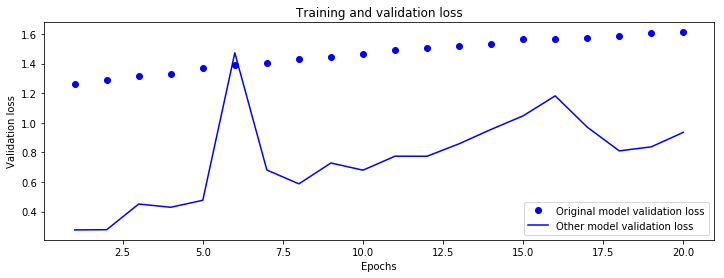

In [17]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model_history = bigger_model.fit(X_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(X_test, y_test))
results = bigger_model.evaluate(X_test, y_test)
print(results)
plot_accuracy_history(original_history, bigger_model_history)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


  512/25000 [..............................] - ETA: 15s - loss: 0.7413 - acc: 0.5078

 1536/25000 [>.............................] - ETA: 6s - loss: 0.7283 - acc: 0.5703 

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.7088 - acc: 0.6125

 3584/25000 [===>..........................] - ETA: 3s - loss: 0.6950 - acc: 0.6289

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.6790 - acc: 0.6560

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6628 - acc: 0.6866

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.6545 - acc: 0.6941

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.6408 - acc: 0.7112

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.6288 - acc: 0.7266

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.6182 - acc: 0.7379

10752/25000 [===========>..................] - ETA: 1s - loss: 0.6078 - acc: 0.7478

11776/25000 [=============>................] - ETA: 1s - loss: 0.5979 - acc: 0.7571

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5878 - acc: 0.7663

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5789 - acc: 0.7730

14848/25000 [================>.............] - ETA: 0s - loss: 0.5714 - acc: 0.7779

15872/25000 [==================>...........] - ETA: 0s - loss: 0.5648 - acc: 0.7830

16896/25000 [===================>..........] - ETA: 0s - loss: 0.5571 - acc: 0.7894

17920/25000 [====================>.........] - ETA: 0s - loss: 0.5486 - acc: 0.7944

18944/25000 [=====================>........] - ETA: 0s - loss: 0.5414 - acc: 0.7989

19968/25000 [======================>.......] - ETA: 0s - loss: 0.5362 - acc: 0.8016

20992/25000 [========================>.....] - ETA: 0s - loss: 0.5304 - acc: 0.8045

22016/25000 [=========================>....] - ETA: 0s - loss: 0.5241 - acc: 0.8082

23040/25000 [==========================>...] - ETA: 0s - loss: 0.5186 - acc: 0.8111

24064/25000 [===========================>..] - ETA: 0s - loss: 0.5138 - acc: 0.8137

25000/25000 [==============================] - 4s 142us/step - loss: 0.5089 - acc: 0.8165 - val_loss: 0.3937 - val_acc: 0.8787


Epoch 2/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3657 - acc: 0.8965

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3507 - acc: 0.9010

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3465 - acc: 0.9035

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3519 - acc: 0.8962

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3520 - acc: 0.8976

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3501 - acc: 0.8988

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3478 - acc: 0.9002

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3443 - acc: 0.9027

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3423 - acc: 0.9026

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3415 - acc: 0.9015

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3392 - acc: 0.9027

11776/25000 [=============>................] - ETA: 0s - loss: 0.3390 - acc: 0.9023

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3387 - acc: 0.9026

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3371 - acc: 0.9022

14848/25000 [================>.............] - ETA: 0s - loss: 0.3366 - acc: 0.9017

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3351 - acc: 0.9025

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3337 - acc: 0.9024

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3323 - acc: 0.9025

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3305 - acc: 0.9027

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3294 - acc: 0.9031

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3287 - acc: 0.9027

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3273 - acc: 0.9030

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3268 - acc: 0.9028

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3260 - acc: 0.9029

25000/25000 [==============================] - 3s 129us/step - loss: 0.3254 - acc: 0.9030 - val_loss: 0.3366 - val_acc: 0.8902


Epoch 3/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2643 - acc: 0.9297

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2593 - acc: 0.9284

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2597 - acc: 0.9305

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2633 - acc: 0.9277

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2632 - acc: 0.9308

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2619 - acc: 0.9313

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2608 - acc: 0.9321

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2666 - acc: 0.9285

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2657 - acc: 0.9284

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2652 - acc: 0.9290

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2667 - acc: 0.9281

11776/25000 [=============>................] - ETA: 0s - loss: 0.2653 - acc: 0.9286

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2632 - acc: 0.9291

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2641 - acc: 0.9281

14848/25000 [================>.............] - ETA: 0s - loss: 0.2662 - acc: 0.9265

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2674 - acc: 0.9258

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2694 - acc: 0.9241

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2734 - acc: 0.9224

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2729 - acc: 0.9220

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2728 - acc: 0.9216

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2730 - acc: 0.9215

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2728 - acc: 0.9216

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2719 - acc: 0.9219

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2732 - acc: 0.9209

25000/25000 [==============================] - 3s 126us/step - loss: 0.2755 - acc: 0.9196 - val_loss: 0.3290 - val_acc: 0.8896


Epoch 4/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2300 - acc: 0.9434

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2332 - acc: 0.9434

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2330 - acc: 0.9414

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2353 - acc: 0.9397

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2363 - acc: 0.9386

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2376 - acc: 0.9389

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2398 - acc: 0.9351

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2409 - acc: 0.9340

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2460 - acc: 0.9320

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2487 - acc: 0.9309

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2486 - acc: 0.9316

11776/25000 [=============>................] - ETA: 0s - loss: 0.2488 - acc: 0.9319

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2488 - acc: 0.9317

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2503 - acc: 0.9303

14848/25000 [================>.............] - ETA: 0s - loss: 0.2498 - acc: 0.9304

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2504 - acc: 0.9298

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2513 - acc: 0.9295

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2516 - acc: 0.9299

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2518 - acc: 0.9299

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2524 - acc: 0.9294

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2535 - acc: 0.9292

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2531 - acc: 0.9291

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2525 - acc: 0.9290

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2515 - acc: 0.9291

25000/25000 [==============================] - 3s 129us/step - loss: 0.2523 - acc: 0.9285 - val_loss: 0.3444 - val_acc: 0.8802


Epoch 5/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2062 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2134 - acc: 0.9486

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2212 - acc: 0.9441

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2295 - acc: 0.9369

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2265 - acc: 0.9377

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2281 - acc: 0.9361

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2319 - acc: 0.9343

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2312 - acc: 0.9341

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2297 - acc: 0.9345

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2297 - acc: 0.9338

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2325 - acc: 0.9326

11776/25000 [=============>................] - ETA: 0s - loss: 0.2316 - acc: 0.9337

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2339 - acc: 0.9334

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2337 - acc: 0.9334

14848/25000 [================>.............] - ETA: 0s - loss: 0.2340 - acc: 0.9337

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2331 - acc: 0.9347

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2341 - acc: 0.9345

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2350 - acc: 0.9338

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2365 - acc: 0.9333

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2365 - acc: 0.9332

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2368 - acc: 0.9332

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2383 - acc: 0.9328

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2387 - acc: 0.9327

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2388 - acc: 0.9327

25000/25000 [==============================] - 3s 132us/step - loss: 0.2393 - acc: 0.9324 - val_loss: 0.3398 - val_acc: 0.8842


Epoch 6/20
  512/25000 [..............................] - ETA: 2s - loss: 0.1865 - acc: 0.9668

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2086 - acc: 0.9518

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2070 - acc: 0.9547

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2170 - acc: 0.9520

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2133 - acc: 0.9520

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2145 - acc: 0.9505

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2162 - acc: 0.9483

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2178 - acc: 0.9469

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2188 - acc: 0.9460

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2200 - acc: 0.9449

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2215 - acc: 0.9445

11776/25000 [=============>................] - ETA: 1s - loss: 0.2201 - acc: 0.9451

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2216 - acc: 0.9442

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2216 - acc: 0.9439

14848/25000 [================>.............] - ETA: 0s - loss: 0.2219 - acc: 0.9434

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2253 - acc: 0.9418

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2276 - acc: 0.9403

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2276 - acc: 0.9401

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2290 - acc: 0.9391

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2304 - acc: 0.9385

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2309 - acc: 0.9380

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2310 - acc: 0.9381

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2312 - acc: 0.9376

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2319 - acc: 0.9371

25000/25000 [==============================] - 3s 132us/step - loss: 0.2316 - acc: 0.9372 - val_loss: 0.3453 - val_acc: 0.8818


Epoch 7/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1894 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2042 - acc: 0.9499

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2057 - acc: 0.9457

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2066 - acc: 0.9473

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2060 - acc: 0.9479

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2083 - acc: 0.9485

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2126 - acc: 0.9452

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2114 - acc: 0.9451

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2117 - acc: 0.9444

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2145 - acc: 0.9438

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2146 - acc: 0.9436

11776/25000 [=============>................] - ETA: 1s - loss: 0.2142 - acc: 0.9439

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2151 - acc: 0.9434

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2162 - acc: 0.9421

14848/25000 [================>.............] - ETA: 0s - loss: 0.2166 - acc: 0.9414

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2173 - acc: 0.9405

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2173 - acc: 0.9405

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2186 - acc: 0.9403

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2207 - acc: 0.9392

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2205 - acc: 0.9396

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2216 - acc: 0.9392

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2225 - acc: 0.9388

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2250 - acc: 0.9376

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2258 - acc: 0.9369

25000/25000 [==============================] - 3s 131us/step - loss: 0.2256 - acc: 0.9368 - val_loss: 0.3528 - val_acc: 0.8802


Epoch 8/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1936 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1916 - acc: 0.9590

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1871 - acc: 0.9605

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1943 - acc: 0.9584

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1986 - acc: 0.9525

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2034 - acc: 0.9505

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2017 - acc: 0.9522

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1998 - acc: 0.9533

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2013 - acc: 0.9522

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2020 - acc: 0.9516

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2036 - acc: 0.9501

11776/25000 [=============>................] - ETA: 1s - loss: 0.2070 - acc: 0.9479

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2081 - acc: 0.9473

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2071 - acc: 0.9474

14848/25000 [================>.............] - ETA: 0s - loss: 0.2079 - acc: 0.9474

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2093 - acc: 0.9465

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2098 - acc: 0.9466

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2102 - acc: 0.9460

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2101 - acc: 0.9457

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2121 - acc: 0.9443

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2140 - acc: 0.9432

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2142 - acc: 0.9431

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2148 - acc: 0.9427

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2154 - acc: 0.9423

24576/25000 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9422

25000/25000 [==============================] - 3s 136us/step - loss: 0.2159 - acc: 0.9421 - val_loss: 0.3620 - val_acc: 0.8775


Epoch 9/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2102 - acc: 0.9531

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2086 - acc: 0.9466

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2098 - acc: 0.9480

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2028 - acc: 0.9492

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1971 - acc: 0.9531

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1968 - acc: 0.9535

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1979 - acc: 0.9519

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1983 - acc: 0.9516

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2037 - acc: 0.9486

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2070 - acc: 0.9466

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2071 - acc: 0.9454

11776/25000 [=============>................] - ETA: 0s - loss: 0.2076 - acc: 0.9449

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2090 - acc: 0.9448

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2080 - acc: 0.9458

14848/25000 [================>.............] - ETA: 0s - loss: 0.2064 - acc: 0.9465

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2063 - acc: 0.9463

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2060 - acc: 0.9463

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2068 - acc: 0.9459

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2074 - acc: 0.9459

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2082 - acc: 0.9452

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2108 - acc: 0.9433

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2121 - acc: 0.9428

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2123 - acc: 0.9428

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2128 - acc: 0.9428

25000/25000 [==============================] - 3s 128us/step - loss: 0.2145 - acc: 0.9420 - val_loss: 0.4104 - val_acc: 0.8659


Epoch 10/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2068 - acc: 0.9395

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1925 - acc: 0.9486

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1922 - acc: 0.9523

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1901 - acc: 0.9554

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1925 - acc: 0.9553

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1892 - acc: 0.9565

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1874 - acc: 0.9576

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1923 - acc: 0.9548

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1978 - acc: 0.9521

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1970 - acc: 0.9519

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1983 - acc: 0.9507

11776/25000 [=============>................] - ETA: 1s - loss: 0.1974 - acc: 0.9513

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1977 - acc: 0.9509

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1981 - acc: 0.9512

14848/25000 [================>.............] - ETA: 0s - loss: 0.1994 - acc: 0.9502

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2025 - acc: 0.9487

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2066 - acc: 0.9467

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2076 - acc: 0.9462

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2076 - acc: 0.9464

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2084 - acc: 0.9459

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2092 - acc: 0.9456

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2093 - acc: 0.9451

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2098 - acc: 0.9447

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2096 - acc: 0.9451

25000/25000 [==============================] - 3s 136us/step - loss: 0.2103 - acc: 0.9447 - val_loss: 0.3994 - val_acc: 0.8682


Epoch 11/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1933 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1883 - acc: 0.9570

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1848 - acc: 0.9551

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1824 - acc: 0.9573

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1829 - acc: 0.9577

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1866 - acc: 0.9576

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1868 - acc: 0.9572

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1866 - acc: 0.9568

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1899 - acc: 0.9543

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1896 - acc: 0.9538

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1901 - acc: 0.9533

11776/25000 [=============>................] - ETA: 1s - loss: 0.1911 - acc: 0.9524

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1925 - acc: 0.9516

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1959 - acc: 0.9497

14848/25000 [================>.............] - ETA: 0s - loss: 0.2009 - acc: 0.9468

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2007 - acc: 0.9466

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2017 - acc: 0.9463

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2025 - acc: 0.9461

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2019 - acc: 0.9469

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2029 - acc: 0.9465

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2039 - acc: 0.9456

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2042 - acc: 0.9455

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2050 - acc: 0.9451

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2057 - acc: 0.9448

25000/25000 [==============================] - 3s 131us/step - loss: 0.2070 - acc: 0.9442 - val_loss: 0.3935 - val_acc: 0.8698


Epoch 12/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1855 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1991 - acc: 0.9492

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1903 - acc: 0.9527

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1860 - acc: 0.9559

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1857 - acc: 0.9555

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1863 - acc: 0.9572

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1861 - acc: 0.9587

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1856 - acc: 0.9585

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1861 - acc: 0.9583

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1945 - acc: 0.9541

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1963 - acc: 0.9537

11776/25000 [=============>................] - ETA: 0s - loss: 0.1963 - acc: 0.9537

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1967 - acc: 0.9529

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1961 - acc: 0.9526

14848/25000 [================>.............] - ETA: 0s - loss: 0.1967 - acc: 0.9520

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1978 - acc: 0.9517

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1967 - acc: 0.9521

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1982 - acc: 0.9512

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2027 - acc: 0.9483

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2057 - acc: 0.9466

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2069 - acc: 0.9456

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2061 - acc: 0.9460

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2059 - acc: 0.9461

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2058 - acc: 0.9461

25000/25000 [==============================] - 3s 130us/step - loss: 0.2053 - acc: 0.9460 - val_loss: 0.3877 - val_acc: 0.8738


Epoch 13/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1713 - acc: 0.9668

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1790 - acc: 0.9551

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1840 - acc: 0.9574

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1915 - acc: 0.9512

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1886 - acc: 0.9536

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1884 - acc: 0.9544

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1910 - acc: 0.9537

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1957 - acc: 0.9516

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1949 - acc: 0.9516

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1956 - acc: 0.9503

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1956 - acc: 0.9493

11776/25000 [=============>................] - ETA: 1s - loss: 0.1943 - acc: 0.9501

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1938 - acc: 0.9508

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1935 - acc: 0.9504

14848/25000 [================>.............] - ETA: 0s - loss: 0.1950 - acc: 0.9500

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1952 - acc: 0.9499

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1941 - acc: 0.9500

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1944 - acc: 0.9501

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1952 - acc: 0.9500

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1962 - acc: 0.9493

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1974 - acc: 0.9485

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1981 - acc: 0.9480

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1973 - acc: 0.9483

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1985 - acc: 0.9480

25000/25000 [==============================] - 3s 133us/step - loss: 0.2002 - acc: 0.9472 - val_loss: 0.3921 - val_acc: 0.8724


Epoch 14/20
  512/25000 [..............................] - ETA: 2s - loss: 0.1939 - acc: 0.9785

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1797 - acc: 0.9707

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1853 - acc: 0.9617

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1889 - acc: 0.9581

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1925 - acc: 0.9557

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1899 - acc: 0.9558

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1879 - acc: 0.9557

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1882 - acc: 0.9559

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1870 - acc: 0.9559

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1876 - acc: 0.9552

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1903 - acc: 0.9538

11776/25000 [=============>................] - ETA: 1s - loss: 0.1908 - acc: 0.9535

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1892 - acc: 0.9545

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1912 - acc: 0.9536

14848/25000 [================>.............] - ETA: 0s - loss: 0.1934 - acc: 0.9518

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1954 - acc: 0.9507

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1952 - acc: 0.9507

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1956 - acc: 0.9504

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1966 - acc: 0.9500

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1965 - acc: 0.9497

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1961 - acc: 0.9496

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1959 - acc: 0.9498

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1956 - acc: 0.9500

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1964 - acc: 0.9499

25000/25000 [==============================] - 3s 134us/step - loss: 0.1987 - acc: 0.9487 - val_loss: 0.4781 - val_acc: 0.8539


Epoch 15/20
  512/25000 [..............................] - ETA: 2s - loss: 0.2476 - acc: 0.9160

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1966 - acc: 0.9473

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1839 - acc: 0.9547

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1826 - acc: 0.9562

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1803 - acc: 0.9575

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1756 - acc: 0.9602

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1759 - acc: 0.9597

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1757 - acc: 0.9600

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1751 - acc: 0.9600

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1769 - acc: 0.9583

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1826 - acc: 0.9550

11776/25000 [=============>................] - ETA: 1s - loss: 0.1867 - acc: 0.9533

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1858 - acc: 0.9538

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1872 - acc: 0.9532

14848/25000 [================>.............] - ETA: 0s - loss: 0.1874 - acc: 0.9533

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1872 - acc: 0.9534

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1877 - acc: 0.9529

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1884 - acc: 0.9527

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1906 - acc: 0.9518

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1912 - acc: 0.9515

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1914 - acc: 0.9513

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1922 - acc: 0.9505

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1930 - acc: 0.9500

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1933 - acc: 0.9499

25000/25000 [==============================] - 3s 131us/step - loss: 0.1953 - acc: 0.9488 - val_loss: 0.4380 - val_acc: 0.8639


Epoch 16/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1831 - acc: 0.9492

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1726 - acc: 0.9648

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1663 - acc: 0.9664

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1652 - acc: 0.9679

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1681 - acc: 0.9670

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1674 - acc: 0.9663

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1663 - acc: 0.9665

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1688 - acc: 0.9654

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1725 - acc: 0.9630

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1810 - acc: 0.9582

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1850 - acc: 0.9553

11776/25000 [=============>................] - ETA: 1s - loss: 0.1838 - acc: 0.9563

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1820 - acc: 0.9572

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1809 - acc: 0.9578

14848/25000 [================>.............] - ETA: 0s - loss: 0.1820 - acc: 0.9568

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1841 - acc: 0.9553

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1858 - acc: 0.9547

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1876 - acc: 0.9536

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1877 - acc: 0.9535

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1874 - acc: 0.9540

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1883 - acc: 0.9534

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1913 - acc: 0.9518

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1937 - acc: 0.9505

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1943 - acc: 0.9502

25000/25000 [==============================] - 3s 130us/step - loss: 0.1943 - acc: 0.9500 - val_loss: 0.4124 - val_acc: 0.8664


Epoch 17/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1357 - acc: 0.9805

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1548 - acc: 0.9733

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1604 - acc: 0.9695

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1629 - acc: 0.9679

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1625 - acc: 0.9679

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1621 - acc: 0.9675

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1732 - acc: 0.9608

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1769 - acc: 0.9592

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1788 - acc: 0.9580

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1819 - acc: 0.9561

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1823 - acc: 0.9553

11776/25000 [=============>................] - ETA: 1s - loss: 0.1841 - acc: 0.9547

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1839 - acc: 0.9550

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1846 - acc: 0.9545

14848/25000 [================>.............] - ETA: 0s - loss: 0.1847 - acc: 0.9541

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1846 - acc: 0.9542

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1846 - acc: 0.9541

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1858 - acc: 0.9531

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1867 - acc: 0.9526

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1873 - acc: 0.9528

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1875 - acc: 0.9527

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1879 - acc: 0.9525

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1899 - acc: 0.9515

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1933 - acc: 0.9495

25000/25000 [==============================] - 3s 133us/step - loss: 0.1933 - acc: 0.9493 - val_loss: 0.4038 - val_acc: 0.8720


Epoch 18/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1770 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1627 - acc: 0.9694

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1567 - acc: 0.9723

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1585 - acc: 0.9704

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1602 - acc: 0.9681

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1625 - acc: 0.9677

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1632 - acc: 0.9666

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1663 - acc: 0.9646

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1742 - acc: 0.9592

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1793 - acc: 0.9559

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1802 - acc: 0.9553

11776/25000 [=============>................] - ETA: 0s - loss: 0.1802 - acc: 0.9549

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1788 - acc: 0.9559

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1805 - acc: 0.9549

14848/25000 [================>.............] - ETA: 0s - loss: 0.1817 - acc: 0.9541

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1839 - acc: 0.9534

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1838 - acc: 0.9532

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1837 - acc: 0.9532

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1841 - acc: 0.9529

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1846 - acc: 0.9528

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1855 - acc: 0.9526

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1852 - acc: 0.9529

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1857 - acc: 0.9526

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1865 - acc: 0.9523

25000/25000 [==============================] - 3s 122us/step - loss: 0.1899 - acc: 0.9505 - val_loss: 0.4162 - val_acc: 0.8683


Epoch 19/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1815 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1595 - acc: 0.9720

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1595 - acc: 0.9711

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1592 - acc: 0.9699

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1609 - acc: 0.9688

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1625 - acc: 0.9684

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1611 - acc: 0.9681

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1635 - acc: 0.9672

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1637 - acc: 0.9671

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1655 - acc: 0.9664

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1693 - acc: 0.9643

11776/25000 [=============>................] - ETA: 0s - loss: 0.1725 - acc: 0.9623

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1756 - acc: 0.9602

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1746 - acc: 0.9608

14848/25000 [================>.............] - ETA: 0s - loss: 0.1741 - acc: 0.9601

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1753 - acc: 0.9592

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1768 - acc: 0.9583

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1772 - acc: 0.9580

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1769 - acc: 0.9582

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1775 - acc: 0.9582

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1809 - acc: 0.9565

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1815 - acc: 0.9560

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1811 - acc: 0.9559

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1815 - acc: 0.9557

25000/25000 [==============================] - 3s 128us/step - loss: 0.1817 - acc: 0.9557 - val_loss: 0.4130 - val_acc: 0.8693


Epoch 20/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1596 - acc: 0.9668

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1545 - acc: 0.9701

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1704 - acc: 0.9594

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1923 - acc: 0.9445

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1907 - acc: 0.9453

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1833 - acc: 0.9503

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1799 - acc: 0.9531

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1804 - acc: 0.9533

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1809 - acc: 0.9523

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1802 - acc: 0.9527

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1792 - acc: 0.9540

11776/25000 [=============>................] - ETA: 1s - loss: 0.1808 - acc: 0.9538

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1802 - acc: 0.9541

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1825 - acc: 0.9523

14848/25000 [================>.............] - ETA: 0s - loss: 0.1842 - acc: 0.9515

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1851 - acc: 0.9507

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1846 - acc: 0.9511

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1837 - acc: 0.9515

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1828 - acc: 0.9521

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1843 - acc: 0.9514

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1857 - acc: 0.9509

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1866 - acc: 0.9504

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1864 - acc: 0.9504

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1867 - acc: 0.9505

25000/25000 [==============================] - 3s 131us/step - loss: 0.1861 - acc: 0.9511 - val_loss: 0.4163 - val_acc: 0.8696


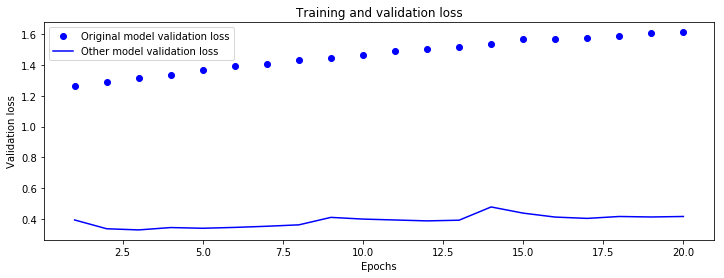

In [24]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


l2_model_history = l2_model.fit(X_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(X_test, y_test))

plot_accuracy_history(original_history, l2_model_history)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


  512/25000 [..............................] - ETA: 19s - loss: 0.6917 - acc: 0.5195

 1536/25000 [>.............................] - ETA: 7s - loss: 0.6830 - acc: 0.5534 

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.6787 - acc: 0.5590

 3584/25000 [===>..........................] - ETA: 3s - loss: 0.6757 - acc: 0.5698

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.6717 - acc: 0.5805

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6690 - acc: 0.5902

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.6663 - acc: 0.6004

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.6642 - acc: 0.6108

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.6615 - acc: 0.6152

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.6584 - acc: 0.6213

10752/25000 [===========>..................] - ETA: 1s - loss: 0.6549 - acc: 0.6281

11776/25000 [=============>................] - ETA: 1s - loss: 0.6508 - acc: 0.6323

12800/25000 [==============>...............] - ETA: 1s - loss: 0.6479 - acc: 0.6380

13824/25000 [===============>..............] - ETA: 1s - loss: 0.6447 - acc: 0.6441

14848/25000 [================>.............] - ETA: 1s - loss: 0.6413 - acc: 0.6507

15872/25000 [==================>...........] - ETA: 0s - loss: 0.6379 - acc: 0.6558

16896/25000 [===================>..........] - ETA: 0s - loss: 0.6343 - acc: 0.6615

17920/25000 [====================>.........] - ETA: 0s - loss: 0.6313 - acc: 0.6654

18944/25000 [=====================>........] - ETA: 0s - loss: 0.6284 - acc: 0.6698

19968/25000 [======================>.......] - ETA: 0s - loss: 0.6248 - acc: 0.6745

20992/25000 [========================>.....] - ETA: 0s - loss: 0.6217 - acc: 0.6779

22016/25000 [=========================>....] - ETA: 0s - loss: 0.6184 - acc: 0.6816

23040/25000 [==========================>...] - ETA: 0s - loss: 0.6155 - acc: 0.6849

24064/25000 [===========================>..] - ETA: 0s - loss: 0.6128 - acc: 0.6875

25000/25000 [==============================] - 4s 145us/step - loss: 0.6100 - acc: 0.6907 - val_loss: 0.4914 - val_acc: 0.8300


Epoch 2/20
  512/25000 [..............................] - ETA: 1s - loss: 0.5370 - acc: 0.7598

 1536/25000 [>.............................] - ETA: 1s - loss: 0.5283 - acc: 0.7650

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.5181 - acc: 0.7738

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.5166 - acc: 0.7746

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.5144 - acc: 0.7791

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.5097 - acc: 0.7839

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.5040 - acc: 0.7895

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.5021 - acc: 0.7910

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4969 - acc: 0.7957

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.4940 - acc: 0.7978

10752/25000 [===========>..................] - ETA: 1s - loss: 0.4915 - acc: 0.7993

11776/25000 [=============>................] - ETA: 1s - loss: 0.4886 - acc: 0.8001

12800/25000 [==============>...............] - ETA: 0s - loss: 0.4866 - acc: 0.8016

13824/25000 [===============>..............] - ETA: 0s - loss: 0.4848 - acc: 0.8022

14848/25000 [================>.............] - ETA: 0s - loss: 0.4816 - acc: 0.8043

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4795 - acc: 0.8041

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4770 - acc: 0.8053

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4752 - acc: 0.8072

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4722 - acc: 0.8089

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4708 - acc: 0.8099

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4692 - acc: 0.8110

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4675 - acc: 0.8122

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4661 - acc: 0.8128

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4647 - acc: 0.8142

25000/25000 [==============================] - 3s 132us/step - loss: 0.4630 - acc: 0.8156 - val_loss: 0.3765 - val_acc: 0.8747


Epoch 3/20
  512/25000 [..............................] - ETA: 1s - loss: 0.4011 - acc: 0.8438

 1536/25000 [>.............................] - ETA: 1s - loss: 0.4019 - acc: 0.8594

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3957 - acc: 0.8652

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3940 - acc: 0.8608

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3893 - acc: 0.8615

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3930 - acc: 0.8562

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3905 - acc: 0.8589

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3900 - acc: 0.8568

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3878 - acc: 0.8591

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3883 - acc: 0.8596

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3864 - acc: 0.8608

11776/25000 [=============>................] - ETA: 0s - loss: 0.3852 - acc: 0.8596

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3837 - acc: 0.8608

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3831 - acc: 0.8610

14848/25000 [================>.............] - ETA: 0s - loss: 0.3819 - acc: 0.8621

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3793 - acc: 0.8635

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3762 - acc: 0.8652

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3769 - acc: 0.8641

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3775 - acc: 0.8640

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3749 - acc: 0.8646

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3740 - acc: 0.8647

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3731 - acc: 0.8650

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3723 - acc: 0.8648

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3718 - acc: 0.8654

25000/25000 [==============================] - 3s 130us/step - loss: 0.3702 - acc: 0.8662 - val_loss: 0.3199 - val_acc: 0.8827


Epoch 4/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3298 - acc: 0.8633

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3385 - acc: 0.8763

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3280 - acc: 0.8898

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3214 - acc: 0.8873

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3216 - acc: 0.8887

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3213 - acc: 0.8892

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3176 - acc: 0.8921

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3183 - acc: 0.8913

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3198 - acc: 0.8894

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3185 - acc: 0.8906

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3198 - acc: 0.8904

11776/25000 [=============>................] - ETA: 0s - loss: 0.3187 - acc: 0.8916

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3160 - acc: 0.8923

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3160 - acc: 0.8926

14848/25000 [================>.............] - ETA: 0s - loss: 0.3147 - acc: 0.8926

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3169 - acc: 0.8919

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3166 - acc: 0.8925

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3166 - acc: 0.8929

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3155 - acc: 0.8932

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3139 - acc: 0.8936

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3137 - acc: 0.8936

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3132 - acc: 0.8934

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3124 - acc: 0.8937

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3112 - acc: 0.8935

25000/25000 [==============================] - 3s 130us/step - loss: 0.3106 - acc: 0.8938 - val_loss: 0.3003 - val_acc: 0.8765


Epoch 5/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2687 - acc: 0.9023

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2950 - acc: 0.8945

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2992 - acc: 0.8945

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2973 - acc: 0.8965

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2893 - acc: 0.9013

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2853 - acc: 0.9036

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2870 - acc: 0.9029

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2836 - acc: 0.9048

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2795 - acc: 0.9061

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2758 - acc: 0.9068

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2765 - acc: 0.9065

11776/25000 [=============>................] - ETA: 0s - loss: 0.2741 - acc: 0.9077

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2745 - acc: 0.9075

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2726 - acc: 0.9081

14848/25000 [================>.............] - ETA: 0s - loss: 0.2714 - acc: 0.9087

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2704 - acc: 0.9088

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2697 - acc: 0.9090

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2697 - acc: 0.9090

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2686 - acc: 0.9096

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2705 - acc: 0.9086

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2690 - acc: 0.9090

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2680 - acc: 0.9093

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2675 - acc: 0.9097

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2666 - acc: 0.9101

25000/25000 [==============================] - 3s 138us/step - loss: 0.2661 - acc: 0.9100 - val_loss: 0.2959 - val_acc: 0.8862


Epoch 6/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2387 - acc: 0.9238

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2236 - acc: 0.9316



 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2247 - acc: 0.9301

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2239 - acc: 0.9330

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2228 - acc: 0.9321

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2279 - acc: 0.9276

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2287 - acc: 0.9279

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2288 - acc: 0.9270

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2288 - acc: 0.9270

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2281 - acc: 0.9278

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2298 - acc: 0.9264

11776/25000 [=============>................] - ETA: 1s - loss: 0.2307 - acc: 0.9268

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2328 - acc: 0.9266

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2338 - acc: 0.9253

14848/25000 [================>.............] - ETA: 0s - loss: 0.2347 - acc: 0.9246

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2355 - acc: 0.9243

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2358 - acc: 0.9243

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2364 - acc: 0.9240

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2372 - acc: 0.9240

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2372 - acc: 0.9229

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2376 - acc: 0.9220

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2375 - acc: 0.9223

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2372 - acc: 0.9222

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2362 - acc: 0.9224

25000/25000 [==============================] - 3s 130us/step - loss: 0.2358 - acc: 0.9227 - val_loss: 0.2885 - val_acc: 0.8880


Epoch 7/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1879 - acc: 0.9434

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1956 - acc: 0.9395

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1890 - acc: 0.9402

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1970 - acc: 0.9369

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1969 - acc: 0.9373

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2029 - acc: 0.9357

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2037 - acc: 0.9351

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2044 - acc: 0.9342

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2078 - acc: 0.9326

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2083 - acc: 0.9330

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2067 - acc: 0.9325

11776/25000 [=============>................] - ETA: 1s - loss: 0.2079 - acc: 0.9333

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2110 - acc: 0.9324

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2096 - acc: 0.9331

14848/25000 [================>.............] - ETA: 0s - loss: 0.2116 - acc: 0.9322

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2114 - acc: 0.9325

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2118 - acc: 0.9324

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2112 - acc: 0.9324

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2099 - acc: 0.9327

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2106 - acc: 0.9321

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2094 - acc: 0.9325

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2096 - acc: 0.9323

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2111 - acc: 0.9313

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2116 - acc: 0.9306

25000/25000 [==============================] - 3s 130us/step - loss: 0.2107 - acc: 0.9307 - val_loss: 0.3048 - val_acc: 0.8856


Epoch 8/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1802 - acc: 0.9531

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1955 - acc: 0.9434

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1831 - acc: 0.9441

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1812 - acc: 0.9436

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1811 - acc: 0.9457

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1785 - acc: 0.9458

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1834 - acc: 0.9434

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1842 - acc: 0.9415

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1854 - acc: 0.9408

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1869 - acc: 0.9400

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1885 - acc: 0.9401

11776/25000 [=============>................] - ETA: 0s - loss: 0.1872 - acc: 0.9405

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1871 - acc: 0.9400

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1871 - acc: 0.9399

14848/25000 [================>.............] - ETA: 0s - loss: 0.1856 - acc: 0.9405

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1841 - acc: 0.9408

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1851 - acc: 0.9401

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1848 - acc: 0.9401

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1849 - acc: 0.9402

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1861 - acc: 0.9394

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1860 - acc: 0.9393

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1872 - acc: 0.9390

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1865 - acc: 0.9388

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1862 - acc: 0.9390

25000/25000 [==============================] - 3s 132us/step - loss: 0.1860 - acc: 0.9394 - val_loss: 0.3222 - val_acc: 0.8841


Epoch 9/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1775 - acc: 0.9453

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1810 - acc: 0.9408

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1836 - acc: 0.9379

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1755 - acc: 0.9422

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1729 - acc: 0.9434

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1740 - acc: 0.9428

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1724 - acc: 0.9435

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1741 - acc: 0.9436

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1720 - acc: 0.9449

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1734 - acc: 0.9447

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1782 - acc: 0.9430

11776/25000 [=============>................] - ETA: 1s - loss: 0.1811 - acc: 0.9428

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1807 - acc: 0.9427

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1793 - acc: 0.9439

14848/25000 [================>.............] - ETA: 0s - loss: 0.1792 - acc: 0.9442

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1773 - acc: 0.9444

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1772 - acc: 0.9441

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1763 - acc: 0.9444

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1763 - acc: 0.9437

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1753 - acc: 0.9437

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1761 - acc: 0.9431

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1764 - acc: 0.9431

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1770 - acc: 0.9428

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1761 - acc: 0.9431

25000/25000 [==============================] - 3s 132us/step - loss: 0.1766 - acc: 0.9430 - val_loss: 0.3450 - val_acc: 0.8833


Epoch 10/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2051 - acc: 0.9316

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1684 - acc: 0.9499

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1639 - acc: 0.9465

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1605 - acc: 0.9484

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1613 - acc: 0.9455

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1601 - acc: 0.9444

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1588 - acc: 0.9456

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1596 - acc: 0.9456

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1587 - acc: 0.9470

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1581 - acc: 0.9472

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1572 - acc: 0.9477

11776/25000 [=============>................] - ETA: 0s - loss: 0.1578 - acc: 0.9477

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1589 - acc: 0.9482

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1587 - acc: 0.9479

14848/25000 [================>.............] - ETA: 0s - loss: 0.1596 - acc: 0.9473

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1595 - acc: 0.9476

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1613 - acc: 0.9476

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1619 - acc: 0.9474

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1622 - acc: 0.9472

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1623 - acc: 0.9470

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1628 - acc: 0.9472

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1630 - acc: 0.9467

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1643 - acc: 0.9466

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1647 - acc: 0.9466

25000/25000 [==============================] - 3s 124us/step - loss: 0.1639 - acc: 0.9470 - val_loss: 0.3725 - val_acc: 0.8811


Epoch 11/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1499 - acc: 0.9453

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1521 - acc: 0.9434

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1575 - acc: 0.9477

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1506 - acc: 0.9501

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1489 - acc: 0.9492

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1454 - acc: 0.9513

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1455 - acc: 0.9512

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1456 - acc: 0.9505

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1448 - acc: 0.9506

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1443 - acc: 0.9508

10752/25000 [===========>..................] - ETA: 0s - loss: 0.1461 - acc: 0.9501

11776/25000 [=============>................] - ETA: 0s - loss: 0.1468 - acc: 0.9502

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1457 - acc: 0.9505

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1472 - acc: 0.9505

14848/25000 [================>.............] - ETA: 0s - loss: 0.1468 - acc: 0.9512

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1477 - acc: 0.9510

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1478 - acc: 0.9513

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1484 - acc: 0.9507

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1488 - acc: 0.9503

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1491 - acc: 0.9505

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1476 - acc: 0.9508

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1494 - acc: 0.9505

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1491 - acc: 0.9503

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1482 - acc: 0.9508

25000/25000 [==============================] - 3s 127us/step - loss: 0.1495 - acc: 0.9503 - val_loss: 0.3848 - val_acc: 0.8785


Epoch 12/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1337 - acc: 0.9570

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1342 - acc: 0.9590

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1253 - acc: 0.9609

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1307 - acc: 0.9593

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1317 - acc: 0.9570

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1343 - acc: 0.9563

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1341 - acc: 0.9563

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1328 - acc: 0.9563

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1324 - acc: 0.9565

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1341 - acc: 0.9562

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1328 - acc: 0.9560

11776/25000 [=============>................] - ETA: 1s - loss: 0.1347 - acc: 0.9557

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1333 - acc: 0.9561

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1319 - acc: 0.9565

14848/25000 [================>.............] - ETA: 0s - loss: 0.1342 - acc: 0.9559

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1342 - acc: 0.9557

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1356 - acc: 0.9549

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1354 - acc: 0.9551

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1372 - acc: 0.9552

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1373 - acc: 0.9552

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1373 - acc: 0.9551

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1366 - acc: 0.9551

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1370 - acc: 0.9546

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1379 - acc: 0.9545

25000/25000 [==============================] - 3s 130us/step - loss: 0.1385 - acc: 0.9544 - val_loss: 0.4211 - val_acc: 0.8785


Epoch 13/20
  512/25000 [..............................] - ETA: 2s - loss: 0.1147 - acc: 0.9590

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1024 - acc: 0.9701

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1054 - acc: 0.9680

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1173 - acc: 0.9651

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1224 - acc: 0.9638

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1208 - acc: 0.9638

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1218 - acc: 0.9638

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1265 - acc: 0.9630

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1287 - acc: 0.9624

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1277 - acc: 0.9624

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1274 - acc: 0.9621

11776/25000 [=============>................] - ETA: 0s - loss: 0.1257 - acc: 0.9626

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1248 - acc: 0.9623

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1273 - acc: 0.9612

14848/25000 [================>.............] - ETA: 0s - loss: 0.1275 - acc: 0.9603

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1257 - acc: 0.9607

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1269 - acc: 0.9605

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1281 - acc: 0.9599

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1283 - acc: 0.9599

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1286 - acc: 0.9598

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1289 - acc: 0.9595

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1302 - acc: 0.9590

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1312 - acc: 0.9591

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1330 - acc: 0.9580

25000/25000 [==============================] - 3s 128us/step - loss: 0.1333 - acc: 0.9580 - val_loss: 0.4345 - val_acc: 0.8785


Epoch 14/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0968 - acc: 0.9746

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1186 - acc: 0.9635

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1196 - acc: 0.9613

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1218 - acc: 0.9612

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1153 - acc: 0.9620

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1148 - acc: 0.9629

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1153 - acc: 0.9633

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1160 - acc: 0.9625

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1205 - acc: 0.9608

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1207 - acc: 0.9604

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1207 - acc: 0.9603

11776/25000 [=============>................] - ETA: 0s - loss: 0.1237 - acc: 0.9597

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1229 - acc: 0.9599

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1231 - acc: 0.9601

14848/25000 [================>.............] - ETA: 0s - loss: 0.1225 - acc: 0.9603

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1245 - acc: 0.9594

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1230 - acc: 0.9600

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1226 - acc: 0.9602

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1237 - acc: 0.9600

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1234 - acc: 0.9597

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1248 - acc: 0.9595

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1260 - acc: 0.9592

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1264 - acc: 0.9587

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1269 - acc: 0.9582

25000/25000 [==============================] - 3s 131us/step - loss: 0.1259 - acc: 0.9587 - val_loss: 0.4515 - val_acc: 0.8757


Epoch 15/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1071 - acc: 0.9609

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1039 - acc: 0.9596

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1190 - acc: 0.9605

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1230 - acc: 0.9612

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1244 - acc: 0.9601

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1250 - acc: 0.9608

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1244 - acc: 0.9611

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1221 - acc: 0.9617

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1202 - acc: 0.9616

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1194 - acc: 0.9613

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1193 - acc: 0.9612

11776/25000 [=============>................] - ETA: 1s - loss: 0.1220 - acc: 0.9604

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1223 - acc: 0.9606

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1235 - acc: 0.9604

14848/25000 [================>.............] - ETA: 0s - loss: 0.1241 - acc: 0.9601

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1251 - acc: 0.9602

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1250 - acc: 0.9603

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1247 - acc: 0.9599

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1238 - acc: 0.9600

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1237 - acc: 0.9599

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1238 - acc: 0.9603

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1226 - acc: 0.9605

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1227 - acc: 0.9607

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1227 - acc: 0.9605

25000/25000 [==============================] - 3s 134us/step - loss: 0.1233 - acc: 0.9602 - val_loss: 0.4542 - val_acc: 0.8759


Epoch 16/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1024 - acc: 0.9648

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1022 - acc: 0.9668

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1061 - acc: 0.9648

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1116 - acc: 0.9648

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1086 - acc: 0.9670

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1109 - acc: 0.9659

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1134 - acc: 0.9647

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1144 - acc: 0.9659

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1144 - acc: 0.9656

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1150 - acc: 0.9650

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1141 - acc: 0.9655

11776/25000 [=============>................] - ETA: 0s - loss: 0.1150 - acc: 0.9653

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1161 - acc: 0.9651

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1164 - acc: 0.9646

14848/25000 [================>.............] - ETA: 0s - loss: 0.1164 - acc: 0.9648

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1147 - acc: 0.9653

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1145 - acc: 0.9654

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1139 - acc: 0.9653

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1156 - acc: 0.9647

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1163 - acc: 0.9646

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1150 - acc: 0.9653

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1150 - acc: 0.9649

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1153 - acc: 0.9643

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1159 - acc: 0.9640

25000/25000 [==============================] - 3s 131us/step - loss: 0.1163 - acc: 0.9638 - val_loss: 0.4825 - val_acc: 0.8705


Epoch 17/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0989 - acc: 0.9648

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1177 - acc: 0.9681

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1117 - acc: 0.9676

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1112 - acc: 0.9679

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1095 - acc: 0.9670

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1125 - acc: 0.9670

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1100 - acc: 0.9672

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1095 - acc: 0.9673

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1124 - acc: 0.9665

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1136 - acc: 0.9656

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1132 - acc: 0.9657

11776/25000 [=============>................] - ETA: 0s - loss: 0.1123 - acc: 0.9655

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1116 - acc: 0.9655

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1114 - acc: 0.9659

14848/25000 [================>.............] - ETA: 0s - loss: 0.1110 - acc: 0.9661

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1114 - acc: 0.9659

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1125 - acc: 0.9654

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1127 - acc: 0.9655

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1129 - acc: 0.9653

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1127 - acc: 0.9653

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1132 - acc: 0.9648

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1129 - acc: 0.9646

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1125 - acc: 0.9647

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1132 - acc: 0.9646

25000/25000 [==============================] - 3s 129us/step - loss: 0.1147 - acc: 0.9642 - val_loss: 0.4889 - val_acc: 0.8695


Epoch 18/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1041 - acc: 0.9688

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1054 - acc: 0.9681

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1010 - acc: 0.9688

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1070 - acc: 0.9674

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1064 - acc: 0.9661

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1061 - acc: 0.9672

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1049 - acc: 0.9677

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1041 - acc: 0.9681

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1071 - acc: 0.9663

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1085 - acc: 0.9664

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1089 - acc: 0.9662

11776/25000 [=============>................] - ETA: 0s - loss: 0.1119 - acc: 0.9655

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1113 - acc: 0.9659

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1091 - acc: 0.9664

14848/25000 [================>.............] - ETA: 0s - loss: 0.1082 - acc: 0.9665

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1089 - acc: 0.9662

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1076 - acc: 0.9667

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1085 - acc: 0.9665

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1085 - acc: 0.9670

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1078 - acc: 0.9670

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1084 - acc: 0.9668

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1082 - acc: 0.9668

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1089 - acc: 0.9664

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1094 - acc: 0.9660

25000/25000 [==============================] - 3s 128us/step - loss: 0.1093 - acc: 0.9656 - val_loss: 0.5262 - val_acc: 0.8683


Epoch 19/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1303 - acc: 0.9531

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1043 - acc: 0.9609

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1002 - acc: 0.9637

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1038 - acc: 0.9621

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1045 - acc: 0.9640

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1069 - acc: 0.9632

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1075 - acc: 0.9627

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1054 - acc: 0.9634

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1044 - acc: 0.9638

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1060 - acc: 0.9637

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1058 - acc: 0.9644

11776/25000 [=============>................] - ETA: 0s - loss: 0.1053 - acc: 0.9645

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1058 - acc: 0.9643

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1059 - acc: 0.9646

14848/25000 [================>.............] - ETA: 0s - loss: 0.1053 - acc: 0.9648

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1041 - acc: 0.9653

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1034 - acc: 0.9653

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1046 - acc: 0.9650

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1040 - acc: 0.9652

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1043 - acc: 0.9652

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1045 - acc: 0.9654

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1051 - acc: 0.9651

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1049 - acc: 0.9652

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1037 - acc: 0.9657

25000/25000 [==============================] - 3s 128us/step - loss: 0.1041 - acc: 0.9653 - val_loss: 0.5691 - val_acc: 0.8757


Epoch 20/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0816 - acc: 0.9766

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1074 - acc: 0.9655

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1059 - acc: 0.9668

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1034 - acc: 0.9665

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1031 - acc: 0.9672

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1105 - acc: 0.9656

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1061 - acc: 0.9680

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1019 - acc: 0.9694

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1002 - acc: 0.9696

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0993 - acc: 0.9693

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1003 - acc: 0.9684

11776/25000 [=============>................] - ETA: 0s - loss: 0.1001 - acc: 0.9682

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1014 - acc: 0.9681

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1019 - acc: 0.9680

14848/25000 [================>.............] - ETA: 0s - loss: 0.1022 - acc: 0.9677

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1052 - acc: 0.9672

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1059 - acc: 0.9668

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1057 - acc: 0.9671

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1058 - acc: 0.9666

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1051 - acc: 0.9669

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1082 - acc: 0.9663

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1089 - acc: 0.9663

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1076 - acc: 0.9666

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1082 - acc: 0.9666

25000/25000 [==============================] - 3s 128us/step - loss: 0.1089 - acc: 0.9662 - val_loss: 0.5539 - val_acc: 0.8696


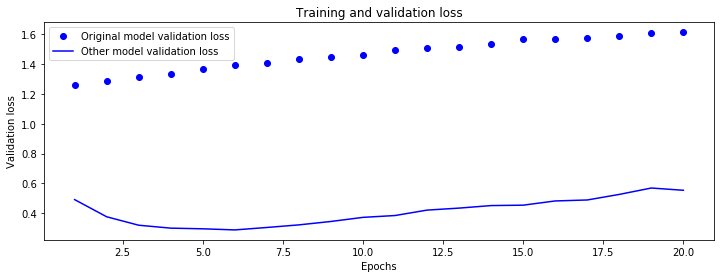

In [27]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dropout_model_history = dropout_model.fit(X_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(X_test, y_test))


plot_accuracy_history(original_history, dropout_model_history)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


  512/25000 [..............................] - ETA: 18s - loss: 0.6963 - acc: 0.5117

 1536/25000 [>.............................] - ETA: 7s - loss: 0.6904 - acc: 0.5371 

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.6896 - acc: 0.5398

 3584/25000 [===>..........................] - ETA: 3s - loss: 0.6872 - acc: 0.5402

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.6833 - acc: 0.5499

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6789 - acc: 0.5600

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.6759 - acc: 0.5646

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.6722 - acc: 0.5708

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.6677 - acc: 0.5798

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.6635 - acc: 0.5887

10752/25000 [===========>..................] - ETA: 1s - loss: 0.6590 - acc: 0.5943

11776/25000 [=============>................] - ETA: 1s - loss: 0.6547 - acc: 0.6019

12800/25000 [==============>...............] - ETA: 1s - loss: 0.6508 - acc: 0.6081

13824/25000 [===============>..............] - ETA: 1s - loss: 0.6453 - acc: 0.6143

14848/25000 [================>.............] - ETA: 0s - loss: 0.6415 - acc: 0.6187

15872/25000 [==================>...........] - ETA: 0s - loss: 0.6380 - acc: 0.6235

16896/25000 [===================>..........] - ETA: 0s - loss: 0.6345 - acc: 0.6284

17920/25000 [====================>.........] - ETA: 0s - loss: 0.6305 - acc: 0.6336

18944/25000 [=====================>........] - ETA: 0s - loss: 0.6278 - acc: 0.6379

19968/25000 [======================>.......] - ETA: 0s - loss: 0.6240 - acc: 0.6421

20992/25000 [========================>.....] - ETA: 0s - loss: 0.6203 - acc: 0.6459

22016/25000 [=========================>....] - ETA: 0s - loss: 0.6159 - acc: 0.6513

23040/25000 [==========================>...] - ETA: 0s - loss: 0.6124 - acc: 0.6546

24064/25000 [===========================>..] - ETA: 0s - loss: 0.6084 - acc: 0.6593

25000/25000 [==============================] - 4s 142us/step - loss: 0.6046 - acc: 0.6633 - val_loss: 0.4651 - val_acc: 0.8508


Epoch 2/20
  512/25000 [..............................] - ETA: 1s - loss: 0.4946 - acc: 0.7617

 1536/25000 [>.............................] - ETA: 1s - loss: 0.5090 - acc: 0.7539

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.5012 - acc: 0.7691

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.4983 - acc: 0.7704

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.4964 - acc: 0.7734

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.4939 - acc: 0.7752

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.4923 - acc: 0.7772

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.4875 - acc: 0.7799

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4850 - acc: 0.7815

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.4807 - acc: 0.7851

10752/25000 [===========>..................] - ETA: 1s - loss: 0.4772 - acc: 0.7877

11776/25000 [=============>................] - ETA: 0s - loss: 0.4753 - acc: 0.7895

12800/25000 [==============>...............] - ETA: 0s - loss: 0.4735 - acc: 0.7906

13824/25000 [===============>..............] - ETA: 0s - loss: 0.4716 - acc: 0.7917

14848/25000 [================>.............] - ETA: 0s - loss: 0.4685 - acc: 0.7939

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4652 - acc: 0.7971

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4642 - acc: 0.7976

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4621 - acc: 0.7998

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4601 - acc: 0.8009

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4585 - acc: 0.8027

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4566 - acc: 0.8042

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4542 - acc: 0.8051

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4523 - acc: 0.8066

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4505 - acc: 0.8069

25000/25000 [==============================] - 3s 128us/step - loss: 0.4493 - acc: 0.8075 - val_loss: 0.3430 - val_acc: 0.8834


Epoch 3/20
  512/25000 [..............................] - ETA: 1s - loss: 0.3723 - acc: 0.8594

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3663 - acc: 0.8665

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3711 - acc: 0.8617

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3693 - acc: 0.8571

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3711 - acc: 0.8535

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3704 - acc: 0.8537

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3707 - acc: 0.8559

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3708 - acc: 0.8566

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3695 - acc: 0.8579

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3687 - acc: 0.8578

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3658 - acc: 0.8581

11776/25000 [=============>................] - ETA: 0s - loss: 0.3676 - acc: 0.8563

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3648 - acc: 0.8580

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3649 - acc: 0.8591

14848/25000 [================>.............] - ETA: 0s - loss: 0.3643 - acc: 0.8590

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3634 - acc: 0.8591

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3617 - acc: 0.8601

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3611 - acc: 0.8604

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3603 - acc: 0.8605

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3583 - acc: 0.8611

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3579 - acc: 0.8614

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3577 - acc: 0.8616

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3566 - acc: 0.8618

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3557 - acc: 0.8622

25000/25000 [==============================] - 3s 127us/step - loss: 0.3545 - acc: 0.8628 - val_loss: 0.2970 - val_acc: 0.8859


Epoch 4/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2975 - acc: 0.8945

 1536/25000 [>.............................] - ETA: 1s - loss: 0.3030 - acc: 0.8900

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.3059 - acc: 0.8887

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.3067 - acc: 0.8884

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3030 - acc: 0.8891

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.3019 - acc: 0.8890

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.3031 - acc: 0.8887

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.3008 - acc: 0.8887

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3023 - acc: 0.8876

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3051 - acc: 0.8871

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3032 - acc: 0.8871

11776/25000 [=============>................] - ETA: 0s - loss: 0.3019 - acc: 0.8871

12800/25000 [==============>...............] - ETA: 0s - loss: 0.3034 - acc: 0.8854

13824/25000 [===============>..............] - ETA: 0s - loss: 0.3032 - acc: 0.8855

14848/25000 [================>.............] - ETA: 0s - loss: 0.3017 - acc: 0.8862

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3017 - acc: 0.8866

16896/25000 [===================>..........] - ETA: 0s - loss: 0.3017 - acc: 0.8868

17920/25000 [====================>.........] - ETA: 0s - loss: 0.3005 - acc: 0.8876

18944/25000 [=====================>........] - ETA: 0s - loss: 0.3009 - acc: 0.8874

19968/25000 [======================>.......] - ETA: 0s - loss: 0.3021 - acc: 0.8875

20992/25000 [========================>.....] - ETA: 0s - loss: 0.3007 - acc: 0.8882

22016/25000 [=========================>....] - ETA: 0s - loss: 0.3023 - acc: 0.8875

23040/25000 [==========================>...] - ETA: 0s - loss: 0.3017 - acc: 0.8882

24064/25000 [===========================>..] - ETA: 0s - loss: 0.3007 - acc: 0.8884

25000/25000 [==============================] - 3s 127us/step - loss: 0.3002 - acc: 0.8886 - val_loss: 0.2853 - val_acc: 0.8847


Epoch 5/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2657 - acc: 0.9121

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2748 - acc: 0.9036

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2797 - acc: 0.9008

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2723 - acc: 0.9049

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2709 - acc: 0.9032

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2711 - acc: 0.9048

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2665 - acc: 0.9055

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2654 - acc: 0.9069

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2680 - acc: 0.9051

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2694 - acc: 0.9037

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2699 - acc: 0.9036

11776/25000 [=============>................] - ETA: 0s - loss: 0.2709 - acc: 0.9039

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2726 - acc: 0.9023

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2704 - acc: 0.9036

14848/25000 [================>.............] - ETA: 0s - loss: 0.2712 - acc: 0.9036

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2725 - acc: 0.9034

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2724 - acc: 0.9035

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2718 - acc: 0.9041

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2717 - acc: 0.9042

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2708 - acc: 0.9046

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2701 - acc: 0.9048

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2693 - acc: 0.9048

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2703 - acc: 0.9045

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2691 - acc: 0.9047

25000/25000 [==============================] - 3s 127us/step - loss: 0.2677 - acc: 0.9052 - val_loss: 0.2835 - val_acc: 0.8860


Epoch 6/20
  512/25000 [..............................] - ETA: 1s - loss: 0.2420 - acc: 0.9062

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2294 - acc: 0.9206

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2430 - acc: 0.9176

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2349 - acc: 0.9210

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2352 - acc: 0.9219

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2347 - acc: 0.9199

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2330 - acc: 0.9201

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2325 - acc: 0.9211

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2324 - acc: 0.9207

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2319 - acc: 0.9204

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2339 - acc: 0.9186

11776/25000 [=============>................] - ETA: 0s - loss: 0.2324 - acc: 0.9192

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2328 - acc: 0.9192

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2324 - acc: 0.9190

14848/25000 [================>.............] - ETA: 0s - loss: 0.2331 - acc: 0.9183

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2346 - acc: 0.9183

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2337 - acc: 0.9184

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2332 - acc: 0.9185

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2324 - acc: 0.9184

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2304 - acc: 0.9187

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2315 - acc: 0.9179

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2315 - acc: 0.9185

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2328 - acc: 0.9176

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2320 - acc: 0.9177

25000/25000 [==============================] - 3s 126us/step - loss: 0.2316 - acc: 0.9177 - val_loss: 0.2914 - val_acc: 0.8863


Epoch 7/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1843 - acc: 0.9453

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1901 - acc: 0.9355

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1984 - acc: 0.9320

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2020 - acc: 0.9294

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2009 - acc: 0.9303

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1997 - acc: 0.9302

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2000 - acc: 0.9306

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2057 - acc: 0.9277

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2078 - acc: 0.9266

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2056 - acc: 0.9260

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2071 - acc: 0.9257

11776/25000 [=============>................] - ETA: 0s - loss: 0.2044 - acc: 0.9267

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2056 - acc: 0.9266

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2056 - acc: 0.9264

14848/25000 [================>.............] - ETA: 0s - loss: 0.2065 - acc: 0.9259

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2064 - acc: 0.9260

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2045 - acc: 0.9270

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2039 - acc: 0.9278

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2049 - acc: 0.9281

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2056 - acc: 0.9274

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2061 - acc: 0.9269

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2075 - acc: 0.9269

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2094 - acc: 0.9271

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2098 - acc: 0.9267

25000/25000 [==============================] - 3s 127us/step - loss: 0.2103 - acc: 0.9264 - val_loss: 0.3047 - val_acc: 0.8843


Epoch 8/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1694 - acc: 0.9434

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1833 - acc: 0.9408

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1855 - acc: 0.9379

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1877 - acc: 0.9355

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1814 - acc: 0.9373

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1822 - acc: 0.9363

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1808 - acc: 0.9364

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1820 - acc: 0.9368

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1838 - acc: 0.9354

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1850 - acc: 0.9354

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1862 - acc: 0.9350

11776/25000 [=============>................] - ETA: 0s - loss: 0.1886 - acc: 0.9342

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1881 - acc: 0.9343

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1880 - acc: 0.9340

14848/25000 [================>.............] - ETA: 0s - loss: 0.1883 - acc: 0.9341

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1886 - acc: 0.9342

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1893 - acc: 0.9337

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1910 - acc: 0.9326

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1912 - acc: 0.9325

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1912 - acc: 0.9327

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1900 - acc: 0.9332

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1909 - acc: 0.9330

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1901 - acc: 0.9329

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1904 - acc: 0.9324

25000/25000 [==============================] - 3s 126us/step - loss: 0.1899 - acc: 0.9328 - val_loss: 0.3221 - val_acc: 0.8832


Epoch 9/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1797 - acc: 0.9492

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1564 - acc: 0.9557

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1564 - acc: 0.9484

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1676 - acc: 0.9467

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1710 - acc: 0.9436

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1669 - acc: 0.9450

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1697 - acc: 0.9426

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1687 - acc: 0.9423

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1686 - acc: 0.9420

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1675 - acc: 0.9422

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1659 - acc: 0.9424

11776/25000 [=============>................] - ETA: 0s - loss: 0.1678 - acc: 0.9415

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1701 - acc: 0.9413

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1706 - acc: 0.9404

14848/25000 [================>.............] - ETA: 0s - loss: 0.1713 - acc: 0.9400

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1731 - acc: 0.9393

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1738 - acc: 0.9390

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1721 - acc: 0.9397

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1732 - acc: 0.9396

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1740 - acc: 0.9393

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1735 - acc: 0.9394

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1738 - acc: 0.9394

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1737 - acc: 0.9396

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1758 - acc: 0.9391

25000/25000 [==============================] - 3s 127us/step - loss: 0.1765 - acc: 0.9390 - val_loss: 0.3419 - val_acc: 0.8788


Epoch 10/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1473 - acc: 0.9531

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1459 - acc: 0.9531

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1391 - acc: 0.9559

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1475 - acc: 0.9517

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1450 - acc: 0.9529

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1436 - acc: 0.9522

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1490 - acc: 0.9507

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1526 - acc: 0.9487

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1531 - acc: 0.9493

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1535 - acc: 0.9480

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1545 - acc: 0.9469

11776/25000 [=============>................] - ETA: 0s - loss: 0.1542 - acc: 0.9474

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1545 - acc: 0.9473

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1554 - acc: 0.9463

14848/25000 [================>.............] - ETA: 0s - loss: 0.1544 - acc: 0.9463

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1558 - acc: 0.9459

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1561 - acc: 0.9451

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1566 - acc: 0.9450

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1590 - acc: 0.9439

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1592 - acc: 0.9438

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1594 - acc: 0.9433

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1586 - acc: 0.9439

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1585 - acc: 0.9439

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1587 - acc: 0.9441

25000/25000 [==============================] - 3s 126us/step - loss: 0.1592 - acc: 0.9440 - val_loss: 0.3575 - val_acc: 0.8810


Epoch 11/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1194 - acc: 0.9668

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1471 - acc: 0.9538

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1410 - acc: 0.9504

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1466 - acc: 0.9464

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1425 - acc: 0.9492

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1424 - acc: 0.9498

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1427 - acc: 0.9492

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1436 - acc: 0.9482

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1425 - acc: 0.9489

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1416 - acc: 0.9495

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1442 - acc: 0.9479

11776/25000 [=============>................] - ETA: 0s - loss: 0.1436 - acc: 0.9485

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1441 - acc: 0.9480

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1436 - acc: 0.9486

14848/25000 [================>.............] - ETA: 0s - loss: 0.1452 - acc: 0.9481

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1458 - acc: 0.9483

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1459 - acc: 0.9485

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1452 - acc: 0.9490

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1454 - acc: 0.9493

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1464 - acc: 0.9492

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1483 - acc: 0.9480

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1487 - acc: 0.9480

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1498 - acc: 0.9475

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1504 - acc: 0.9470

25000/25000 [==============================] - 3s 127us/step - loss: 0.1497 - acc: 0.9472 - val_loss: 0.3884 - val_acc: 0.8791


Epoch 12/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1600 - acc: 0.9473

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1334 - acc: 0.9551

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1296 - acc: 0.9574

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1299 - acc: 0.9590

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1291 - acc: 0.9579

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1378 - acc: 0.9538

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1364 - acc: 0.9545

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1356 - acc: 0.9551

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1367 - acc: 0.9551

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1346 - acc: 0.9556

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1364 - acc: 0.9554

11776/25000 [=============>................] - ETA: 0s - loss: 0.1375 - acc: 0.9547

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1378 - acc: 0.9542

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1384 - acc: 0.9544

14848/25000 [================>.............] - ETA: 0s - loss: 0.1381 - acc: 0.9546

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1370 - acc: 0.9550

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1378 - acc: 0.9553

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1382 - acc: 0.9552

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1392 - acc: 0.9551

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1381 - acc: 0.9554

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1385 - acc: 0.9554

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1396 - acc: 0.9550

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1406 - acc: 0.9546

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1405 - acc: 0.9546

25000/25000 [==============================] - 3s 126us/step - loss: 0.1396 - acc: 0.9551 - val_loss: 0.4120 - val_acc: 0.8782


Epoch 13/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0855 - acc: 0.9746

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1347 - acc: 0.9603

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1357 - acc: 0.9602

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1285 - acc: 0.9604

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1262 - acc: 0.9612

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1230 - acc: 0.9616

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1202 - acc: 0.9621

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1227 - acc: 0.9618

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1217 - acc: 0.9621

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1238 - acc: 0.9611

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1261 - acc: 0.9609

11776/25000 [=============>................] - ETA: 0s - loss: 0.1237 - acc: 0.9619

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1256 - acc: 0.9620

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1291 - acc: 0.9608

14848/25000 [================>.............] - ETA: 0s - loss: 0.1280 - acc: 0.9613

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1280 - acc: 0.9616

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1289 - acc: 0.9609

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1298 - acc: 0.9603

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1293 - acc: 0.9605

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1307 - acc: 0.9599

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1302 - acc: 0.9601

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1312 - acc: 0.9600

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1316 - acc: 0.9600

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1323 - acc: 0.9596

25000/25000 [==============================] - 3s 127us/step - loss: 0.1323 - acc: 0.9595 - val_loss: 0.4344 - val_acc: 0.8784


Epoch 14/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1280 - acc: 0.9648

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1290 - acc: 0.9596

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1238 - acc: 0.9605

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1240 - acc: 0.9607

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1263 - acc: 0.9609

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1268 - acc: 0.9613

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1288 - acc: 0.9609

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1266 - acc: 0.9617

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1254 - acc: 0.9619

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1262 - acc: 0.9624

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1247 - acc: 0.9627

11776/25000 [=============>................] - ETA: 0s - loss: 0.1253 - acc: 0.9626

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1262 - acc: 0.9617

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1249 - acc: 0.9622

14848/25000 [================>.............] - ETA: 0s - loss: 0.1248 - acc: 0.9619

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1256 - acc: 0.9613

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1253 - acc: 0.9617

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1256 - acc: 0.9613

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1255 - acc: 0.9617

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1249 - acc: 0.9618

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1254 - acc: 0.9616

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1254 - acc: 0.9615

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1261 - acc: 0.9613

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1271 - acc: 0.9611

25000/25000 [==============================] - 3s 126us/step - loss: 0.1279 - acc: 0.9608 - val_loss: 0.4554 - val_acc: 0.8754


Epoch 15/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0987 - acc: 0.9688

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1156 - acc: 0.9694

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1192 - acc: 0.9648

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1142 - acc: 0.9674

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1178 - acc: 0.9666

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1170 - acc: 0.9666

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1194 - acc: 0.9659

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1205 - acc: 0.9655

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1186 - acc: 0.9652

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1165 - acc: 0.9655

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1193 - acc: 0.9641

11776/25000 [=============>................] - ETA: 0s - loss: 0.1212 - acc: 0.9633

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1200 - acc: 0.9635

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1191 - acc: 0.9646

14848/25000 [================>.............] - ETA: 0s - loss: 0.1207 - acc: 0.9639

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1197 - acc: 0.9643

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1200 - acc: 0.9642

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1190 - acc: 0.9642

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1198 - acc: 0.9638

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1185 - acc: 0.9643

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1182 - acc: 0.9645

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1174 - acc: 0.9648

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1172 - acc: 0.9651

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1183 - acc: 0.9643

25000/25000 [==============================] - 3s 126us/step - loss: 0.1195 - acc: 0.9640 - val_loss: 0.4525 - val_acc: 0.8743


Epoch 16/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1110 - acc: 0.9629

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1137 - acc: 0.9622

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1227 - acc: 0.9633

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1145 - acc: 0.9654

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1119 - acc: 0.9653

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1160 - acc: 0.9641

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1167 - acc: 0.9641

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1166 - acc: 0.9639

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1210 - acc: 0.9625

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1215 - acc: 0.9626

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1210 - acc: 0.9632

11776/25000 [=============>................] - ETA: 0s - loss: 0.1207 - acc: 0.9634

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1217 - acc: 0.9635

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1209 - acc: 0.9638

14848/25000 [================>.............] - ETA: 0s - loss: 0.1199 - acc: 0.9637

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1203 - acc: 0.9638

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1194 - acc: 0.9638

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1192 - acc: 0.9641

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1185 - acc: 0.9642

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1172 - acc: 0.9644

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1189 - acc: 0.9638

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1196 - acc: 0.9635

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1191 - acc: 0.9637

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1187 - acc: 0.9639

25000/25000 [==============================] - 3s 126us/step - loss: 0.1182 - acc: 0.9640 - val_loss: 0.5012 - val_acc: 0.8755


Epoch 17/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1165 - acc: 0.9629

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0907 - acc: 0.9720

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1071 - acc: 0.9676

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1085 - acc: 0.9674

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1122 - acc: 0.9661

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1081 - acc: 0.9666

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1084 - acc: 0.9665

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1107 - acc: 0.9672

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1108 - acc: 0.9665

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1101 - acc: 0.9669

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1112 - acc: 0.9664

11776/25000 [=============>................] - ETA: 0s - loss: 0.1123 - acc: 0.9661

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1114 - acc: 0.9663

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1087 - acc: 0.9672

14848/25000 [================>.............] - ETA: 0s - loss: 0.1095 - acc: 0.9668

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1103 - acc: 0.9665

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1100 - acc: 0.9667

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1102 - acc: 0.9664

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1098 - acc: 0.9666

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1109 - acc: 0.9662

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1102 - acc: 0.9660

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1101 - acc: 0.9660

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1102 - acc: 0.9664

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1093 - acc: 0.9668

25000/25000 [==============================] - 3s 126us/step - loss: 0.1091 - acc: 0.9669 - val_loss: 0.5163 - val_acc: 0.8697


Epoch 18/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1356 - acc: 0.9629

 1536/25000 [>.............................] - ETA: 1s - loss: 0.1072 - acc: 0.9674

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1013 - acc: 0.9680

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1050 - acc: 0.9668

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1015 - acc: 0.9677

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1038 - acc: 0.9668

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1027 - acc: 0.9663

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1030 - acc: 0.9664

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1047 - acc: 0.9667

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1049 - acc: 0.9668

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1030 - acc: 0.9674

11776/25000 [=============>................] - ETA: 0s - loss: 0.1041 - acc: 0.9671

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1053 - acc: 0.9672

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1048 - acc: 0.9671

14848/25000 [================>.............] - ETA: 0s - loss: 0.1035 - acc: 0.9677

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1031 - acc: 0.9679

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1036 - acc: 0.9677

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1036 - acc: 0.9678

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1039 - acc: 0.9675

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1061 - acc: 0.9668

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1066 - acc: 0.9667

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1070 - acc: 0.9664

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1073 - acc: 0.9664

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1075 - acc: 0.9663

25000/25000 [==============================] - 3s 125us/step - loss: 0.1079 - acc: 0.9662 - val_loss: 0.5169 - val_acc: 0.8728


Epoch 19/20
  512/25000 [..............................] - ETA: 1s - loss: 0.0747 - acc: 0.9824

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0837 - acc: 0.9772

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0797 - acc: 0.9777

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0891 - acc: 0.9760

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0923 - acc: 0.9761

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0914 - acc: 0.9751

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0914 - acc: 0.9751

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0956 - acc: 0.9734

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0972 - acc: 0.9728

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0983 - acc: 0.9719

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0969 - acc: 0.9723

11776/25000 [=============>................] - ETA: 0s - loss: 0.0974 - acc: 0.9719

12800/25000 [==============>...............] - ETA: 0s - loss: 0.0983 - acc: 0.9716

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1004 - acc: 0.9707

14848/25000 [================>.............] - ETA: 0s - loss: 0.1023 - acc: 0.9704

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1018 - acc: 0.9706

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1028 - acc: 0.9702

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1026 - acc: 0.9701

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1020 - acc: 0.9705

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1013 - acc: 0.9706

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1036 - acc: 0.9703

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1029 - acc: 0.9702

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1043 - acc: 0.9700

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1048 - acc: 0.9698

25000/25000 [==============================] - 3s 126us/step - loss: 0.1058 - acc: 0.9700 - val_loss: 0.5574 - val_acc: 0.8717


Epoch 20/20
  512/25000 [..............................] - ETA: 1s - loss: 0.1120 - acc: 0.9629

 1536/25000 [>.............................] - ETA: 1s - loss: 0.0880 - acc: 0.9701

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.0976 - acc: 0.9664

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.0977 - acc: 0.9671

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.0954 - acc: 0.9688

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.0961 - acc: 0.9693

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.0927 - acc: 0.9709

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.0952 - acc: 0.9710

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.0957 - acc: 0.9709

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0955 - acc: 0.9712

10752/25000 [===========>..................] - ETA: 1s - loss: 0.0971 - acc: 0.9708

11776/25000 [=============>................] - ETA: 0s - loss: 0.0990 - acc: 0.9700

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1004 - acc: 0.9693

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1007 - acc: 0.9695

14848/25000 [================>.............] - ETA: 0s - loss: 0.1009 - acc: 0.9693

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1024 - acc: 0.9688

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1014 - acc: 0.9690

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1015 - acc: 0.9691

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1012 - acc: 0.9691

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1009 - acc: 0.9691

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1007 - acc: 0.9692

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1009 - acc: 0.9690

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1014 - acc: 0.9688

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1025 - acc: 0.9687

25000/25000 [==============================] - 3s 126us/step - loss: 0.1018 - acc: 0.9688 - val_loss: 0.5777 - val_acc: 0.8688


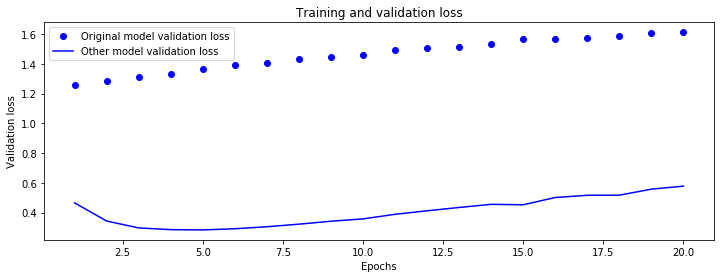

In [25]:
dropout_model_with_l2 = models.Sequential()
dropout_model_with_l2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model_with_l2.add(layers.Dropout(0.5))
dropout_model_with_l2.add(layers.Dense(16, activation='relu'))
dropout_model_with_l2.add(layers.Dropout(0.5))
dropout_model_with_l2.add(layers.Dense(1, activation='sigmoid'))

dropout_model_with_l2.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dropout_model_with_l2_history = dropout_model_with_l2.fit(X_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(X_test, y_test))


plot_accuracy_history(original_history, dropout_model_with_l2_history)

In [28]:
print(original_model.evaluate(X_test, y_test))
print(l2_model.evaluate(X_test, y_test))
print(dropout_model.evaluate(X_test, y_test))
print(dropout_model_with_l2.evaluate(X_test, y_test))

   32/25000 [..............................] - ETA: 3s

  704/25000 [..............................] - ETA: 1s

 1440/25000 [>.............................] - ETA: 1s

 2176/25000 [=>............................] - ETA: 1s

 2912/25000 [==>...........................] - ETA: 1s

 3616/25000 [===>..........................] - ETA: 1s



 4320/25000 [====>.........................] - ETA: 1s

 4992/25000 [====>.........................] - ETA: 1s

 5632/25000 [=====>........................] - ETA: 1s

 6336/25000 [======>.......................] - ETA: 1s

 7040/25000 [=======>......................] - ETA: 1s



 7712/25000 [========>.....................] - ETA: 1s

 8384/25000 [=========>....................] - ETA: 1s

 9056/25000 [=========>....................] - ETA: 1s

 9696/25000 [==========>...................] - ETA: 1s



10400/25000 [===========>..................] - ETA: 1s

11136/25000 [============>.................] - ETA: 1s

11872/25000 [=============>................] - ETA: 0s



12640/25000 [==============>...............] - ETA: 0s

13376/25000 [===============>..............] - ETA: 0s

14144/25000 [===============>..............] - ETA: 0s

14912/25000 [================>.............] - ETA: 0s

15680/25000 [=================>............] - ETA: 0s

16416/25000 [==================>...........] - ETA: 0s

17152/25000 [===================>..........] - ETA: 0s

17920/25000 [====================>.........] - ETA: 0s

18688/25000 [=====================>........] - ETA: 0s

19456/25000 [======================>.......] - ETA: 0s

20192/25000 [=======================>......] - ETA: 0s

20896/25000 [========================>.....] - ETA: 0s

21600/25000 [========================>.....] - ETA: 0s

22336/25000 [=========================>....] - ETA: 0s



23072/25000 [==========================>...] - ETA: 0s

23808/25000 [===========================>..] - ETA: 0s

24544/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 71us/step


[1.6122732130509614, 0.84604000000000001]
   32/25000 [..............................] - ETA: 2s

  672/25000 [..............................] - ETA: 1s

 1408/25000 [>.............................] - ETA: 1s

 2112/25000 [=>............................] - ETA: 1s

 2848/25000 [==>...........................] - ETA: 1s

 3584/25000 [===>..........................] - ETA: 1s

 4288/25000 [====>.........................] - ETA: 1s

 4992/25000 [====>.........................] - ETA: 1s

 5664/25000 [=====>........................] - ETA: 1s

 6368/25000 [======>.......................] - ETA: 1s

 7040/25000 [=======>......................] - ETA: 1s

 7744/25000 [========>.....................] - ETA: 1s

 8448/25000 [=========>....................] - ETA: 1s

 9184/25000 [==========>...................] - ETA: 1s

 9920/25000 [==========>...................] - ETA: 1s

10656/25000 [===========>..................] - ETA: 1s

11392/25000 [============>.................] - ETA: 0s

12160/25000 [=============>................] - ETA: 0s

12896/25000 [==============>...............] - ETA: 0s



13632/25000 [===============>..............] - ETA: 0s

14368/25000 [================>.............] - ETA: 0s

15136/25000 [=================>............] - ETA: 0s

15872/25000 [==================>...........] - ETA: 0s

16640/25000 [==================>...........] - ETA: 0s

17376/25000 [===================>..........] - ETA: 0s

18112/25000 [====================>.........] - ETA: 0s

18848/25000 [=====================>........] - ETA: 0s

19584/25000 [======================>.......] - ETA: 0s

20288/25000 [=======================>......] - ETA: 0s

21024/25000 [========================>.....] - ETA: 0s

21760/25000 [=========================>....] - ETA: 0s



22528/25000 [==========================>...] - ETA: 0s



23232/25000 [==========================>...] - ETA: 0s

23968/25000 [===========================>..] - ETA: 0s

24704/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 71us/step


[0.41626331481933593, 0.86963999999999997]
   32/25000 [..............................] - ETA: 2s

  768/25000 [..............................] - ETA: 1s

 1536/25000 [>.............................] - ETA: 1s

 2272/25000 [=>............................] - ETA: 1s

 3040/25000 [==>...........................] - ETA: 1s

 3808/25000 [===>..........................] - ETA: 1s

 4576/25000 [====>.........................] - ETA: 1s

 5344/25000 [=====>........................] - ETA: 1s

 6112/25000 [======>.......................] - ETA: 1s

 6880/25000 [=======>......................] - ETA: 1s

 7648/25000 [========>.....................] - ETA: 1s

 8416/25000 [=========>....................] - ETA: 1s

 9184/25000 [==========>...................] - ETA: 1s

 9952/25000 [==========>...................] - ETA: 1s

10752/25000 [===========>..................] - ETA: 0s

11520/25000 [============>.................] - ETA: 0s

12320/25000 [=============>................] - ETA: 0s

13088/25000 [==============>...............] - ETA: 0s

13856/25000 [===============>..............] - ETA: 0s

14624/25000 [================>.............] - ETA: 0s

15392/25000 [=================>............] - ETA: 0s

16160/25000 [==================>...........] - ETA: 0s

16928/25000 [===================>..........] - ETA: 0s

17696/25000 [====================>.........] - ETA: 0s

18464/25000 [=====================>........] - ETA: 0s



19232/25000 [======================>.......] - ETA: 0s

20000/25000 [=======================>......] - ETA: 0s

20800/25000 [=======================>......] - ETA: 0s

21600/25000 [========================>.....] - ETA: 0s

22368/25000 [=========================>....] - ETA: 0s

23168/25000 [==========================>...] - ETA: 0s



23936/25000 [===========================>..] - ETA: 0s

24672/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 66us/step


[0.55387877653837203, 0.86960000000000004]
   32/25000 [..............................] - ETA: 2s

  768/25000 [..............................] - ETA: 1s

 1536/25000 [>.............................] - ETA: 1s

 2336/25000 [=>............................] - ETA: 1s

 3104/25000 [==>...........................] - ETA: 1s



 3872/25000 [===>..........................] - ETA: 1s

 4640/25000 [====>.........................] - ETA: 1s

 5408/25000 [=====>........................] - ETA: 1s



 6176/25000 [======>.......................] - ETA: 1s

 6944/25000 [=======>......................] - ETA: 1s

 7712/25000 [========>.....................] - ETA: 1s

 8480/25000 [=========>....................] - ETA: 1s



 9248/25000 [==========>...................] - ETA: 1s

10016/25000 [===========>..................] - ETA: 0s



10784/25000 [===========>..................] - ETA: 0s

11488/25000 [============>.................] - ETA: 0s



12256/25000 [=============>................] - ETA: 0s



13024/25000 [==============>...............] - ETA: 0s

13760/25000 [===============>..............] - ETA: 0s



14528/25000 [================>.............] - ETA: 0s

15232/25000 [=================>............] - ETA: 0s



16000/25000 [==================>...........] - ETA: 0s

16768/25000 [===================>..........] - ETA: 0s

17568/25000 [====================>.........] - ETA: 0s

18368/25000 [=====================>........] - ETA: 0s

19168/25000 [======================>.......] - ETA: 0s

19936/25000 [======================>.......] - ETA: 0s

20704/25000 [=======================>......] - ETA: 0s

21472/25000 [========================>.....] - ETA: 0s

22240/25000 [=========================>....] - ETA: 0s



23008/25000 [==========================>...] - ETA: 0s

23776/25000 [===========================>..] - ETA: 0s

24544/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 67us/step


[0.57770245896458627, 0.86875999999999998]
